# HOUSING: PRICE PREDICTION

# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

# Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper
Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on
test.csv file.

In [1]:
# import numerical laibary
import numpy as np

# import pandas laibary
import pandas as pd

# import visulaization laibary
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# regression model
from sklearn.linear_model import LinearRegression

# regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# ensemble model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# model selction method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
# error
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [6]:
ds=pd.read_csv('train.csv')
ds

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df=pd.DataFrame(ds)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [9]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

1. In our datset contains 1168 rows and 81 columns.
2. In dataset float type dataset are 3 out of 81 columns.
3. In dataset int type dataset are 35 out of 81 columns.
4. In dataset object type dataset are 43 out of 81 columns.
5. There are null values are present in dataset.

In [10]:
# check null values in dataset
df.isnull().sum().sum()

5558

There are in dataset total number of null values are present in dataset are 5558.

In [11]:
# null values in each columns
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

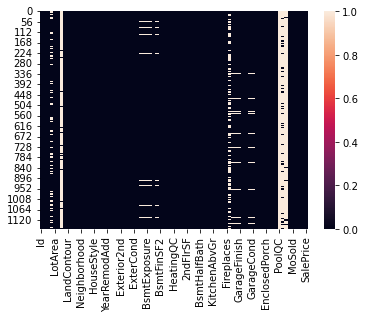

In [12]:
# null values in visulaization
sns.heatmap(df.isnull())

# Separate dataset according to type for better understand

# 1.Numerical type dataset

In [13]:
df1=df.select_dtypes(['int','float'])
df1

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1976          1976         0.0         120           0        958   
1          1970          1970         0.0         351         823       1043   
2          1996          1997         0.0         862           0        255   
3          1977          1977       480.0         705           0       1139   
4          1977          2000       126.0        1246           0        356   
...         ...           ...         ...         ...         ...        ...   
1163       1967          1967        31.0         450           0        432   
1164       1949          2003         0.0           0           0          0   
1165       1976          1976         0.0         566           0        289   
1166       1920          1950         0.0           0           0        649   
1167       2002          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4           

In [14]:
dt1=df.select_dtypes(['float','int'])
df1

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1976          1976         0.0         120           0        958   
1          1970          1970         0.0         351         823       1043   
2          1996          1997         0.0         862           0        255   
3          1977          1977       480.0         705           0       1139   
4          1977          2000       126.0        1246           0        356   
...         ...           ...         ...         ...         ...        ...   
1163       1967          1967        31.0         450           0        432   
1164       1949          2003         0.0           0           0          0   
1165       1976          1976         0.0         566           0        289   
1166       1920          1950         0.0           0           0        649   
1167       2002          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4           

# Check null in nu numerical type dataset

In [15]:
df1.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In numerical type dataset null values are present in 2 columns out of 38. lot of null values are presnt in LotFrontage,MasVnrArea,GarageYrBlt

lot of Null values are present in test type dataset is GarageYrBlt, MasVnrArea, LotFrontage so we drop it directly.

# Remove null values in dataset Method-->Impute method

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imp=SimpleImputer(strategy='median')

In [18]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [19]:
df1

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127.0       120.0         70.0   4928.0          6.0          5.0   
1     889.0        20.0         95.0  15865.0          8.0          6.0   
2     793.0        60.0         92.0   9920.0          7.0          5.0   
3     110.0        20.0        105.0  11751.0          6.0          6.0   
4     422.0        20.0         70.0  16635.0          6.0          7.0   
...     ...         ...          ...      ...          ...          ...   
1163  289.0        20.0         70.0   9819.0          5.0          5.0   
1164  554.0        20.0         67.0   8777.0          4.0          5.0   
1165  196.0       160.0         24.0   2280.0          6.0          6.0   
1166   31.0        70.0         50.0   8500.0          4.0          4.0   
1167  617.0        60.0         70.0   7861.0          6.0          5.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        1976.0        1976.0         0.0       120.0         0.0      958.0   
1        1970.0        1970.0         0.0       351.0       823.0     1043.0   
2        1996.0        1997.0         0.0       862.0         0.0      255.0   
3        1977.0        1977.0       480.0       705.0         0.0     1139.0   
4        1977.0        2000.0       126.0      1246.0         0.0      356.0   
...         ...           ...         ...         ...         ...        ...   
1163     1967.0        1967.0        31.0       450.0         0.0      432.0   
1164     1949.0        2003.0         0.0         0.0         0.0        0.0   
1165     1976.0        1976.0         0.0       566.0         0.0      289.0   
1166     1920.0        1950.0         0.0         0.0         0.0      649.0   
1167     2002.0        2003.0         0.0       457.0         0.0      326.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          1078.0     958.0       0.0           0.0      958.0           0.0   
1          2217.0    2217.0       0.0           0.0     2217.0           1.0   
2          1117.0    1127.0     886.0           0.0     2013.0           1.0   
3          1844.0    1844.0       0.0           0.0     1844.0           0.0   
4          1602.0    1602.0       0.0           0.0     1602.0           0.0   
...           ...       ...       ...           ...        ...           ...   
1163        882.0     900.0       0.0           0.0      900.0           0.0   
1164          0.0    1126.0       0.0           0.0     1126.0           0.0   
1165        855.0     855.0     601.0           0.0     1456.0           0.0   
1166        649.0     649.0     668.0           0.0     1317.0           0.0   
1167        783.0     807.0     702.0           0.0     1509.0           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       0.0           2.0           1.0   
1              0.0       2.0       0.0           4.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       2.0       0.0           3.0           1.0   
4              1.0       2.0       0.0           3.0           1.0   
...            ...       ...       ...           ...           ...   
1163           0.0       1.0       0.0           3.0           1.0   
1164           0.0       2.0       0.0           2.0           1.0   
1165           0.0       2.0       1.0           3.0           1.0   
1166           0.0       1.0       0.0           3.0           1.0   
1167           0.0       2.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         1.0       1977.0         2.0       440.0   
1              8.0         1.0       1970.0         2.0       621.0   
2              8.0         1.0       1997.0         2.0       455.0   
3              7.0         1.0       1977.0         2.0      

# Check null values after apply Impute method

In [20]:
df1.isnull().sum().sum()

0

No null values present in numerical type dataset

# Find relation between variables and Target values

In [21]:
def numerical_plot(df1,variable,target=df1.SalePrice):
    fig,ax=plt.subplots(ncols=2, figsize=(15,5))
    
    #boxplot for comparison
    sns.scatterplot(data=df1,y=variable,x=target,ax=ax[0])
    ax[0].set_title(f"Comaparision between {variable} and Sale_Price")
    
     #distribution plot
    ax[1].set_title(f"Behaviour of {variable}")
    ax[1].set_ylabel(f"frequency of Sale_price")
    sns.distplot(x=df1[variable],ax=ax[1])
    plt.show()

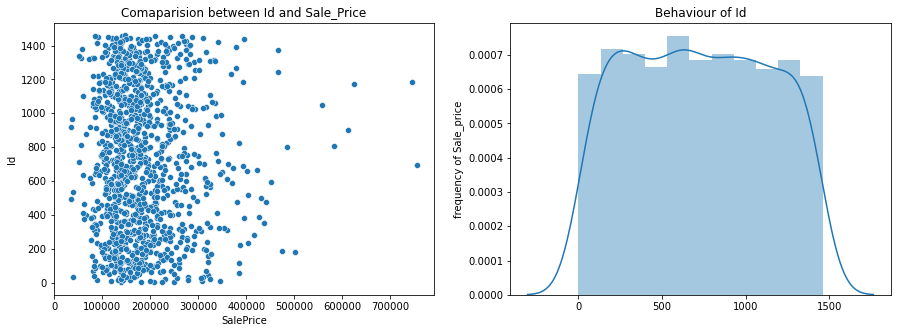

In [22]:
numerical_plot(df1,variable='Id')

It very much fluctuates much, and we can't find the relation between them, It looks like an insufficient data variable, so we drop it later. 

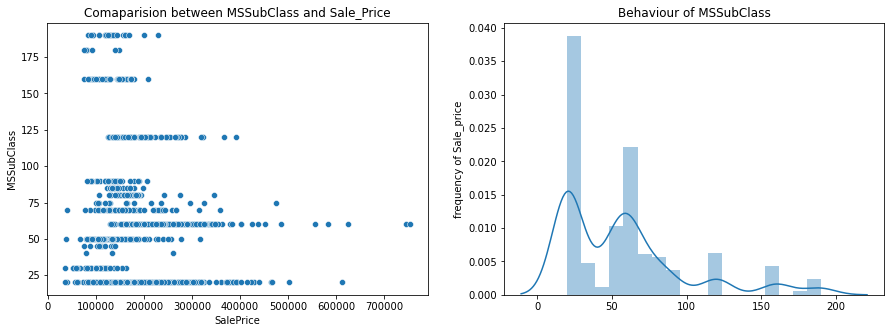

In [23]:
numerical_plot(df1,variable='MSSubClass')

# MSSubClass: Identifies the type of dwelling involved in the sale.
1. 2-1/2 STORY ALL AGES CLASS house are availabel then price are increase.
2. Most of house class are lie near 25.

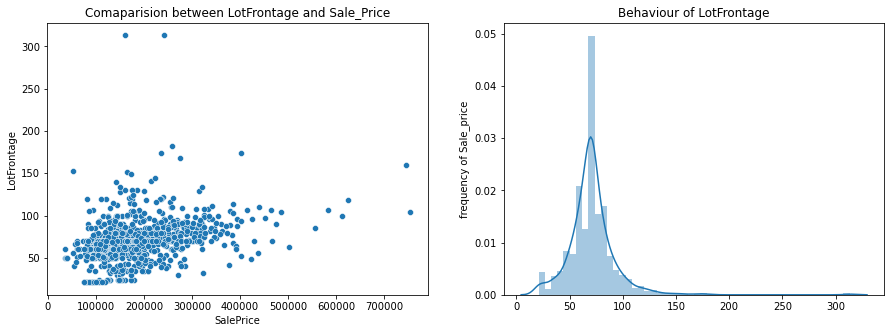

In [24]:
numerical_plot(df1,variable='LotFrontage')

# LotFrontage: Linear feet of street connected to property
1. If LotFrontage increase then price are increase.
2. Maximum LotFrontage lie between 50 to 100.

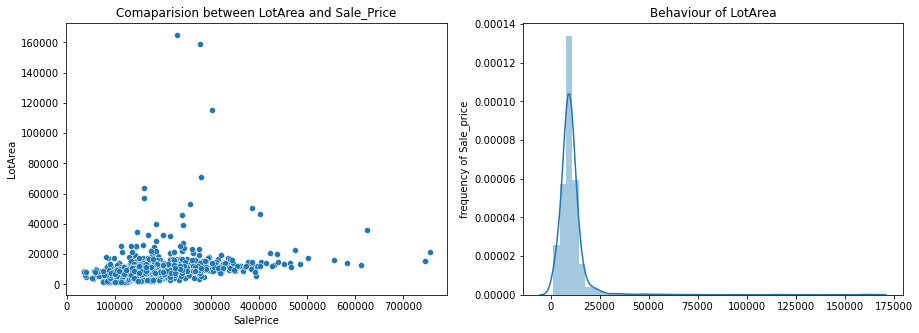

In [25]:
numerical_plot(df1,variable='LotArea')

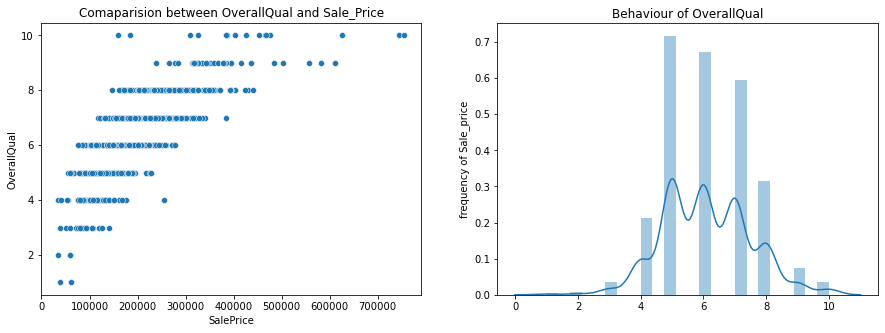

In [26]:
numerical_plot(df1,variable='OverallQual')

# OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
    
1. If OverallQual is increased then prices are also increased.
2. Maximum OverAllQual is lie between near 5 to 7.

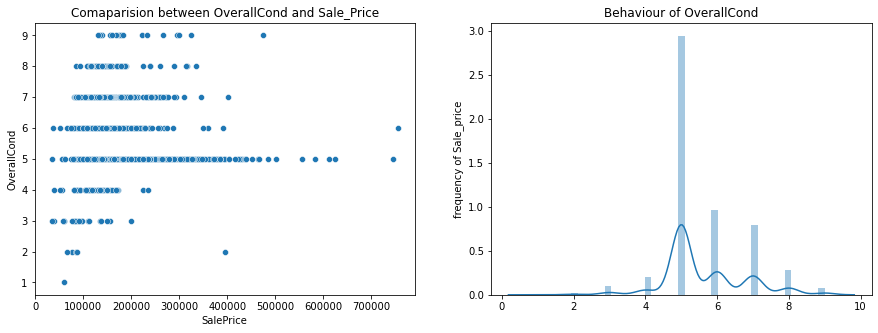

In [27]:
numerical_plot(df1,variable='OverallCond')

# OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
1. If OverallCond is increased then prices of houses also increased.
2. Here at 5 average condition prices more increased.

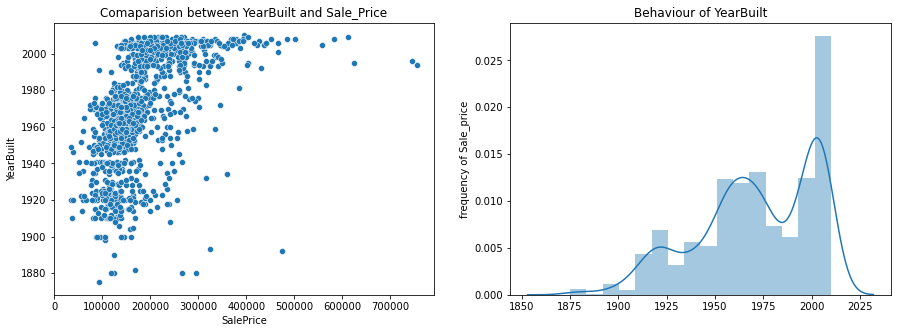

In [28]:
numerical_plot(df1,variable='YearBuilt')

# YearBuilt: Original construction date

1. if Houses are Built latest then High prices chances.
2. Most Houses are built near 2000.

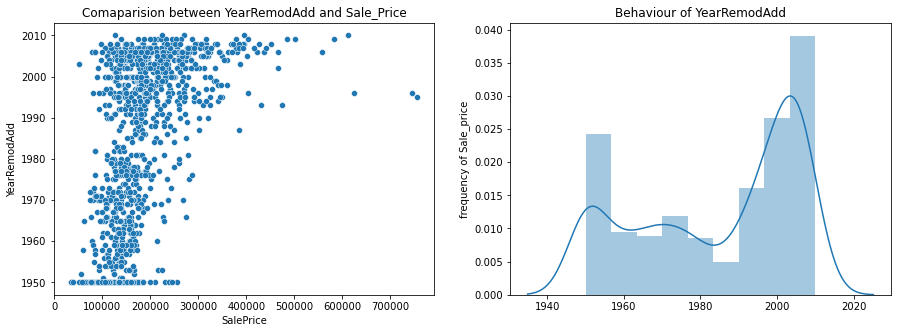

In [29]:
numerical_plot(df1,variable='YearRemodAdd')

# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    
1. If Houses are remodeling then chances of a price increase are high.
2. Most houses are remodeled in 2010.

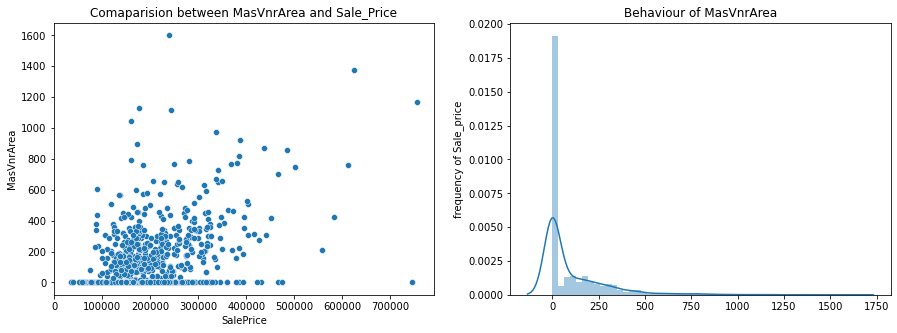

In [30]:
numerical_plot(df1,variable='MasVnrArea')

# MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
        
1. If the wall is made with bricks of stone and many others type then chances of increase in prices are high

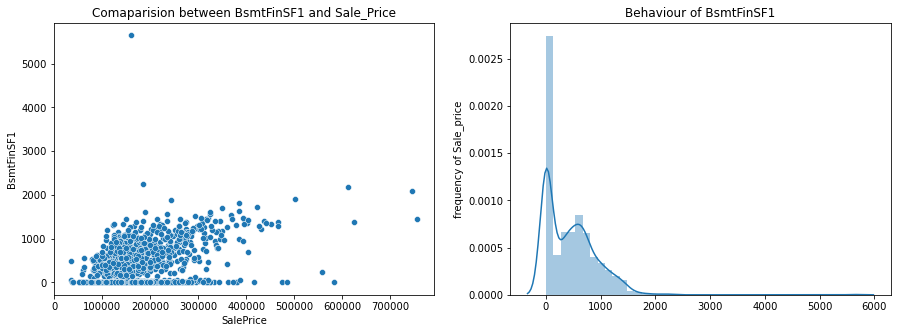

In [31]:
numerical_plot(df1,variable='BsmtFinSF1')

# BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet
    
1. If Houses are follow this condition Then prices are fluctuation according to this types.

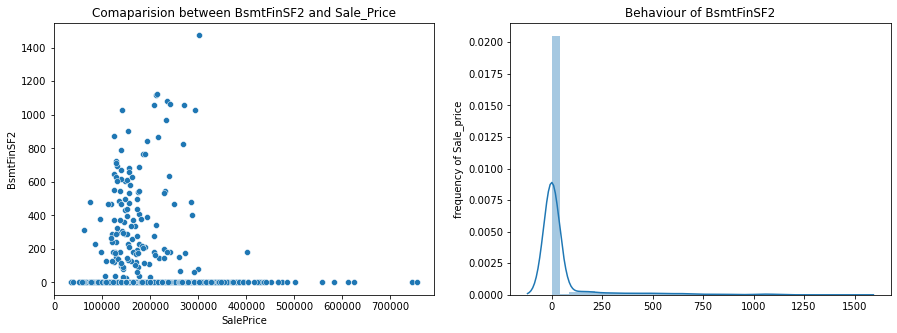

In [32]:
numerical_plot(df1,variable='BsmtFinSF2')

# BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet
    
1. If Finished square feet then prices are increased

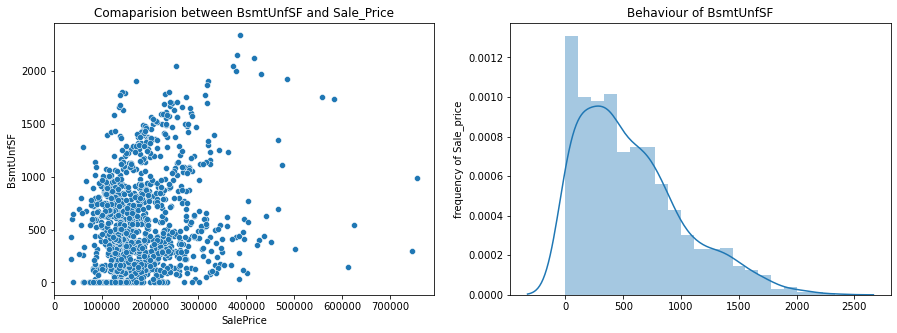

In [33]:
numerical_plot(df1,variable='BsmtUnfSF')

# BsmtUnfSF: Unfinished square feet of basement area

1. If surfaces are not finished then prices are drops

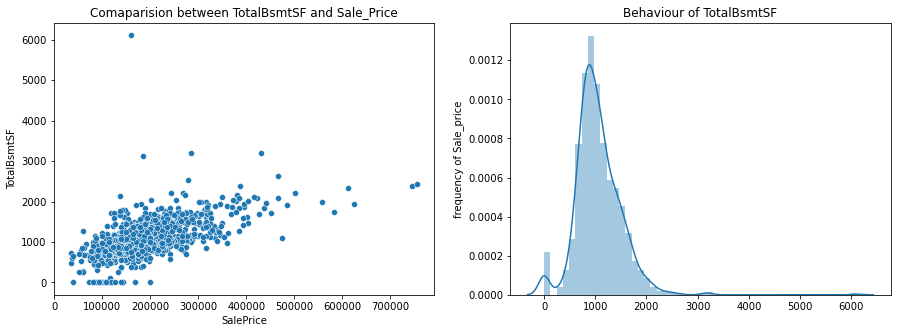

In [34]:
numerical_plot(df1,variable='TotalBsmtSF')

# TotalBsmtSF: Total square feet of the basement area
    
1. If the total square feet of the basement area is more then the price also increased.
2. Basically basement area is lie between 1000 to 2000.

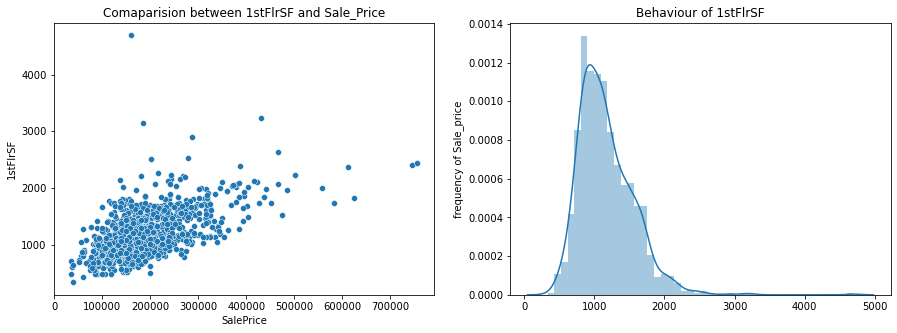

In [35]:
numerical_plot(df1,variable='1stFlrSF')

# 1stFlrSF: First Floor square feet
    
1. If the 1st-floor area is more then prices of the house increase.
2. Area lies between 1000 to 2000.

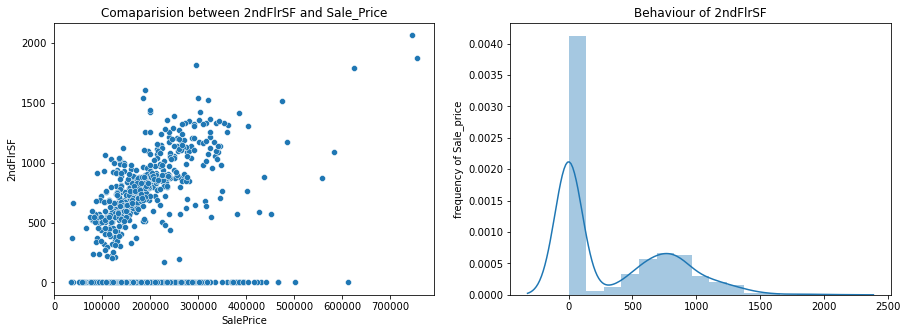

In [36]:
numerical_plot(df1,variable='2ndFlrSF')

# 2ndFlrSF: Second floor square feet
    
1. If the 2nd-floor area is more then prices of the house increase.
2. Area lies between 1000 to 2000.

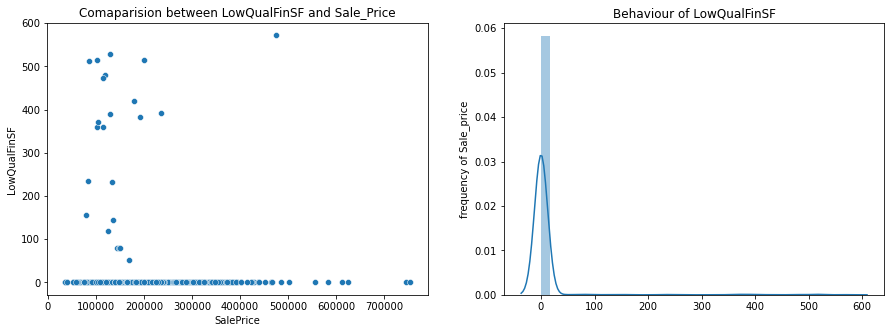

In [37]:
numerical_plot(df1,variable='LowQualFinSF')

# LowQualFinSF: Low-quality finished square feet (all floors)
    
1. If the finishing of the floor is low quality then prices are definitely down

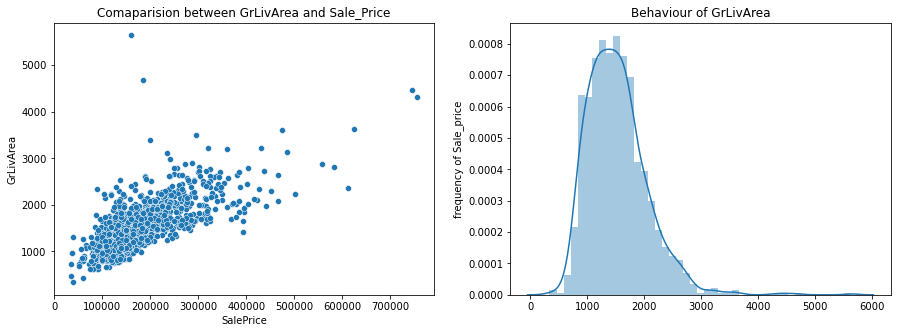

In [38]:
numerical_plot(df1,variable='GrLivArea')

# GrLivArea: Above grade (ground) living area square feet
    
1. If the Ground-floor area is more then prices of the house increase.
2. Area lies between 1000 to 2000.

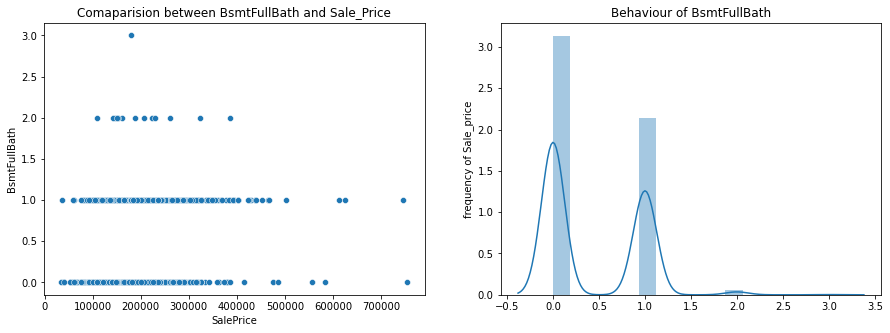

In [39]:
numerical_plot(df1,variable='BsmtFullBath')

# BsmtFullBath: Basement full bathrooms
    
1. If basement bath is Full size then prices are also increase.

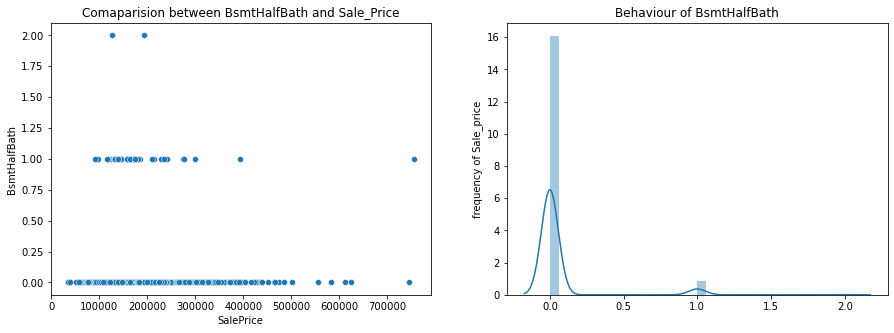

In [40]:
numerical_plot(df1,variable='BsmtHalfBath')

# BsmtHalfBath: Basement half bathrooms
    
1. If bathrooms are half then prices also increase

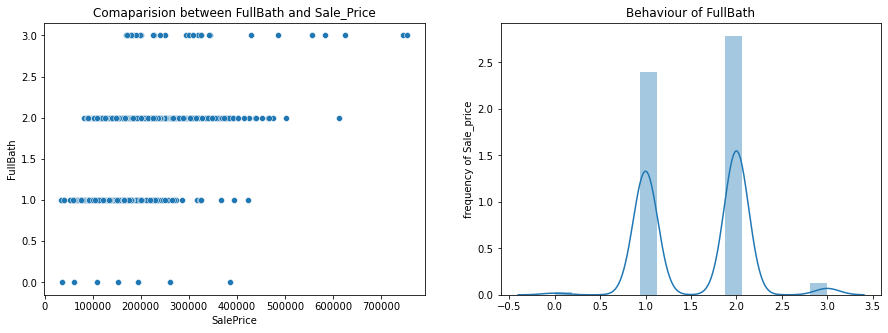

In [41]:
numerical_plot(df1,variable='FullBath')

# FullBath: Full bathrooms above grade
    
1. If batrooms is Full size then prices are increase.

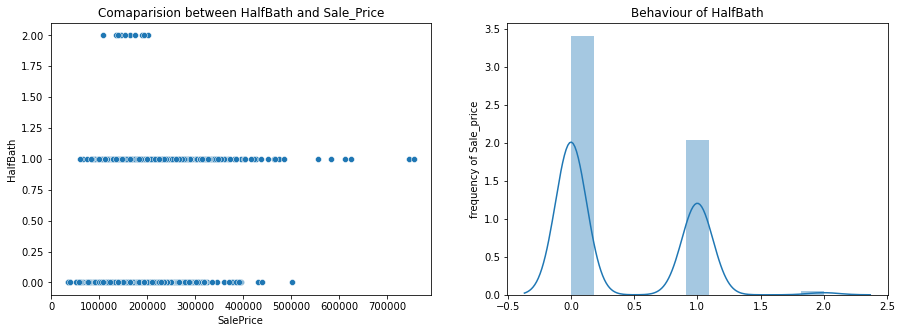

In [42]:
numerical_plot(df1,variable='HalfBath')

# HalfBath: Half baths above grade
    
1. if half bathrooms above grade then prices are alos increase.

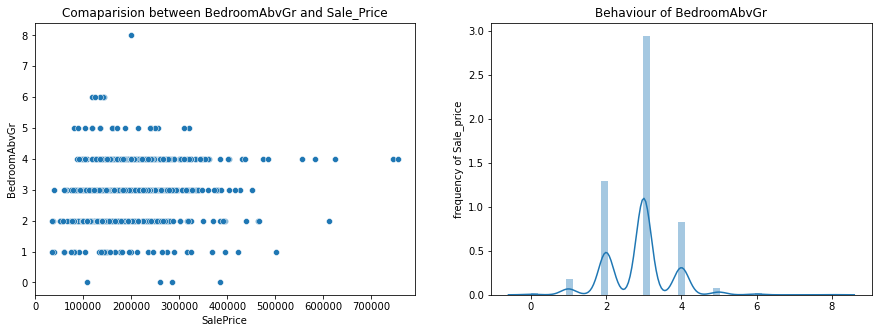

In [43]:
numerical_plot(df1,variable='BedroomAbvGr')

# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

1. If Bedrrom number is high then prices are also increase.

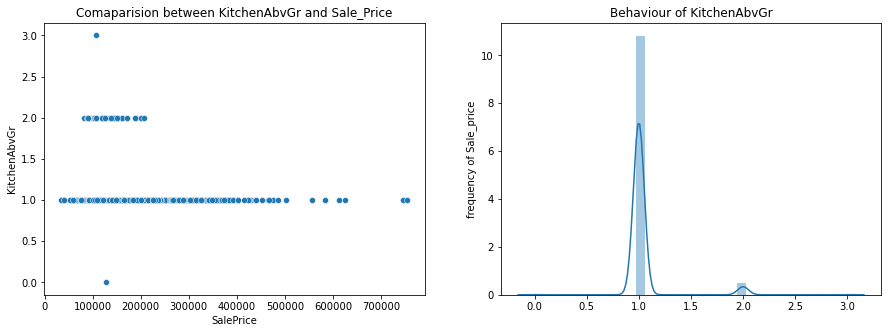

In [44]:
numerical_plot(df1,variable='KitchenAbvGr')

# Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
        
1. If kitchen is good then prices are increase

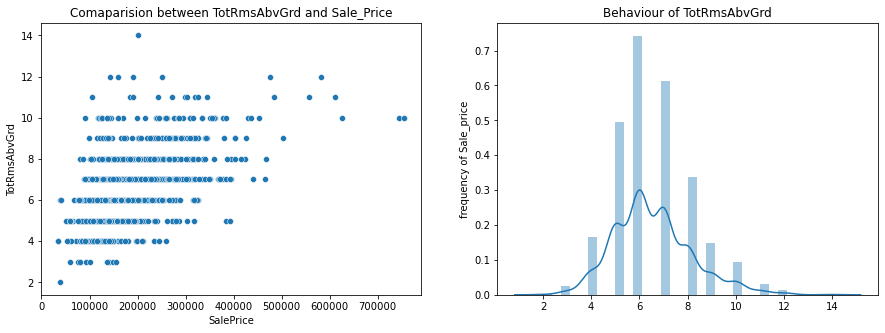

In [45]:
numerical_plot(df1,variable='TotRmsAbvGrd')

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    
1. Rooms are above grade then prices are increase

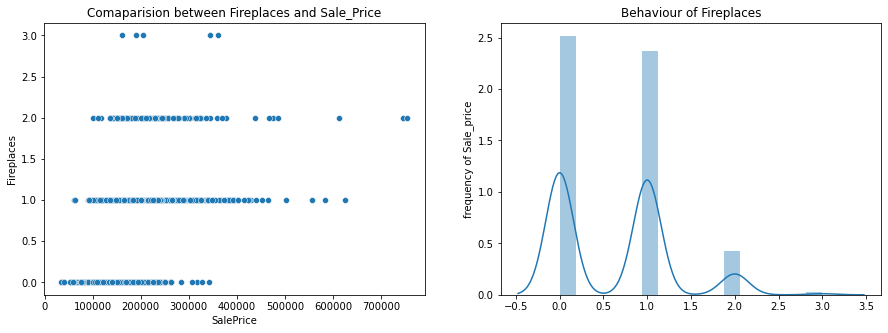

In [46]:
numerical_plot(df1,variable='Fireplaces')

# Fireplaces: Number of fireplaces
1. If in house number of fireplace exits are more then prices increase.

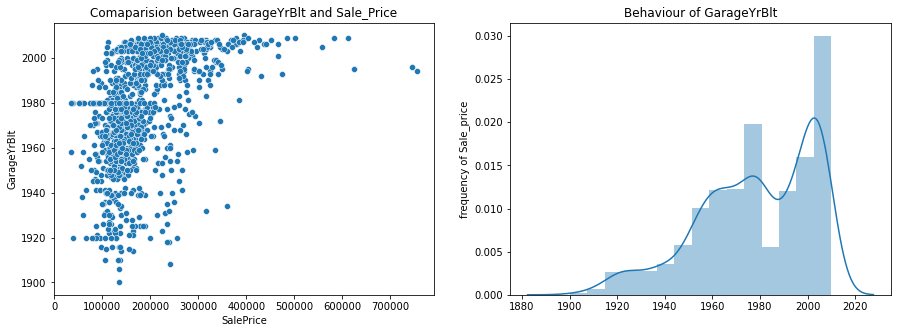

In [47]:
numerical_plot(df1,variable='GarageYrBlt')

# GarageYrBlt: Year garage was built
    
1. If the garage is built in nearly a year then prices increase.

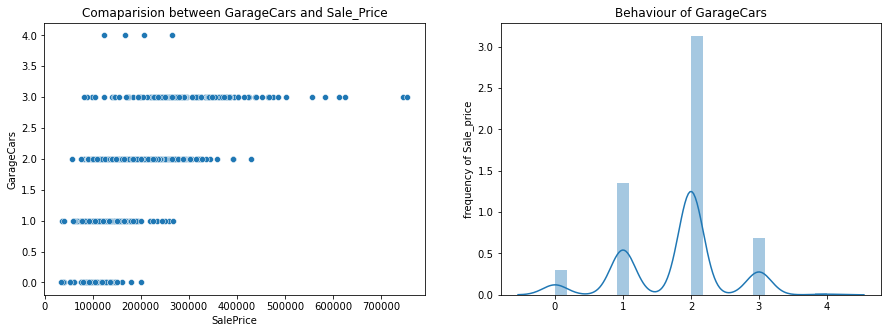

In [48]:
numerical_plot(df1,variable='GarageCars')

# GarageCars: Size of garage in car capacity
    
1. If In garage parking spaces are more then prices increase.
2. Most houses 2 cars parking space

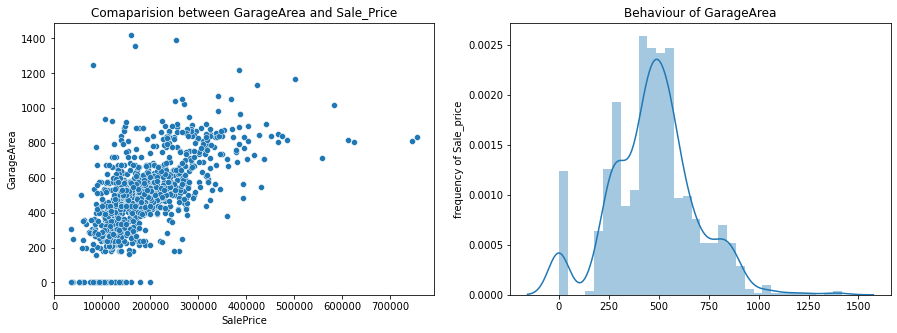

In [49]:
numerical_plot(df1,variable='GarageArea')

# GarageArea: Size of garage in square feet
    
1. If garage space is large then prices also increase.
2. Most of the garage made nearly 500 feet.

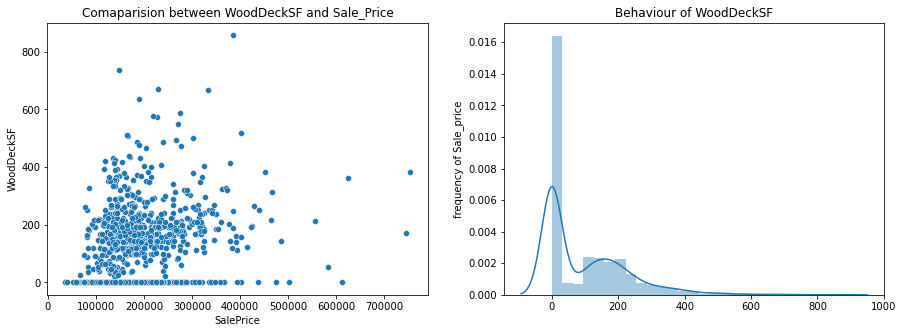

In [50]:
numerical_plot(df1,variable='WoodDeckSF')

# WoodDeckSF: Wood deck area in square feet 
    
1. If floor is made with low woodfloor then prices are increase

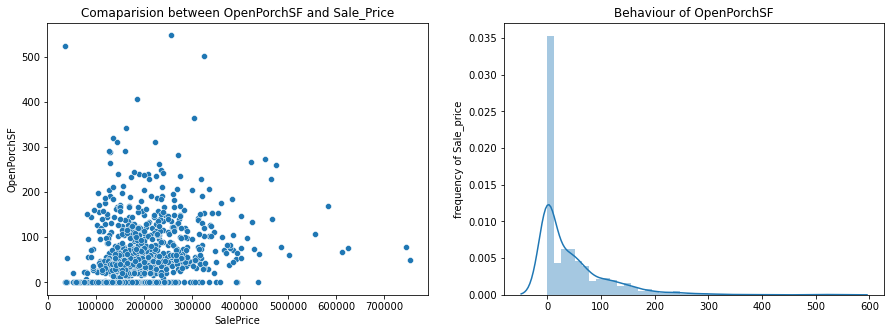

In [51]:
numerical_plot(df1,variable='OpenPorchSF')

# OpenPorchSF: Open porch area in square feet

1. If Porch space is less then prices increase. 

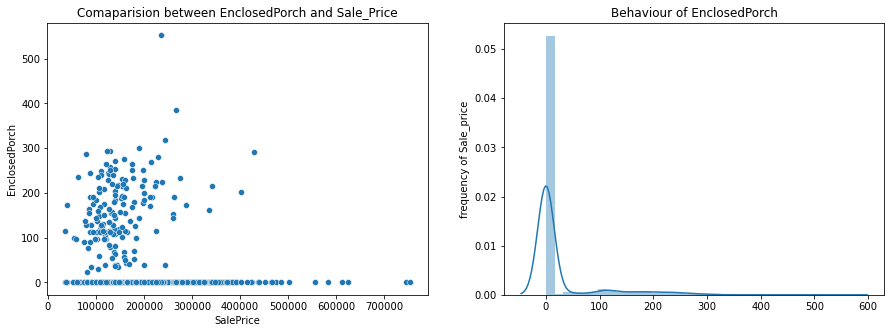

In [52]:
numerical_plot(df1,variable='EnclosedPorch')

# enclosed porch: Enclosed porch area in square feet
    
1. If enclose spaces are less then prices increase

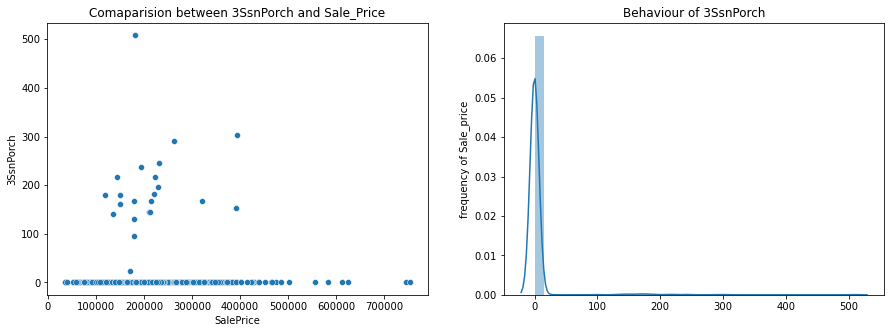

In [53]:
numerical_plot(df1,variable='3SsnPorch')

# 3SsnPorch: Three-season porch area in square feet
    
1. Three-season porch area is less than prices increase.

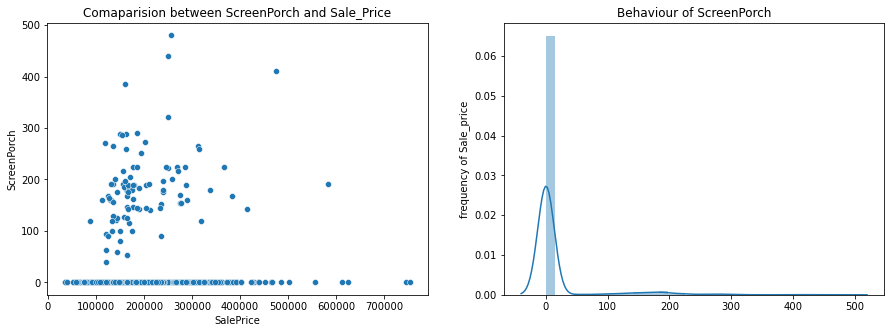

In [54]:
numerical_plot(df1,variable='ScreenPorch')

# screen porch: Screen porch area in square feet
    
1. Screen Porch area is less than prices increase.

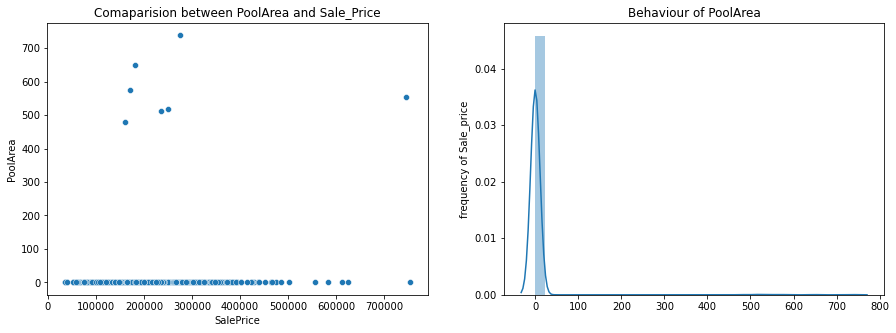

In [55]:
numerical_plot(df1,variable='PoolArea')

If pool area is less then prices increase.

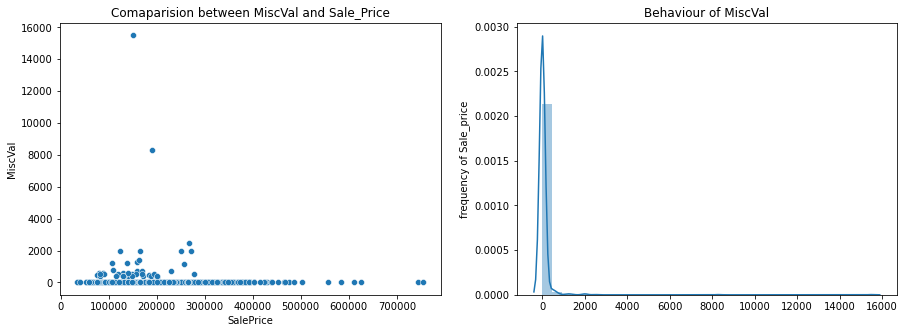

In [56]:
numerical_plot(df1,variable='MiscVal')

# MiscVal: Valueof miscellaneous feature
    
1. If miscellaneous features are fewer then prices increase

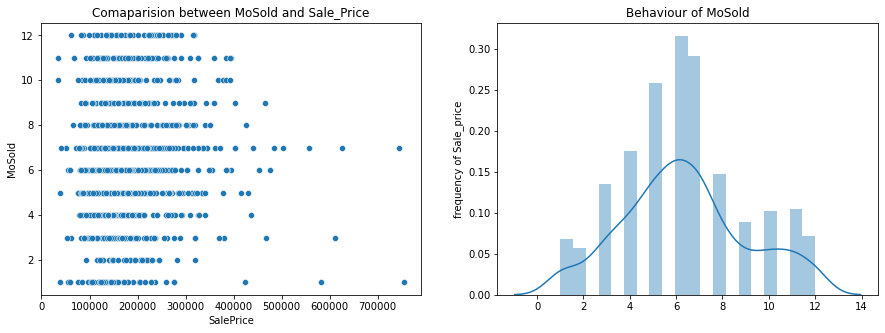

In [57]:
numerical_plot(df1,variable='MoSold')

# MoSold: Month Sold (MM)
    
1. Most of the houses are sold in June and July month

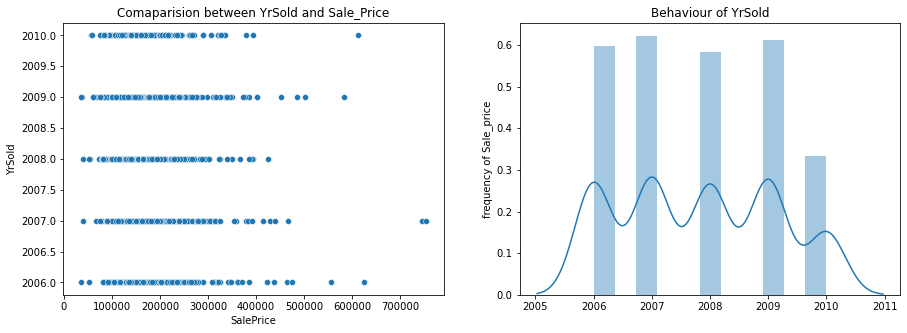

In [58]:
numerical_plot(df1,variable='YrSold')

# YrSold: Year Sold (YYYY)
    
1. Most of houses are sold in 2007 and 2009

This variables are not working good with target so we drop it-->EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,KitchenAbvGr,BsmtHalfBath,BsmtFinSF2

In [59]:
df1=df1.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','KitchenAbvGr','BsmtHalfBath','BsmtFinSF2','Id','LowQualFinSF'],axis=1)

In [60]:
df1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          120.0         70.0   4928.0          6.0          5.0     1976.0   
1           20.0         95.0  15865.0          8.0          6.0     1970.0   
2           60.0         92.0   9920.0          7.0          5.0     1996.0   
3           20.0        105.0  11751.0          6.0          6.0     1977.0   
4           20.0         70.0  16635.0          6.0          7.0     1977.0   
...          ...          ...      ...          ...          ...        ...   
1163        20.0         70.0   9819.0          5.0          5.0     1967.0   
1164        20.0         67.0   8777.0          4.0          5.0     1949.0   
1165       160.0         24.0   2280.0          6.0          6.0     1976.0   
1166        70.0         50.0   8500.0          4.0          4.0     1920.0   
1167        60.0         70.0   7861.0          6.0          5.0     2002.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           1976.0         0.0       120.0      958.0       1078.0     958.0   
1           1970.0         0.0       351.0     1043.0       2217.0    2217.0   
2           1997.0         0.0       862.0      255.0       1117.0    1127.0   
3           1977.0       480.0       705.0     1139.0       1844.0    1844.0   
4           2000.0       126.0      1246.0      356.0       1602.0    1602.0   
...            ...         ...         ...        ...          ...       ...   
1163        1967.0        31.0       450.0      432.0        882.0     900.0   
1164        2003.0         0.0         0.0        0.0          0.0    1126.0   
1165        1976.0         0.0       566.0      289.0        855.0     855.0   
1166        1950.0         0.0         0.0      649.0        649.0     649.0   
1167        2003.0         0.0       457.0      326.0        783.0     807.0   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          0.0      958.0           0.0       2.0       0.0           2.0   
1          0.0     2217.0           1.0       2.0       0.0           4.0   
2        886.0     2013.0           1.0       2.0       1.0           3.0   
3          0.0     1844.0           0.0       2.0       0.0           3.0   
4          0.0     1602.0           0.0       2.0       0.0           3.0   
...        ...        ...           ...       ...       ...           ...   
1163       0.0      900.0           0.0       1.0       0.0           3.0   
1164       0.0     1126.0           0.0       2.0       0.0           2.0   
1165     601.0     1456.0           0.0       2.0       1.0           3.0   
1166     668.0     1317.0           0.0       1.0       0.0           3.0   
1167     702.0     1509.0           1.0       2.0       1.0           3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         1.0       1977.0         2.0       440.0   
1              8.0         1.0       1970.0         2.0       621.0   
2              8.0         1.0       1997.0         2.0       455.0   
3              7.0         1.0       1977.0         2.0       546.0   
4              8.0         1.0       1977.0         2.0       529.0   
...            ...         ...          ...         ...         ...   
1163           5.0         0.0       1970.0         1.0       280.0   
1164           5.0         0.0       2002.0         2.0       520.0   
1165           7.0         1.0       1976.0         2.0       440.0   
1166           6.0         0.0       1920.0         1.0       250.0   
1167           7.0         1.0       2002.0         2.0       393.0   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  
0            0.0        205.0     2.0  2007.0   128000.0  
1           81.0        207.0    10.0  2007.0   268000.0  
2          180.0        130.0     6.0  2007.0   269790.0  
3            0.0        122.0     1.0  2010.0   190000.0  
4          240.0       

# Categorical Type Dataset

In [61]:
df2=df.select_dtypes('object')
df2

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd

In [62]:
# check null values in categorical type dataset
df2.isnull().sum()

MSZoning            0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinType2       31
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu       551
GarageType         64
GarageFinish       64
GarageQual         64
GarageCond         64
PavedDrive          0
PoolQC           1161
Fence             931
MiscFeature      1124
SaleType            0
SaleCondition       0
dtype: int64

Here in some variable null values number are more so we direct remove it else it raise error during modeling.
1. Alley-->            1091
2. FireplaceQu-->      551
3. PoolQC-->          1161
4. Fence-->             931
5. MiscFeature-->      1124

In [63]:
df2=df2.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
df2

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1163       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd          Y      SBrkr          Gd        Typ   
...      ...       ... 

# SIMPLE IMPUTER METHOD

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
imp=SimpleImputer(strategy='most_frequent')

In [66]:
for i in df2.columns:
    df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))

In [67]:
df2

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1163       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock       TA       TA           No          Unf          Unf   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [68]:
df2.isnull().sum().sum()

0

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

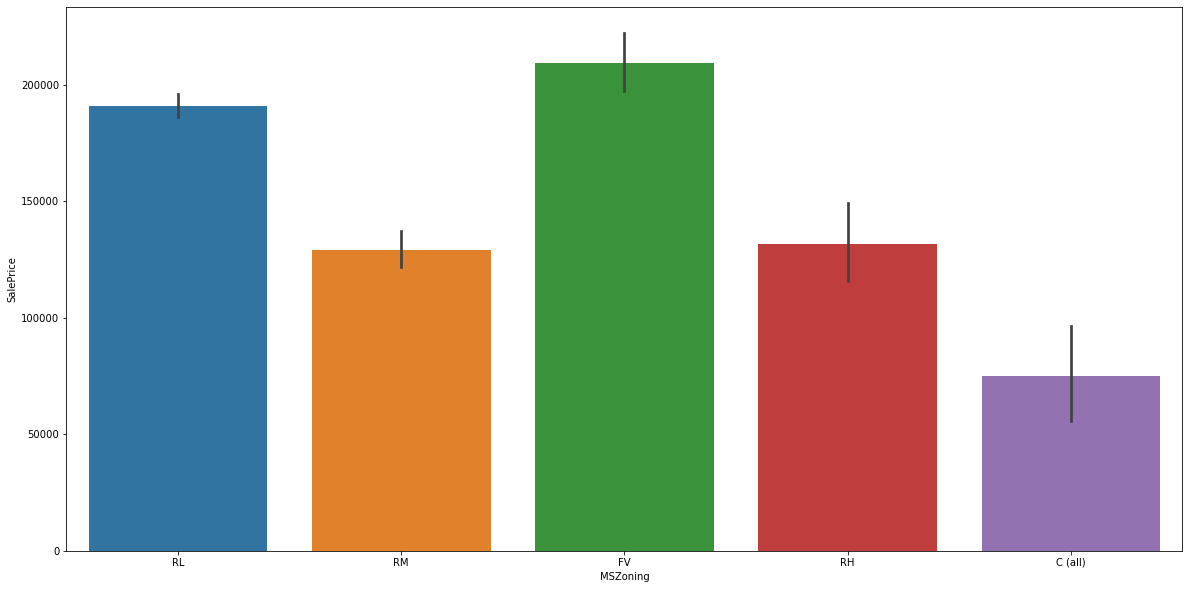

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(x='MSZoning',y=df1.SalePrice,data=df2)

# MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low-Density Park 
       RM	Residential Medium Density
        
The highest price of land near 2000000 is Floating Village Residential after this where Residential Low Density

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

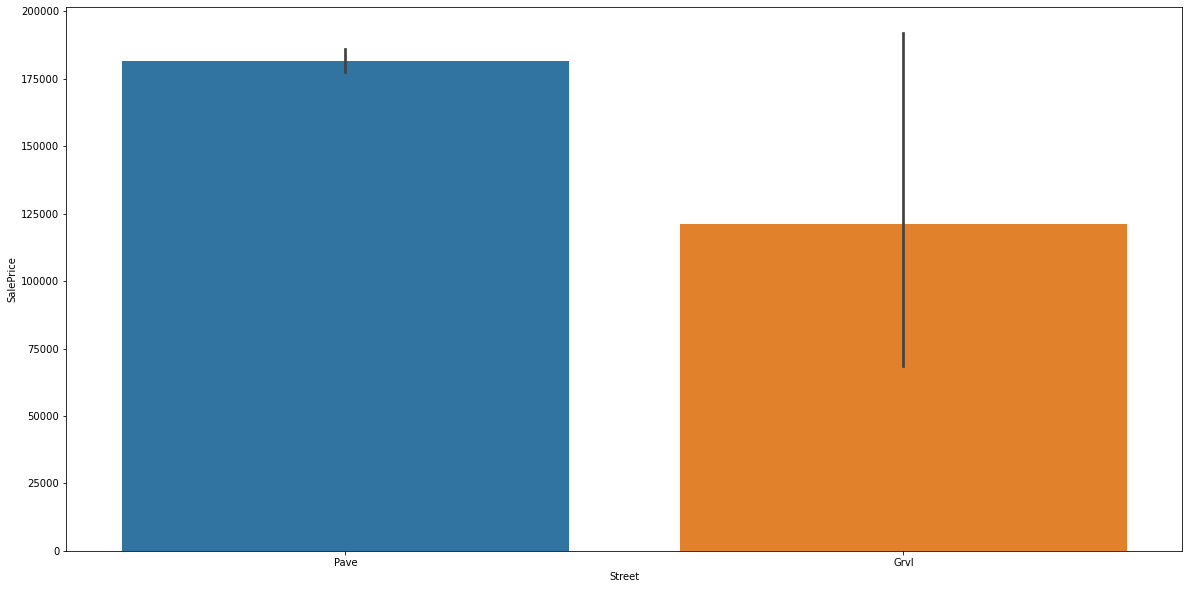

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(x='Street',y=df1.SalePrice,data=df2)

# Street: Type of road access to the property

       Grvl	Gravel	
       Pave	Paved
    
The highest prices of land in Pave street in Australia

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

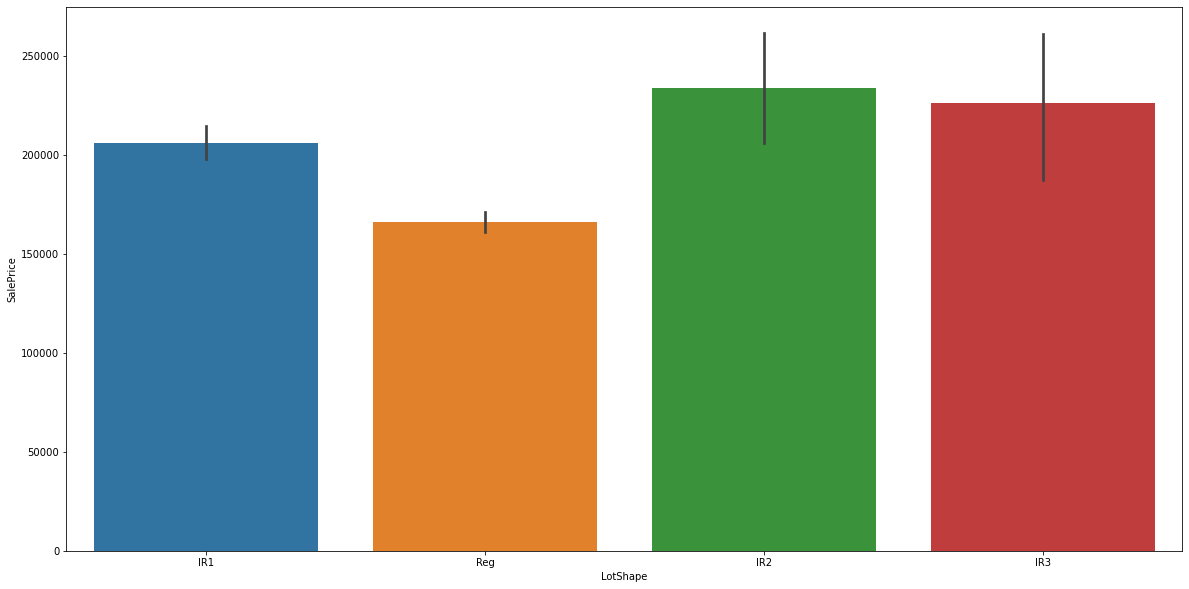

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x='LotShape',y=df1.SalePrice,data=df2)

# LotShape: General shape of the property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

The highest price of houses Where shape is Moderately Irregular

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

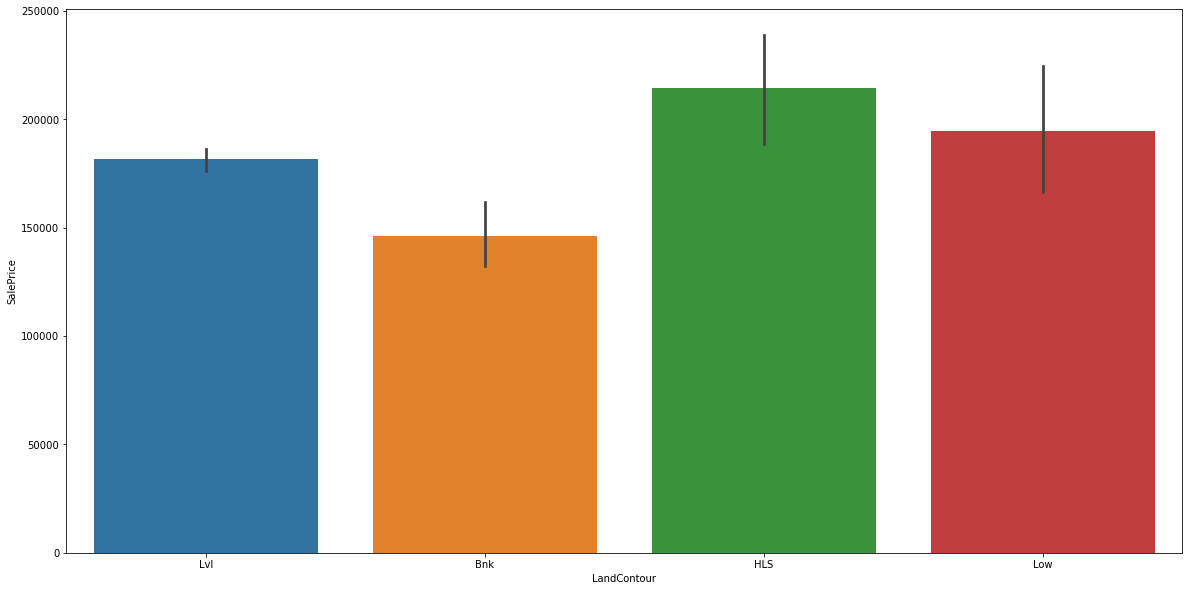

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x='LandContour',y=df1.SalePrice,data=df2)

# LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
    
In Australia, if houses are located near the Hil side then prices are higher

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

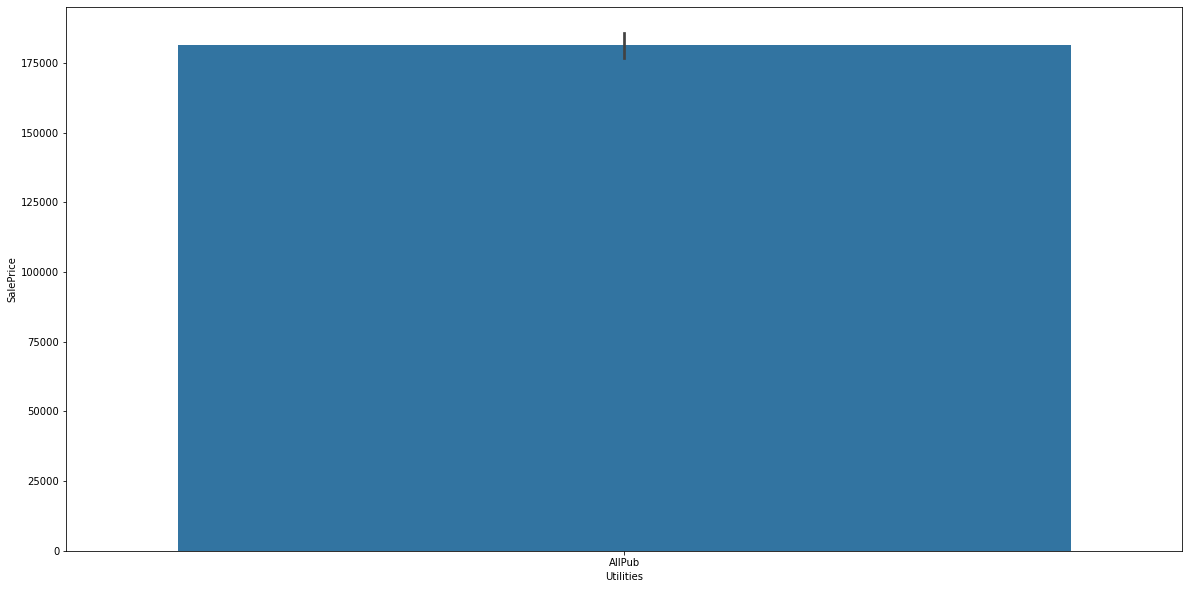

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x='Utilities',y=df1.SalePrice,data=df2)

# Utilities: Type of utilities available
		
       AllPub	All public Utilities (E, G, W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
        
In Australia where all public utilities are present their houses are higher prices

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

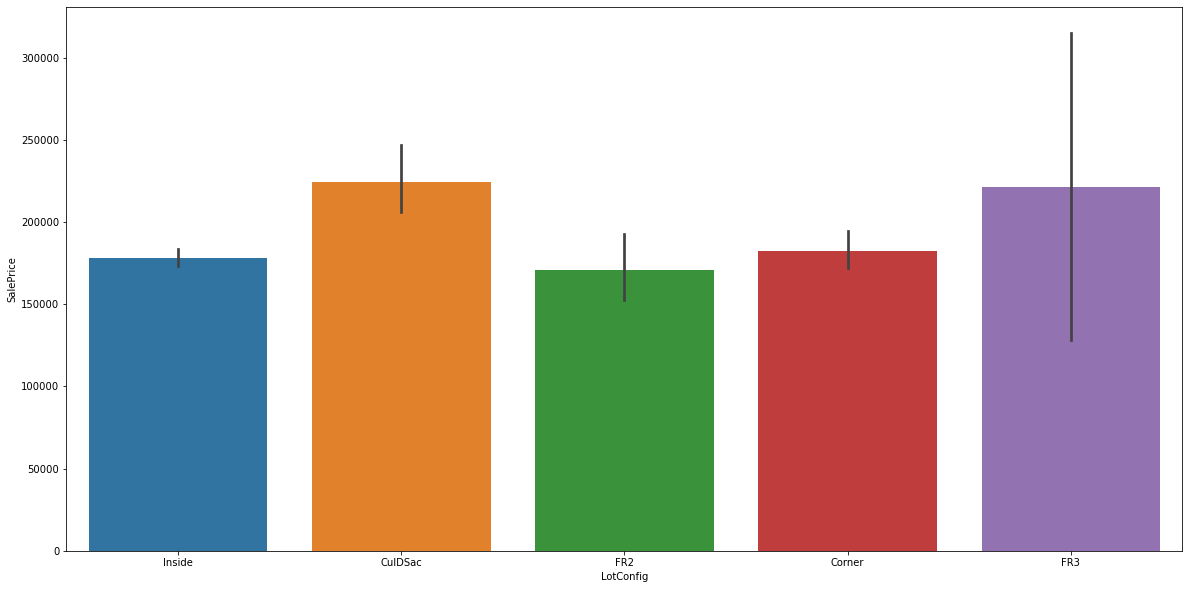

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='LotConfig',y=df1.SalePrice,data=df2)

# LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
If Front age on 3 sides of property then prices of houses higher

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

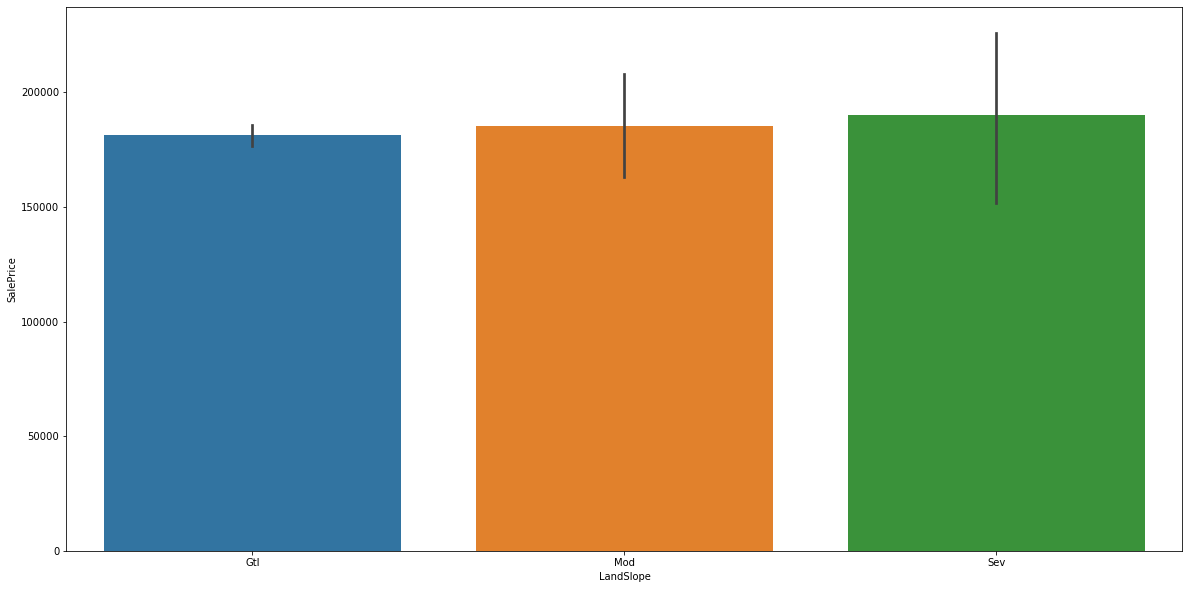

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x='LandSlope',y=df1.SalePrice,data=df2)

# LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
If land take server slope then prices are higher

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

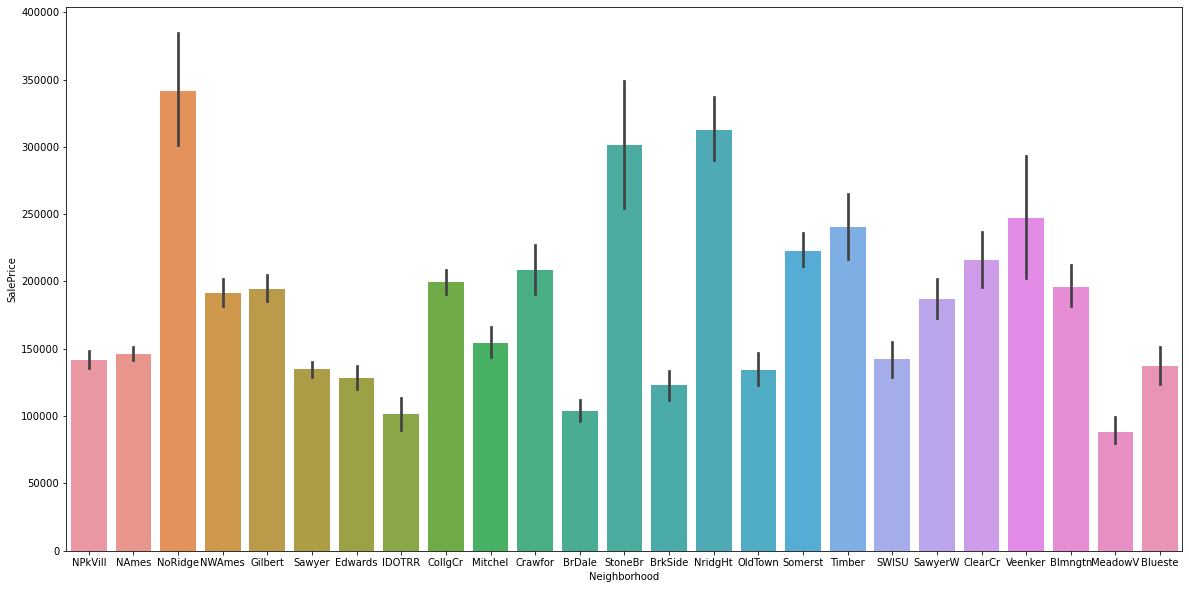

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(x='Neighborhood',y=df1.SalePrice,data=df2)

# Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
If houses are near Northridge then prices are higher.

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

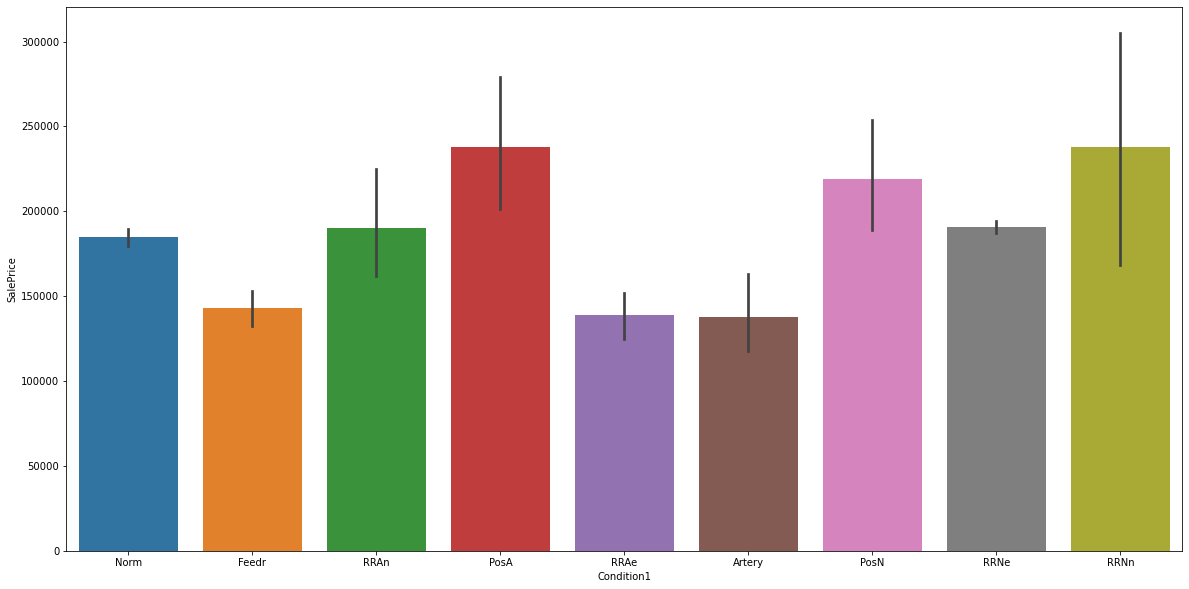

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x='Condition1',y=df1.SalePrice,data=df2)

# Condition1: Proximity to various conditions
	
       Artery	Adjacent to an arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to positive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
If houses are fulfilled cindition1 of Adjacent to East-West Railroad then prices higher

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

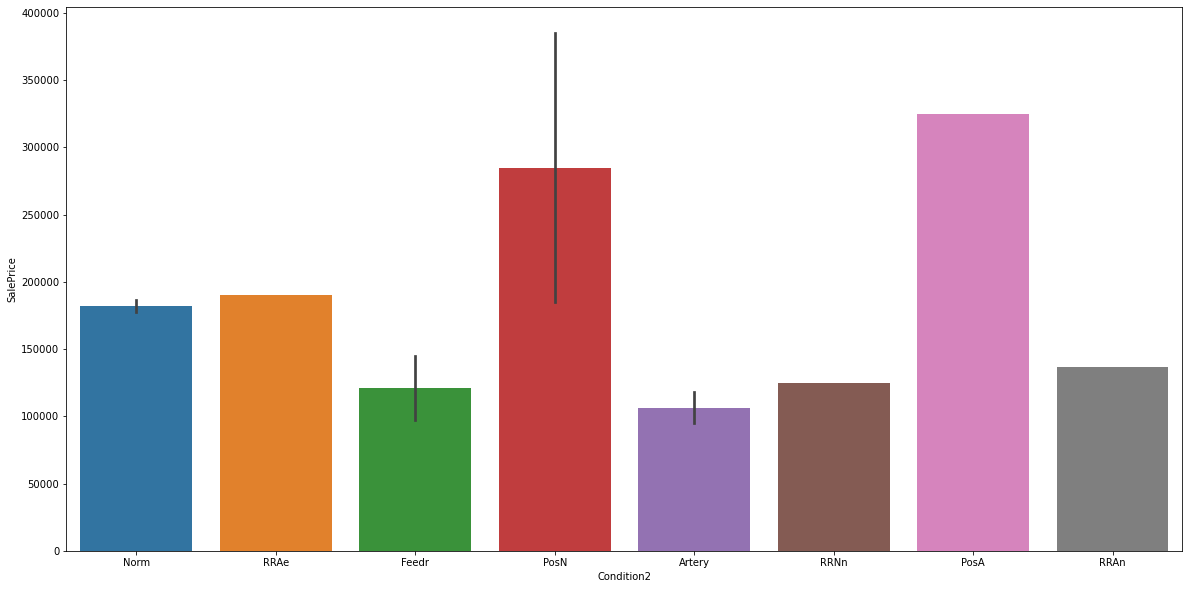

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x='Condition2',y=df1.SalePrice,data=df2)

# Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
If houses are fullfill condition2 of Adjacent to postive off-site feature then prices are higher.

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

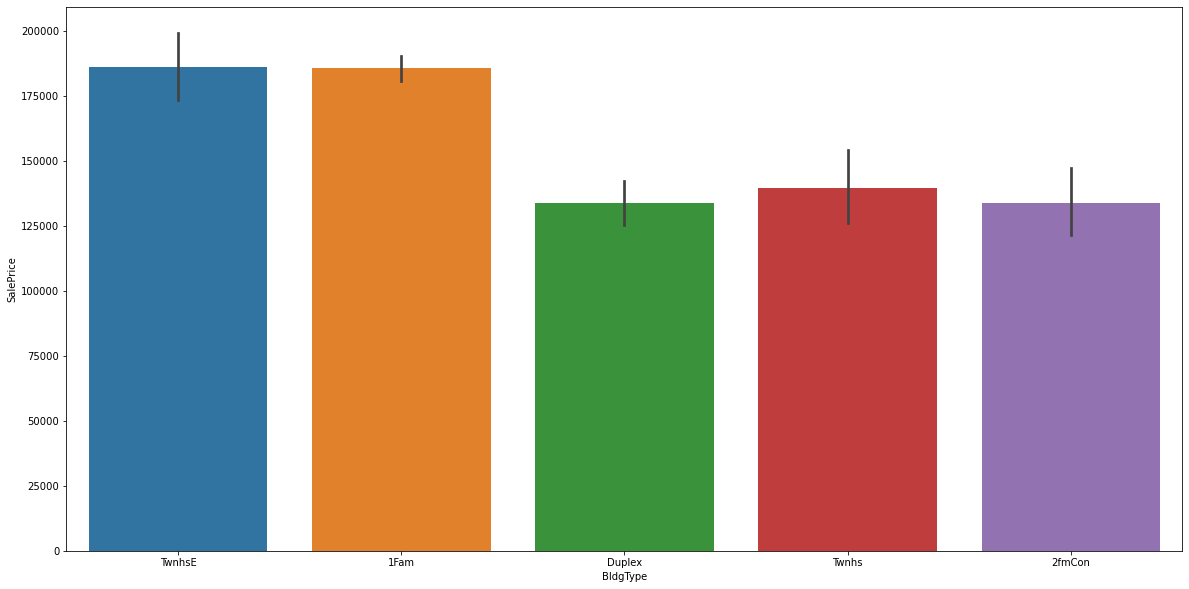

In [79]:
plt.figure(figsize=(20,10))
sns.barplot(x='BldgType',y=df1.SalePrice,data=df2)

# BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
If houses are Townhouse Inside Unit then prices are higher

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

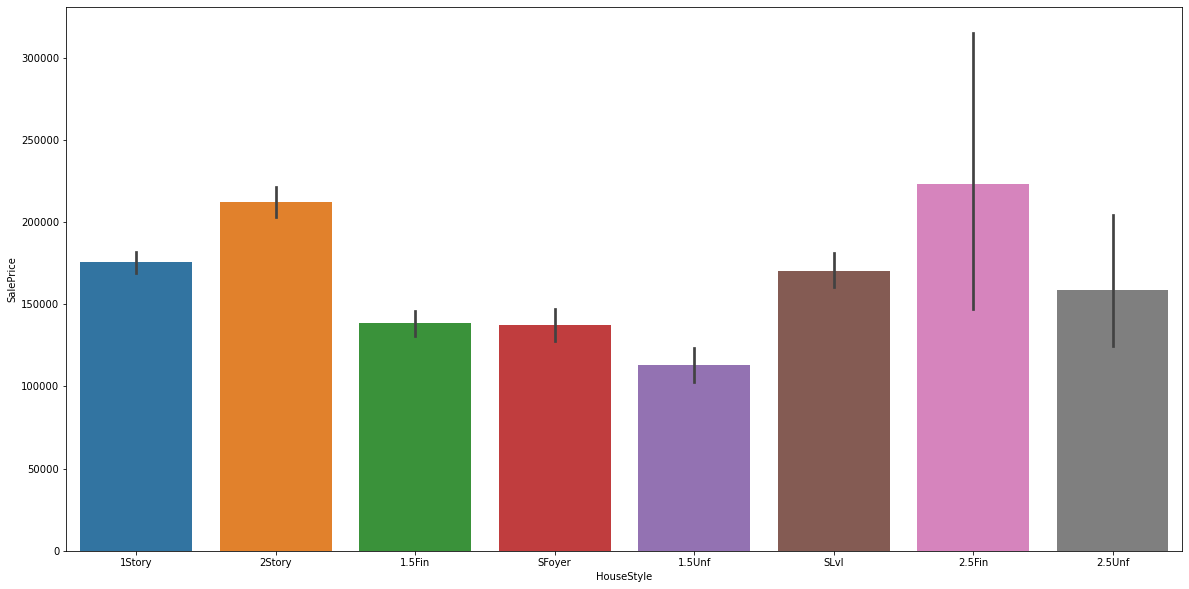

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x='HouseStyle',y=df1.SalePrice,data=df2)

# HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two-story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
If the style of the house is Two and one-half story: 2nd level finished then house prices higher

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

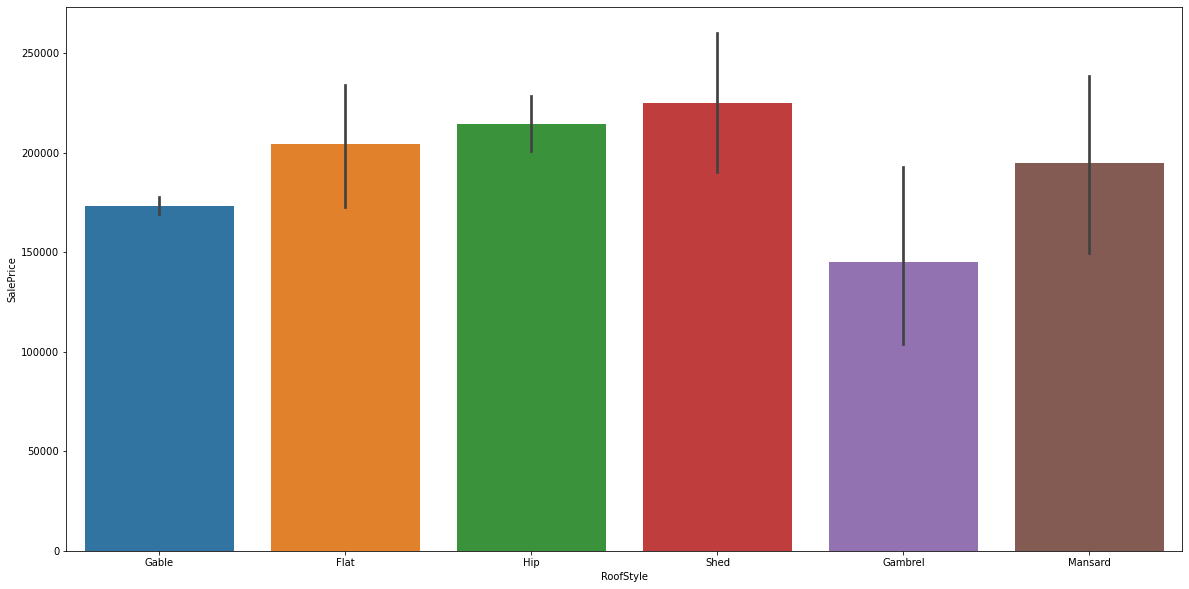

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x='RoofStyle',y=df1.SalePrice,data=df2)

# RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
If the roof style of houses is shed type then prices are higher.

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

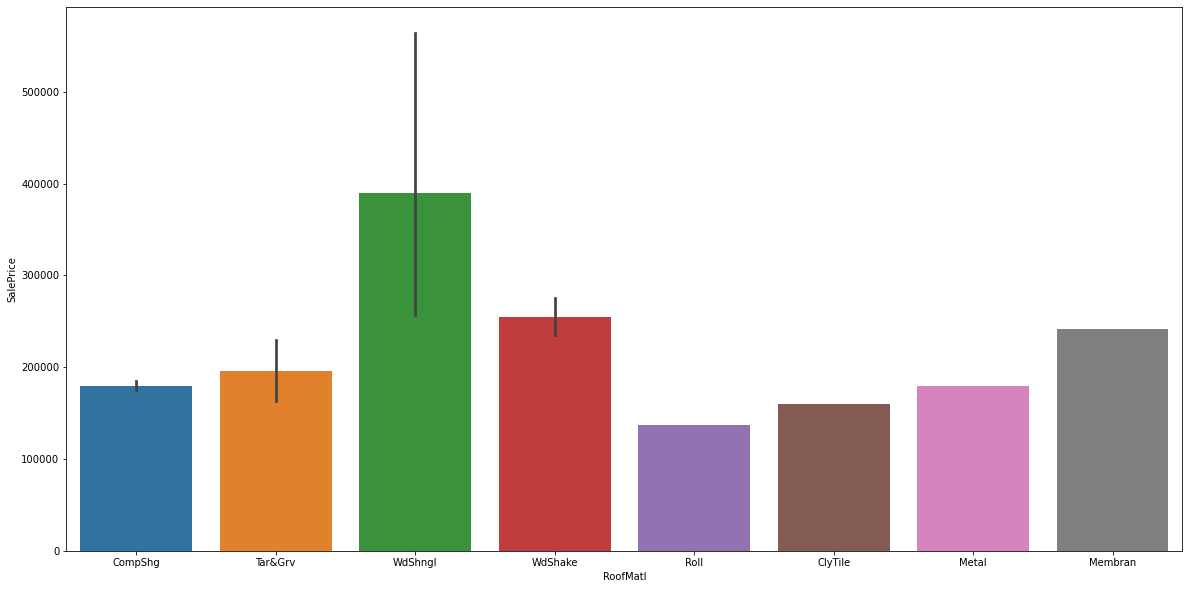

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='RoofMatl',y=df1.SalePrice,data=df2)

# RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membrane	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
If the house roof is wood shingles then prices are higher

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

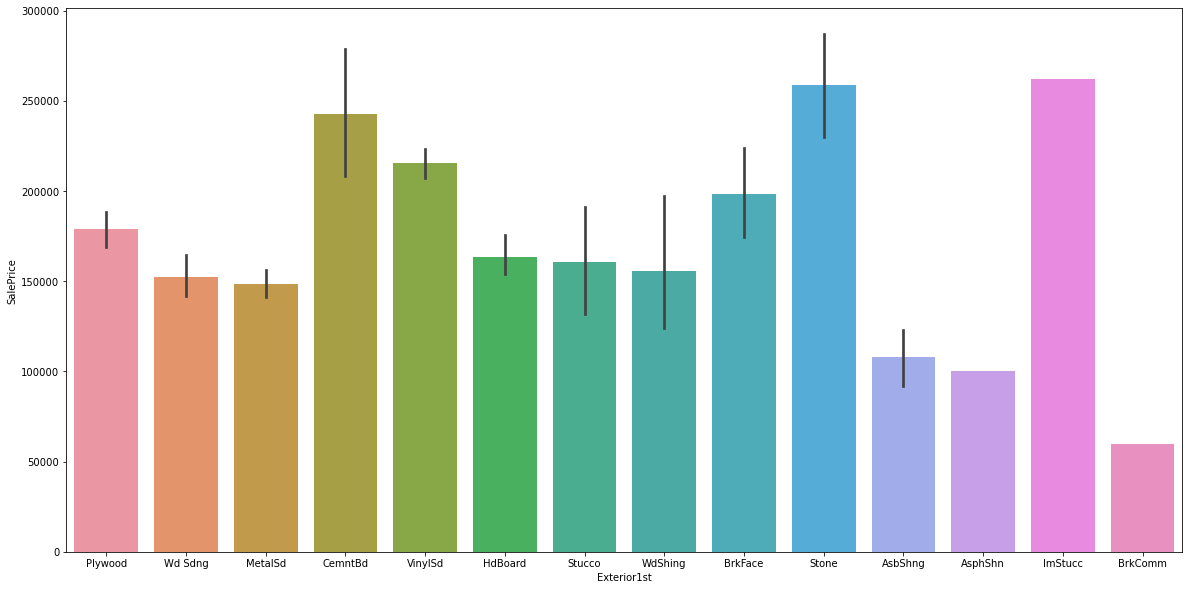

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x='Exterior1st',y=df1.SalePrice,data=df2)

# Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       headboard	Hard Board
       ImStucc	Imitation Stucco
       metals	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
    If exterior covering on houses type is stoned then prices are higher

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

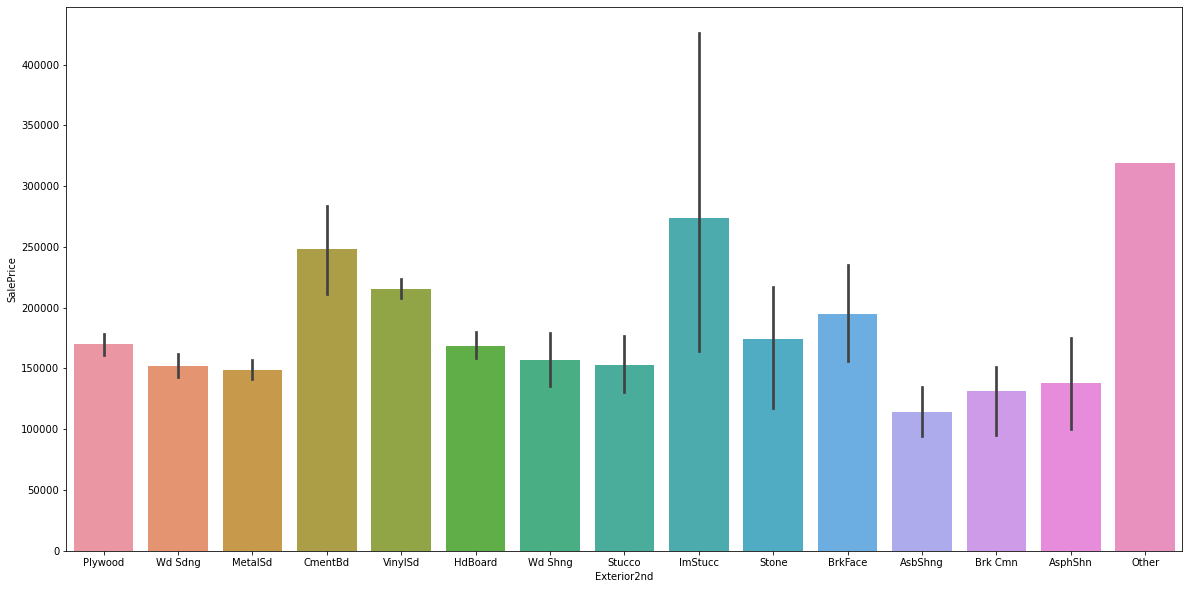

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x='Exterior2nd',y=df1.SalePrice,data=df2)

# Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
        
If exterior covering on houses are follow these condition then prices are higher

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

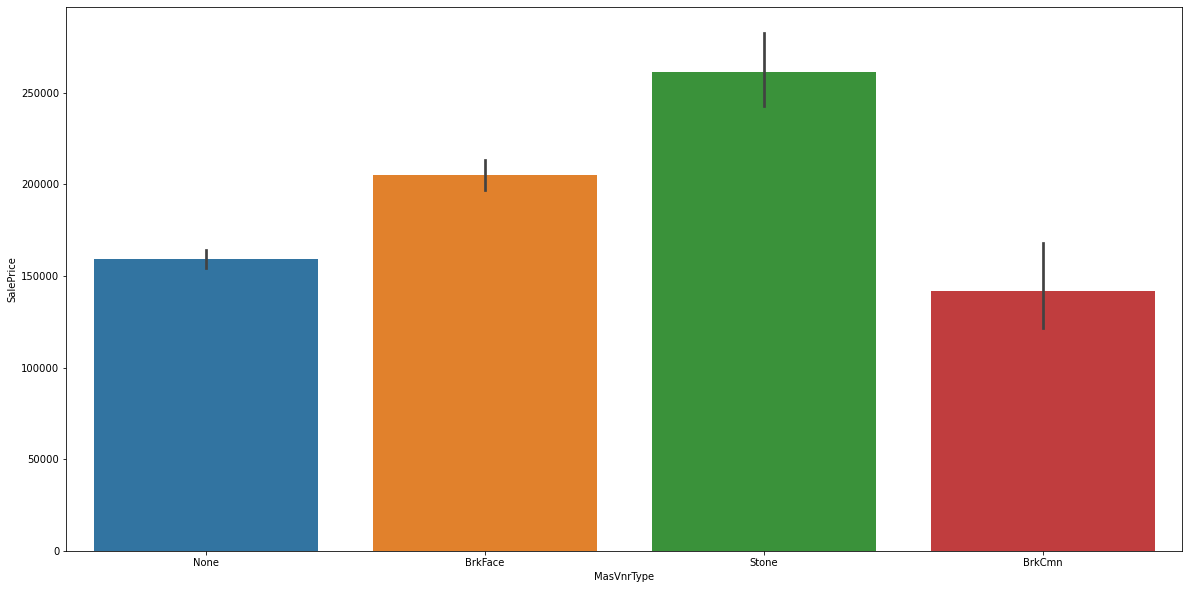

In [85]:
plt.figure(figsize=(20,10))
sns.barplot(x='MasVnrType',y=df1.SalePrice,data=df2)

# MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
If Masonary vaneer type is stone then prices are higher.

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

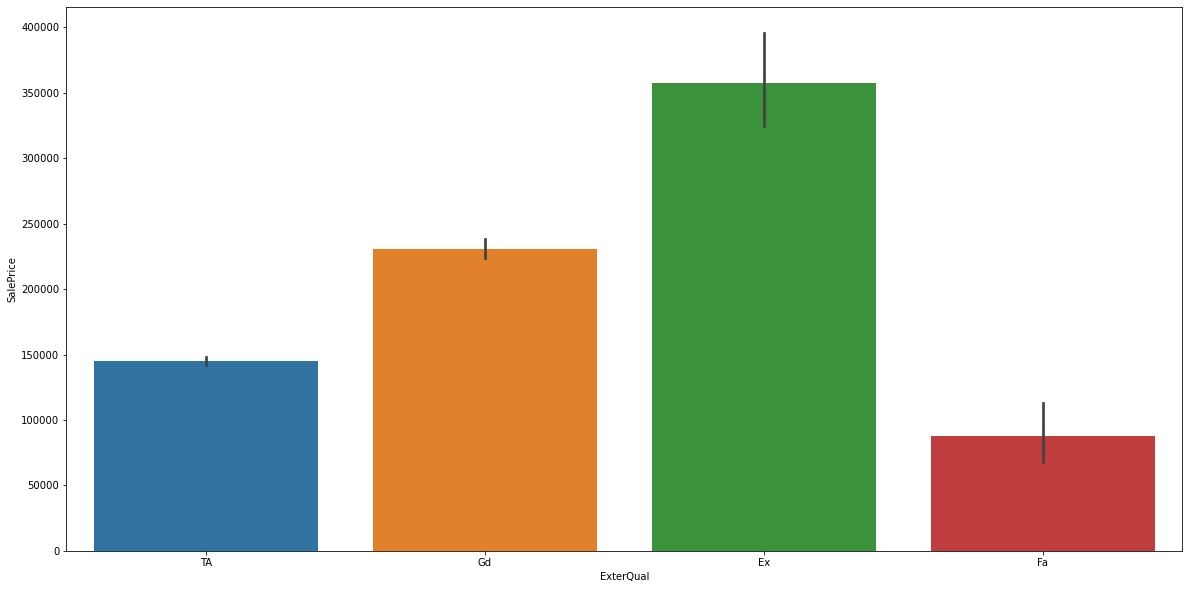

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(x='ExterQual',y=df1.SalePrice,data=df2)

# ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
Evaluates the quality of the material on the exterior type is excellent then prices are higher.

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

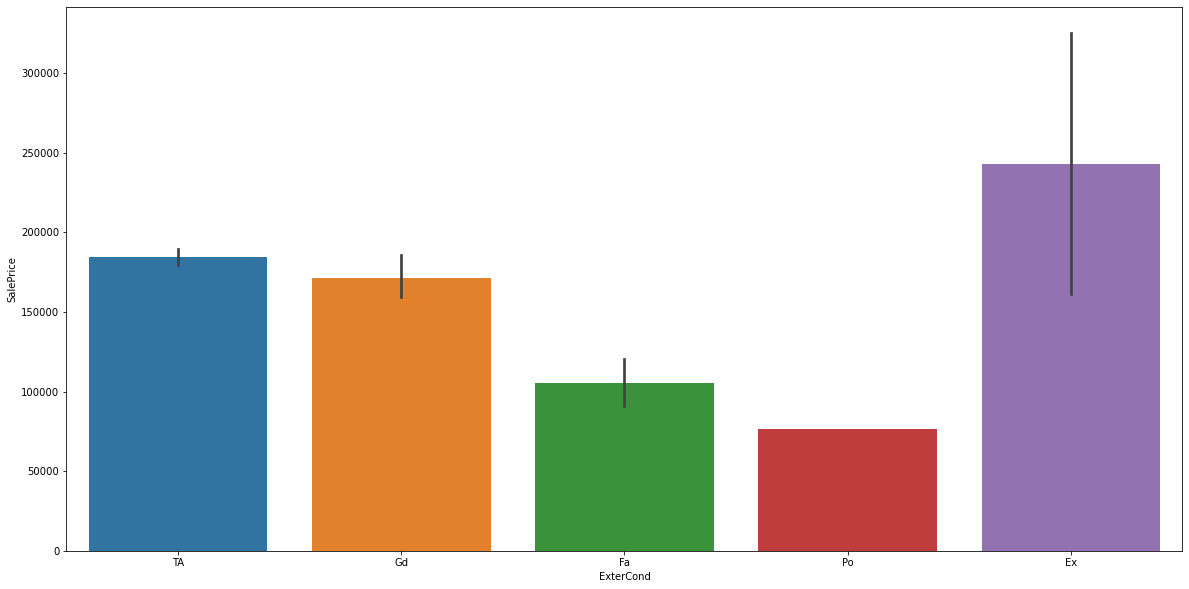

In [87]:
plt.figure(figsize=(20,10))
sns.barplot(x='ExterCond',y=df1.SalePrice,data=df2)

# ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
Evaluates the present condition of the material on the exterior is excellent type then prices are higher

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

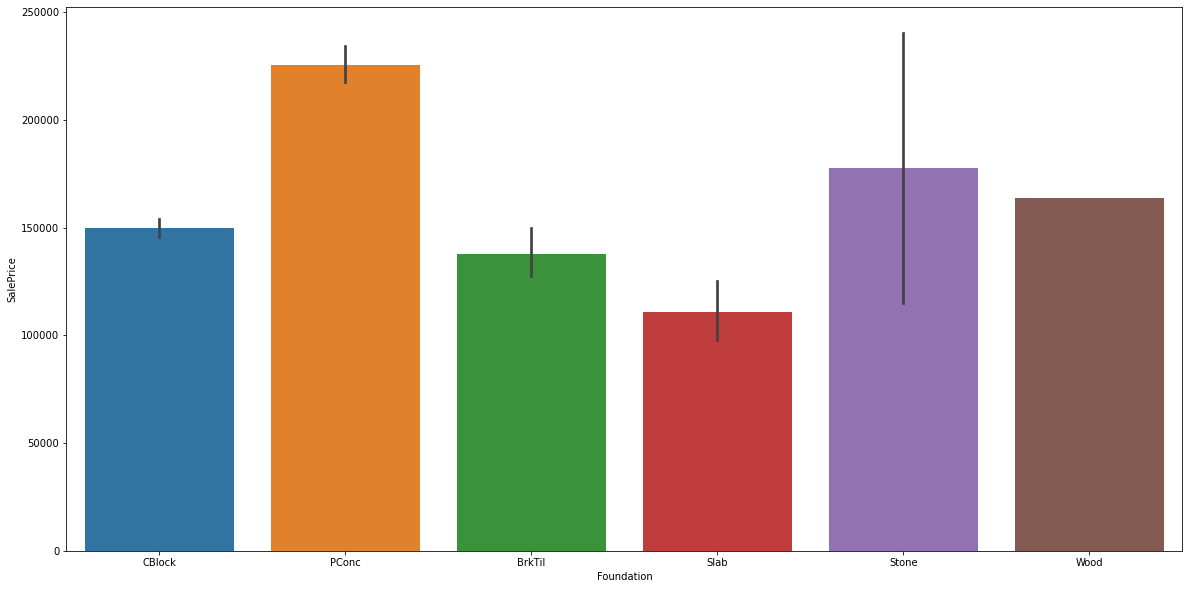

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(x='Foundation',y=df1.SalePrice,data=df2)

# Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
If the foundation of the house is made of poured concrete then prices are higher

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

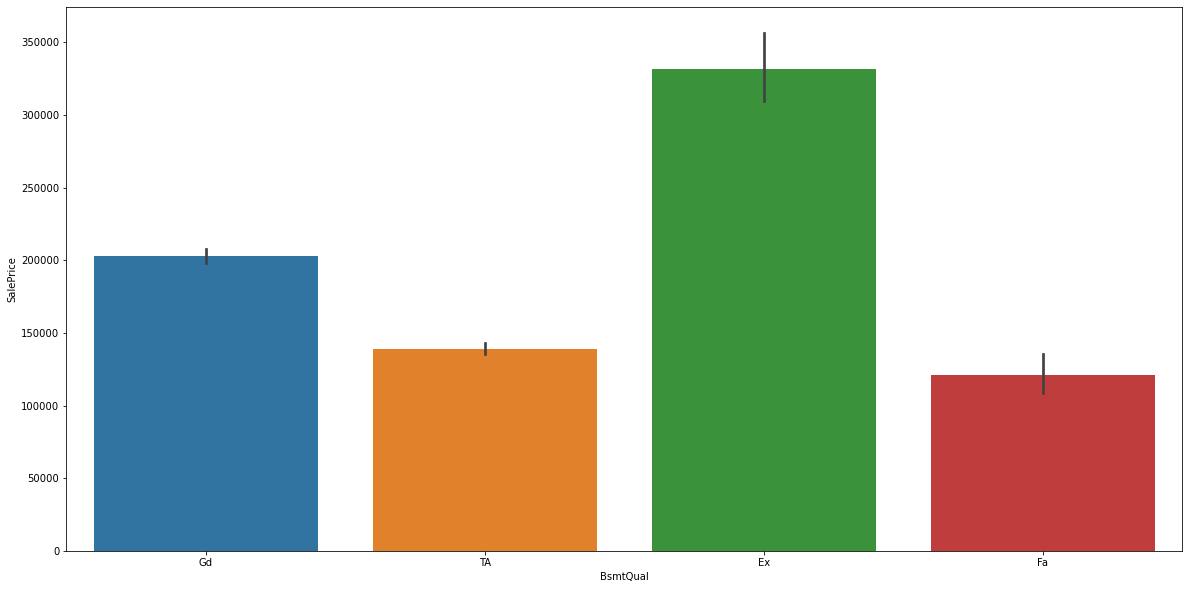

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(x='BsmtQual',y=df1.SalePrice,data=df2)

# BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
If Evaluates the height of the basement is excellent type then prices are higher 

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

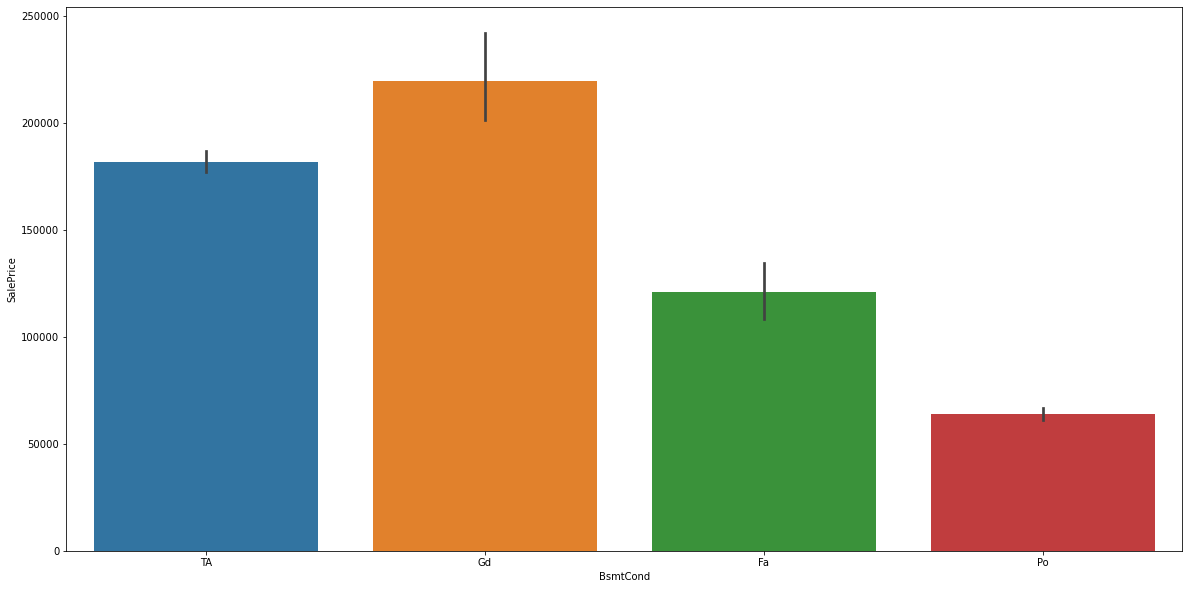

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x='BsmtCond',y=df1.SalePrice,data=df2)

# BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
Evaluates the general condition of the basement type is excellent then prices also increase.

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

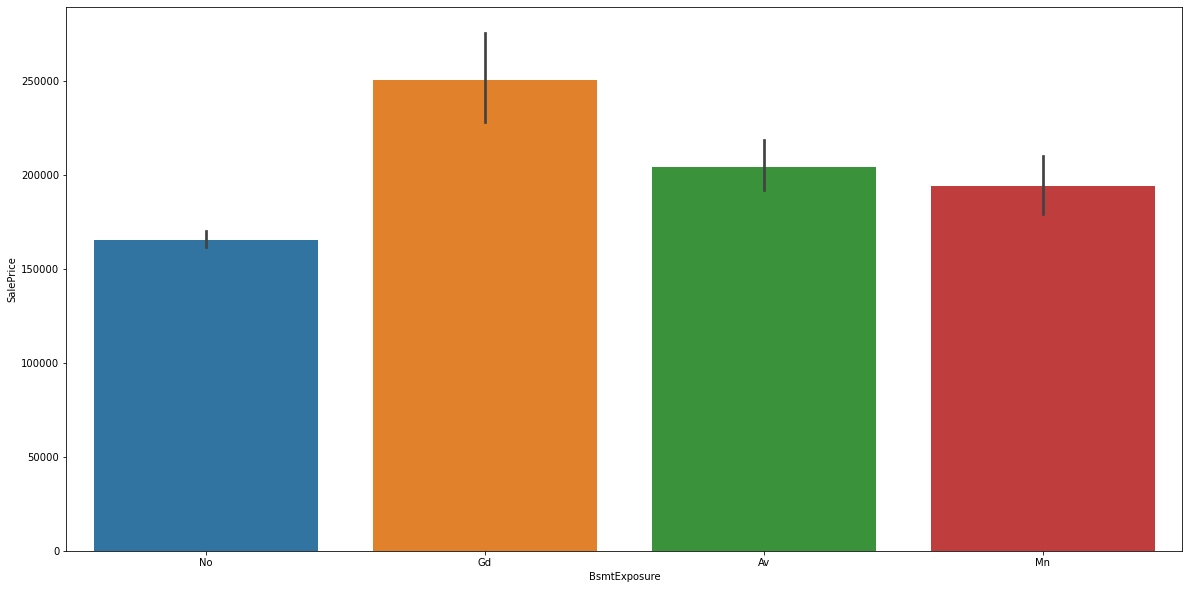

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(x='BsmtExposure',y=df1.SalePrice,data=df2)

# BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
Refers to walkout or garden level walls are in good exposure then prices are higher.

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

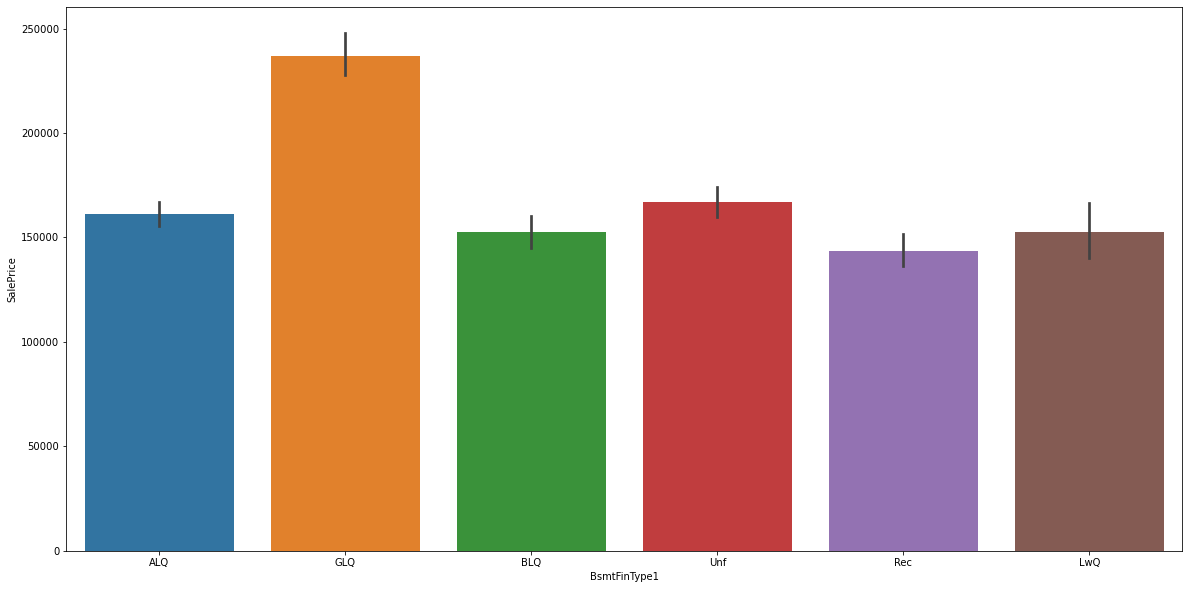

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x='BsmtFinType1',y=df1.SalePrice,data=df2)

# BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
Rating of basement finished area type is Good Living Quarters then prices are higher.

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

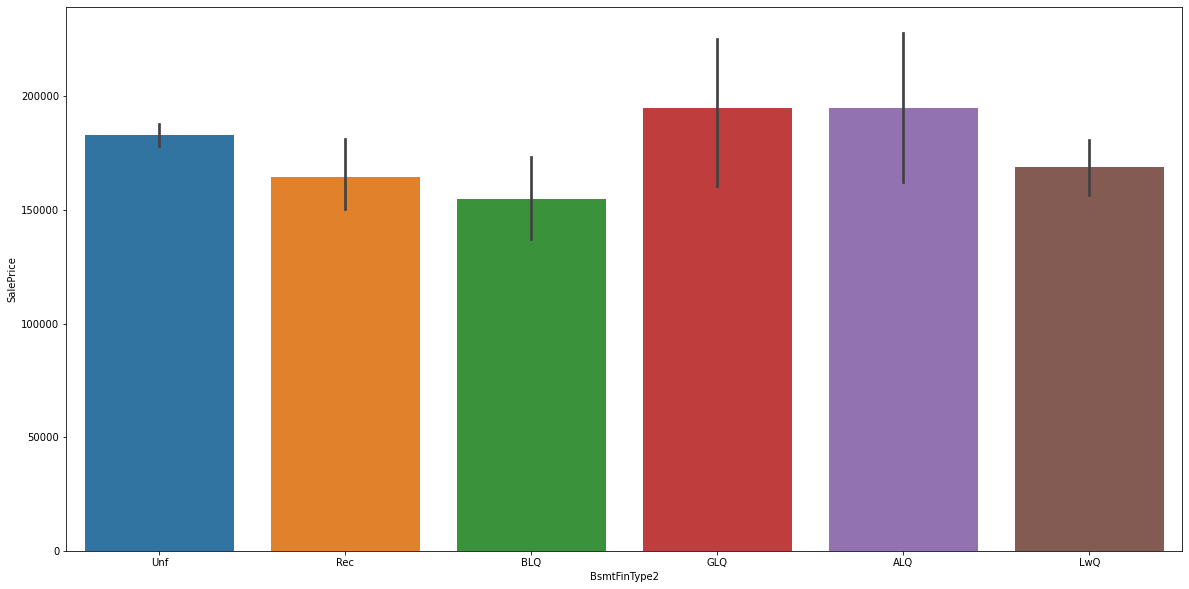

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x='BsmtFinType2',y=df1.SalePrice,data=df2)

# BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
Rating of basement finished area is Good Living Quarters and Average Living Quarters then prices are higher.

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

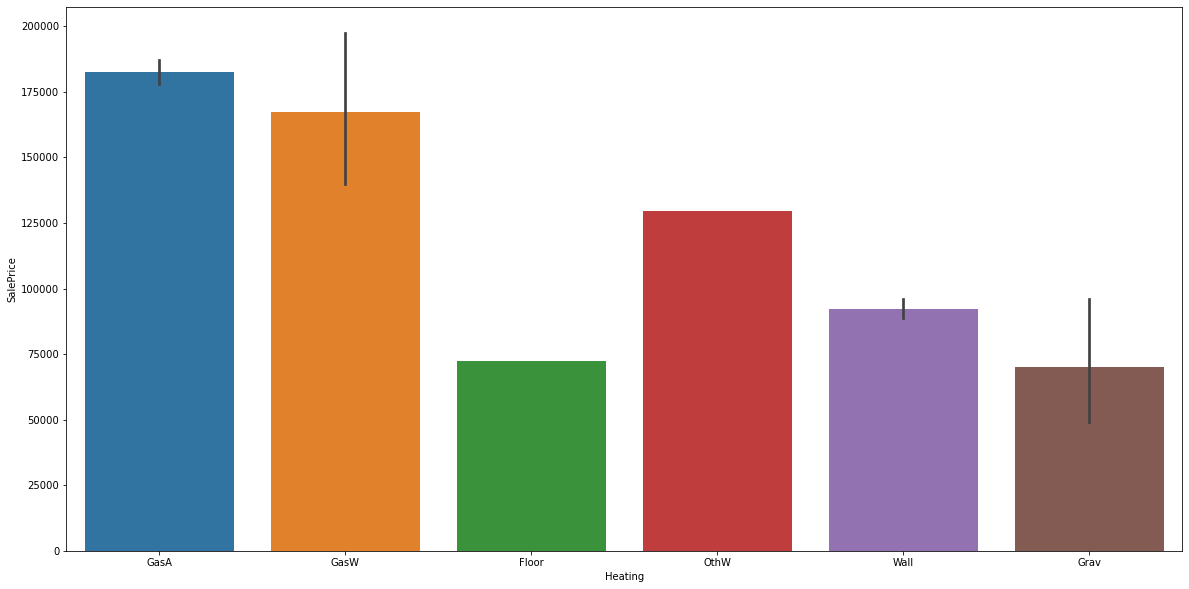

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(x='Heating',y=df1.SalePrice,data=df2)

# Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
 Type of heating is present in house Gas hot water or steam heat then prices also increase.

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

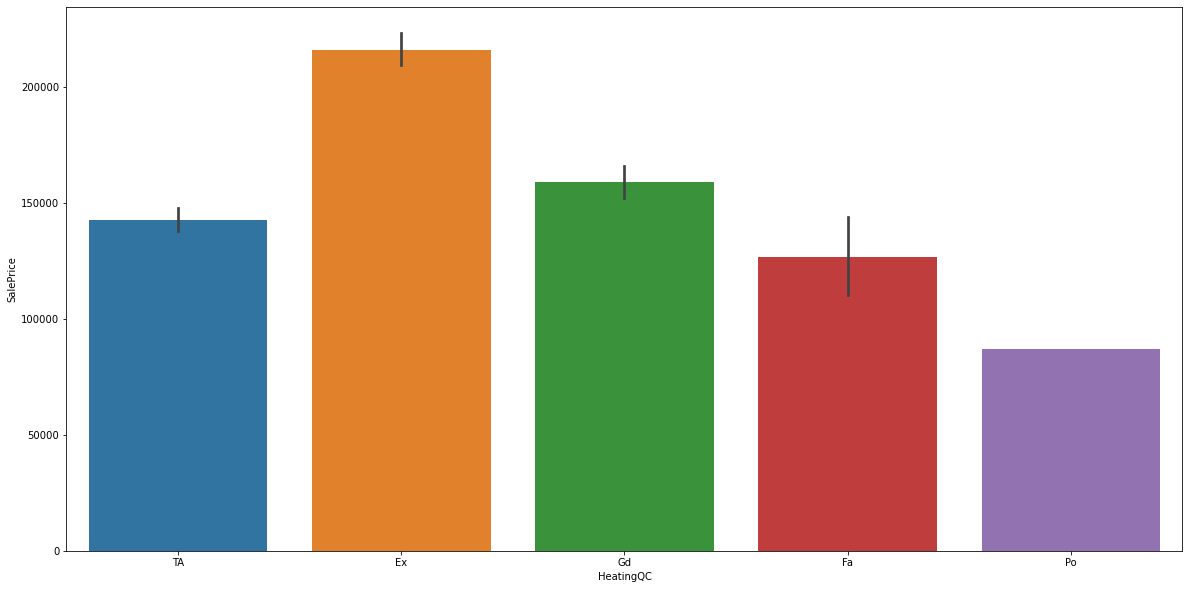

In [95]:
plt.figure(figsize=(20,10))
sns.barplot(x='HeatingQC',y=df1.SalePrice,data=df2)

# HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 Heating quality and condition is good then prices increase.

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

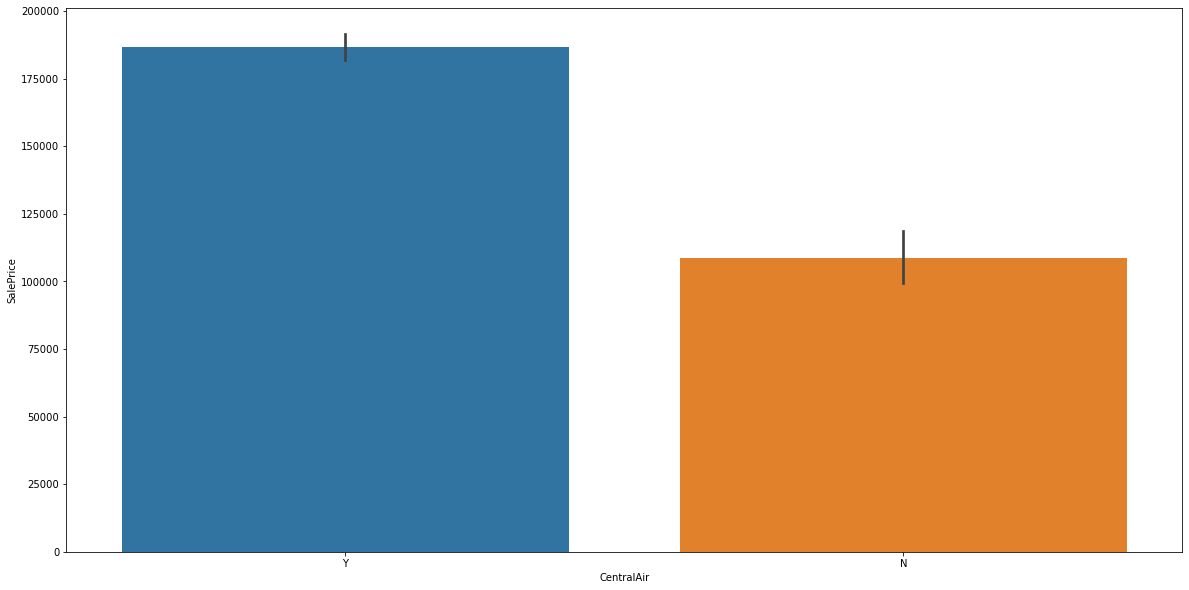

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(x='CentralAir',y=df1.SalePrice,data=df2)

# CentralAir: Central air conditioning

       N	No
       Y	Yes
If Central air conditioning is present in houses then prices are increase.

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

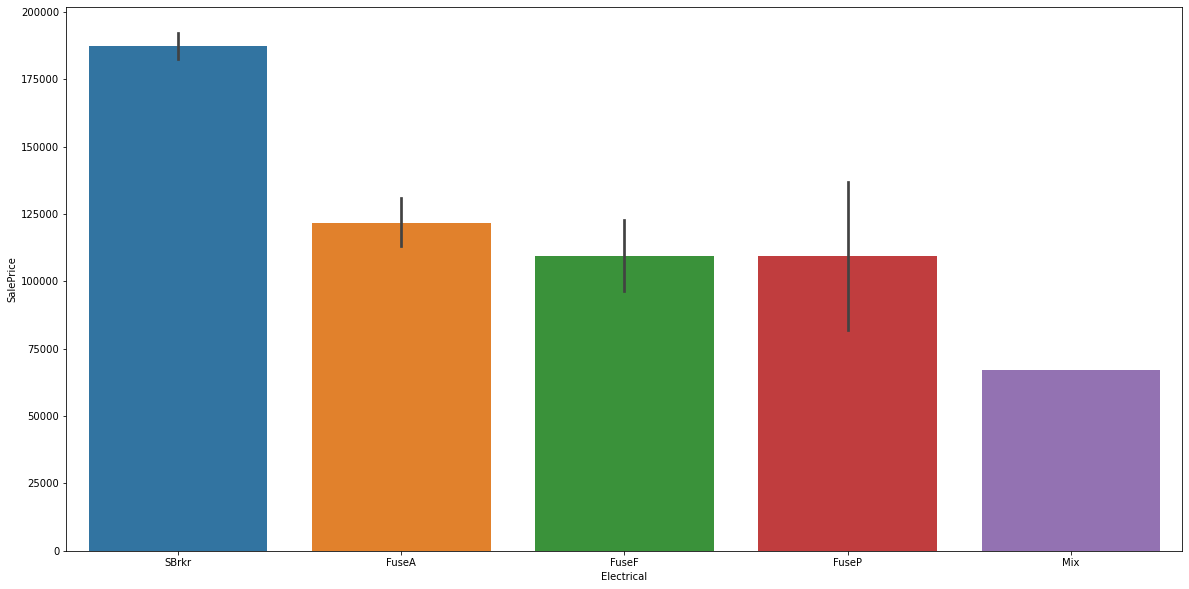

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(x='Electrical',y=df1.SalePrice,data=df2)

# Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
Electrical system is tandard Circuit Breakers & Romex type then prices are defenetly increase.

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

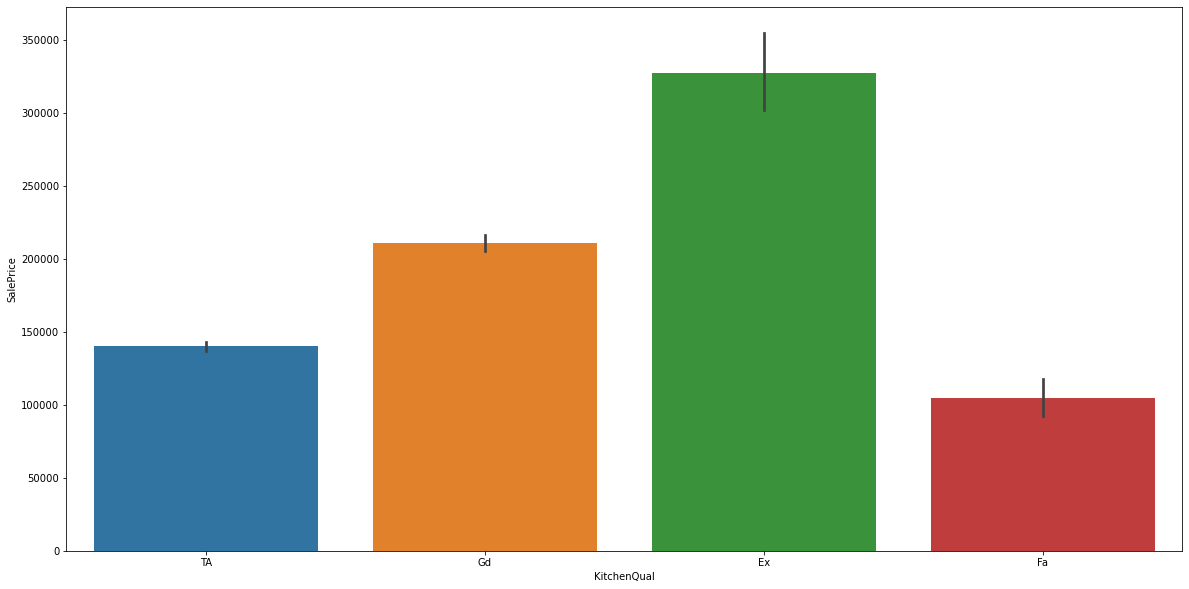

In [98]:
plt.figure(figsize=(20,10))
sns.barplot(x='KitchenQual',y=df1.SalePrice,data=df2)

# KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
If kitchen quality is excellent type then prices are increase.

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

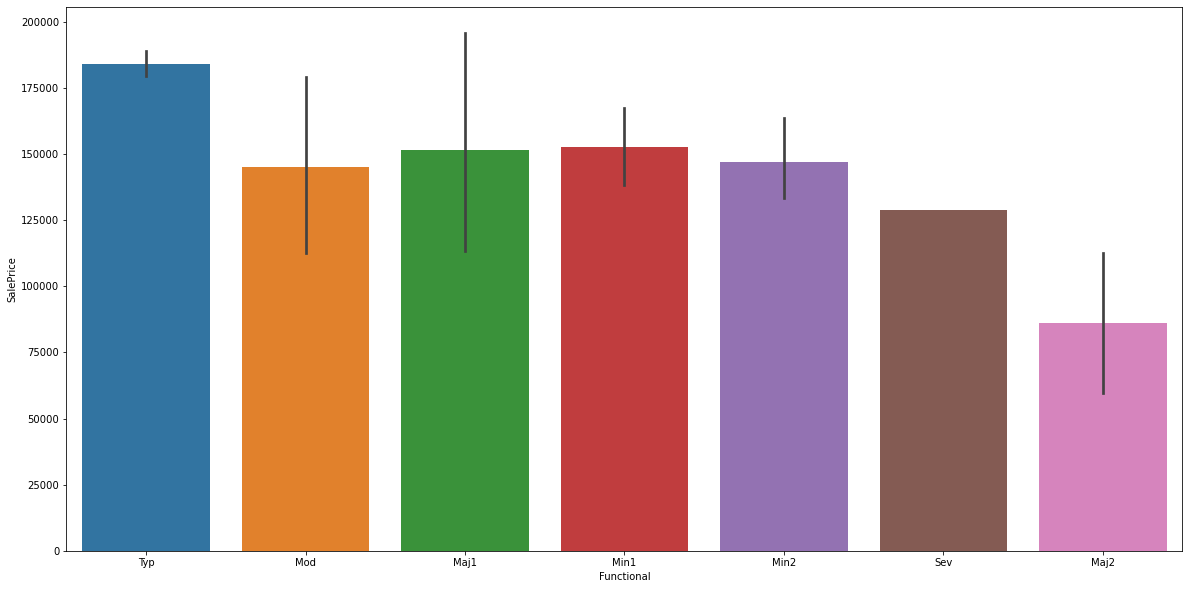

In [99]:
plt.figure(figsize=(20,10))
sns.barplot(x='Functional',y=df1.SalePrice,data=df2)

# Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
Home functionality (Assume typical unless deductions are warranted) are Typical Functionality then prices higher.

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

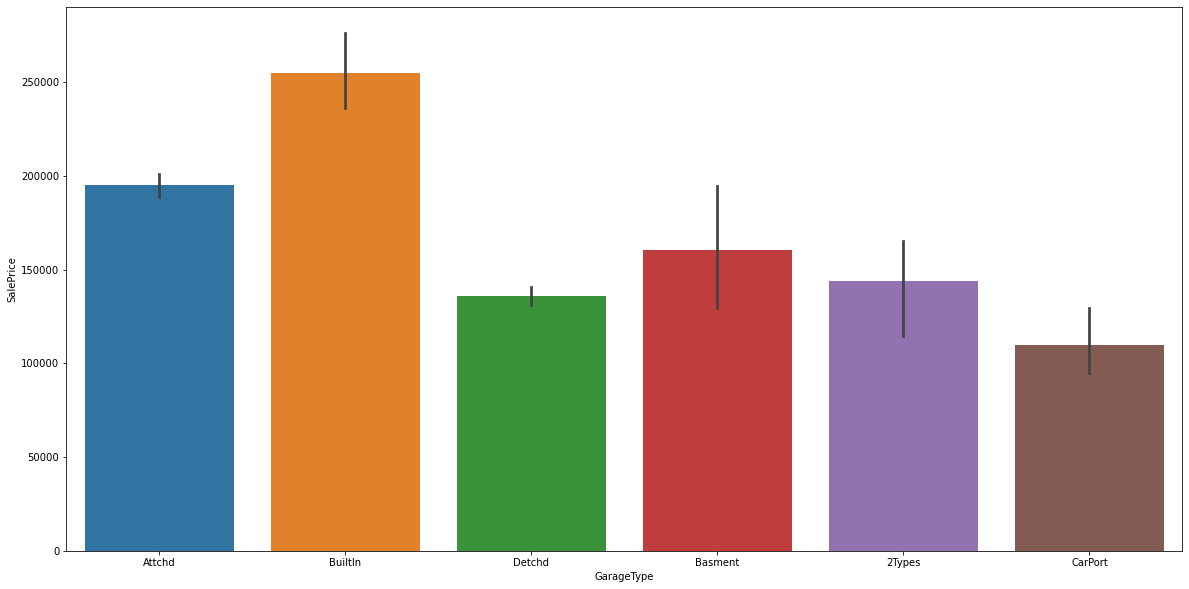

In [100]:
plt.figure(figsize=(20,10))
sns.barplot(x='GarageType',y=df1.SalePrice,data=df2)

# GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
If garage type is Built-In (Garage part of house - typically has room above garage) then prices are higher.

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

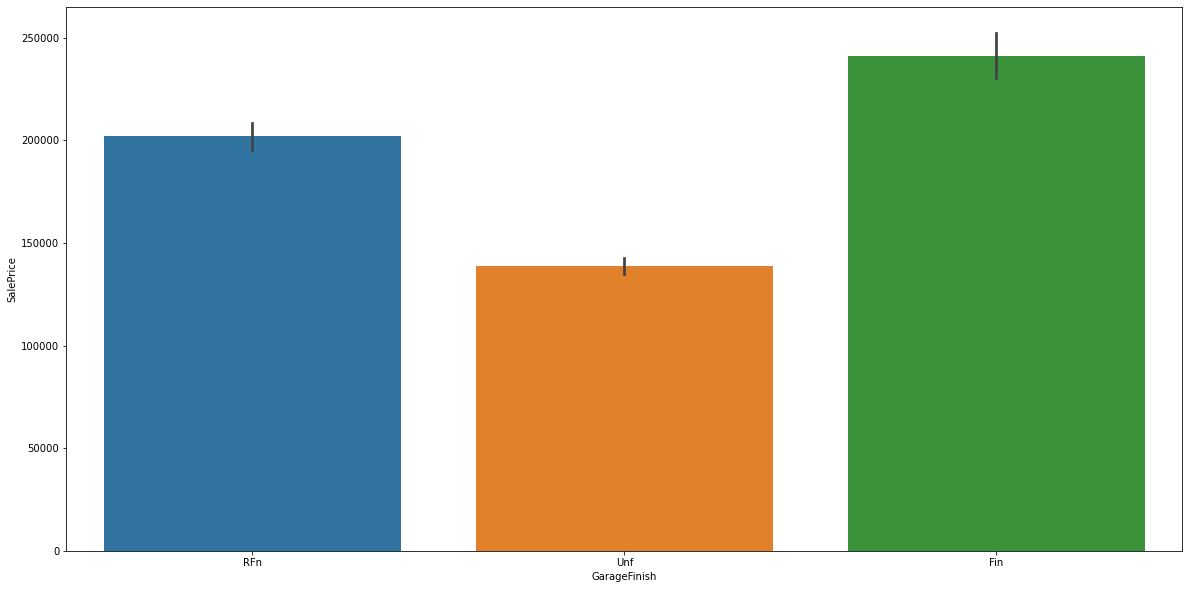

In [101]:
plt.figure(figsize=(20,10))
sns.barplot(x='GarageFinish',y=df1.SalePrice,data=df2)

# GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
If  Interior finish of the garage is Finished type then prices increase.

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

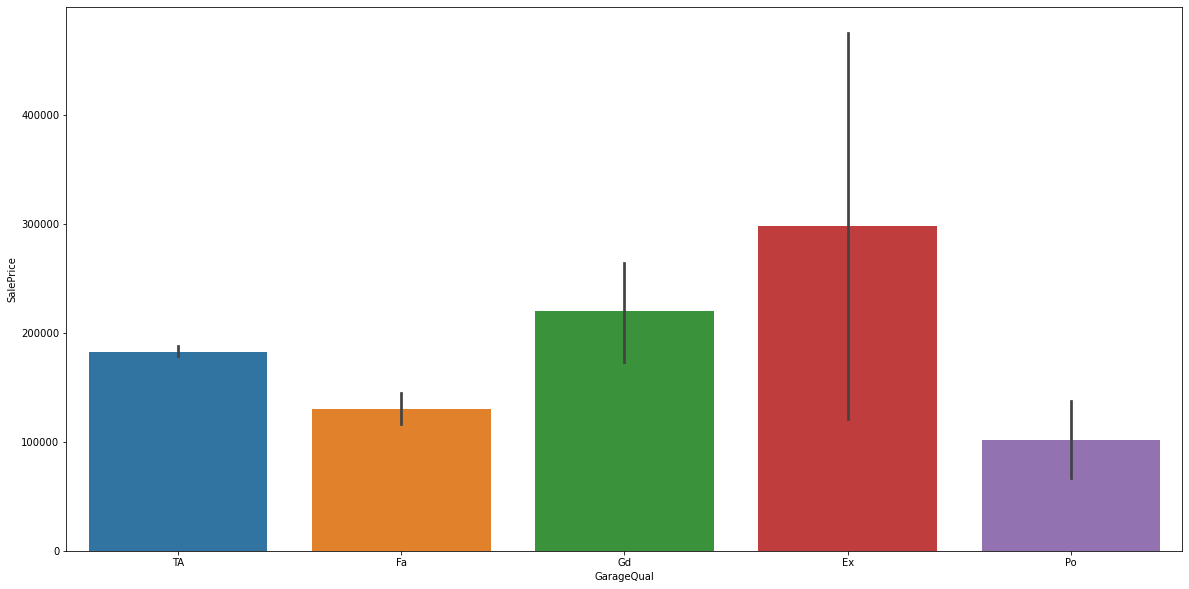

In [102]:
plt.figure(figsize=(20,10))
sns.barplot(x='GarageQual',y=df1.SalePrice,data=df2)

# GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
If  Garage quality type is excellent then prices are higher.

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

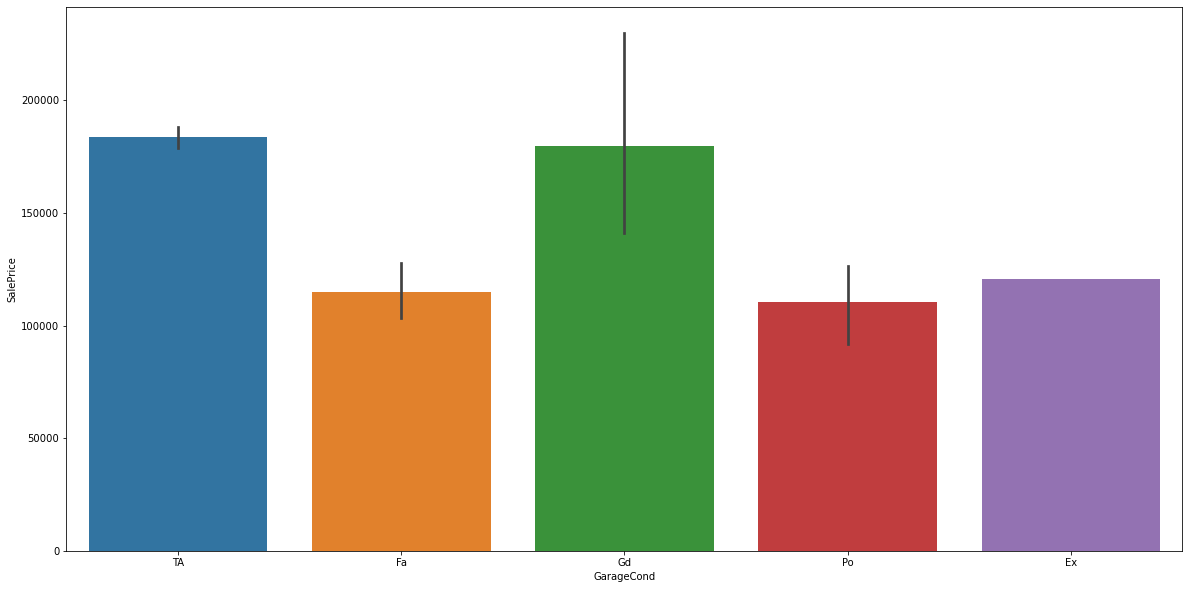

In [103]:
plt.figure(figsize=(20,10))
sns.barplot(x='GarageCond',y=df1.SalePrice,data=df2)

# GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
If garage condition in good situation then prices also increase.

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

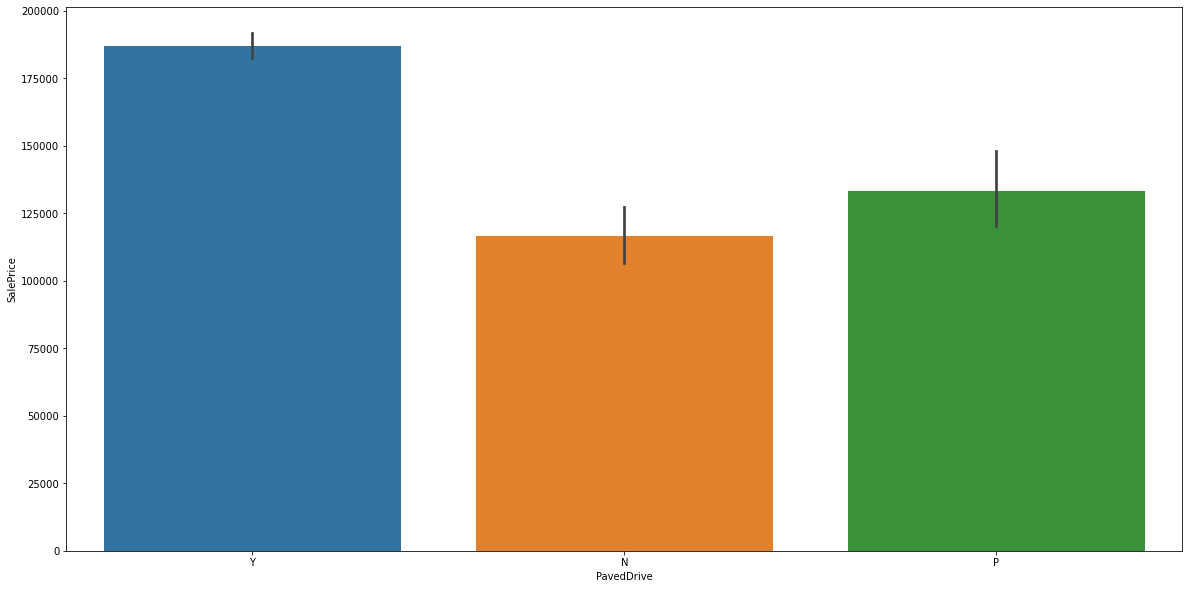

In [104]:
plt.figure(figsize=(20,10))
sns.barplot(x='PavedDrive',y=df1.SalePrice,data=df2)

# PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
If  Paved driveway is paved type then prices are increase.

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

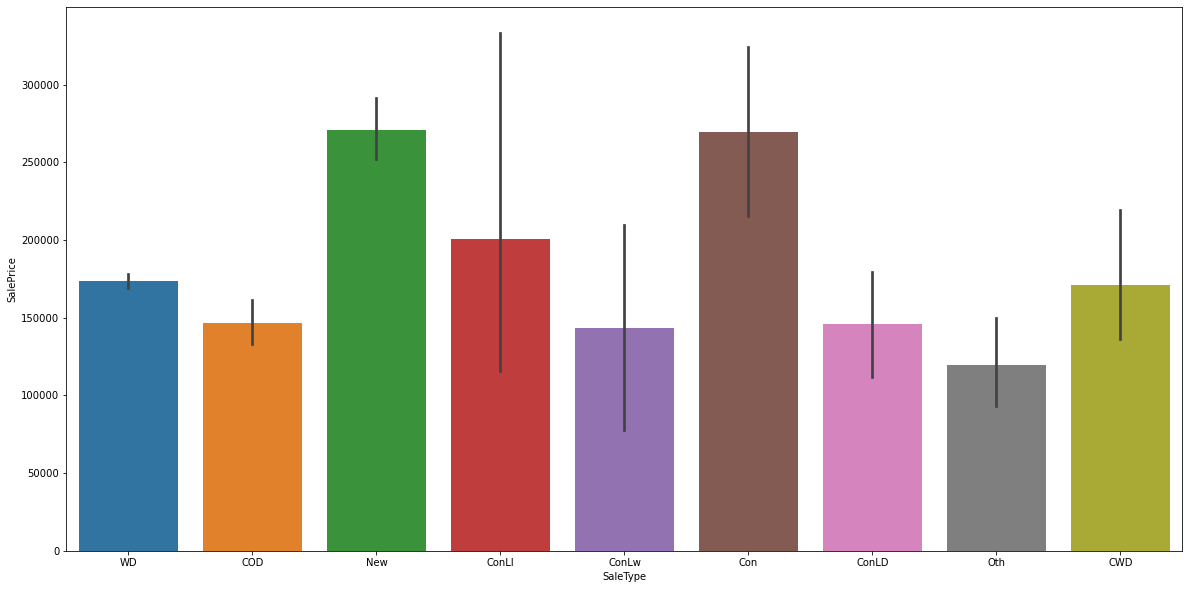

In [105]:
plt.figure(figsize=(20,10))
sns.barplot(x='SaleType',y=df1.SalePrice,data=df2)

# SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
If type of sale is Court Officer Deed/Estate and Home just constructed and sold then prices increase.

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

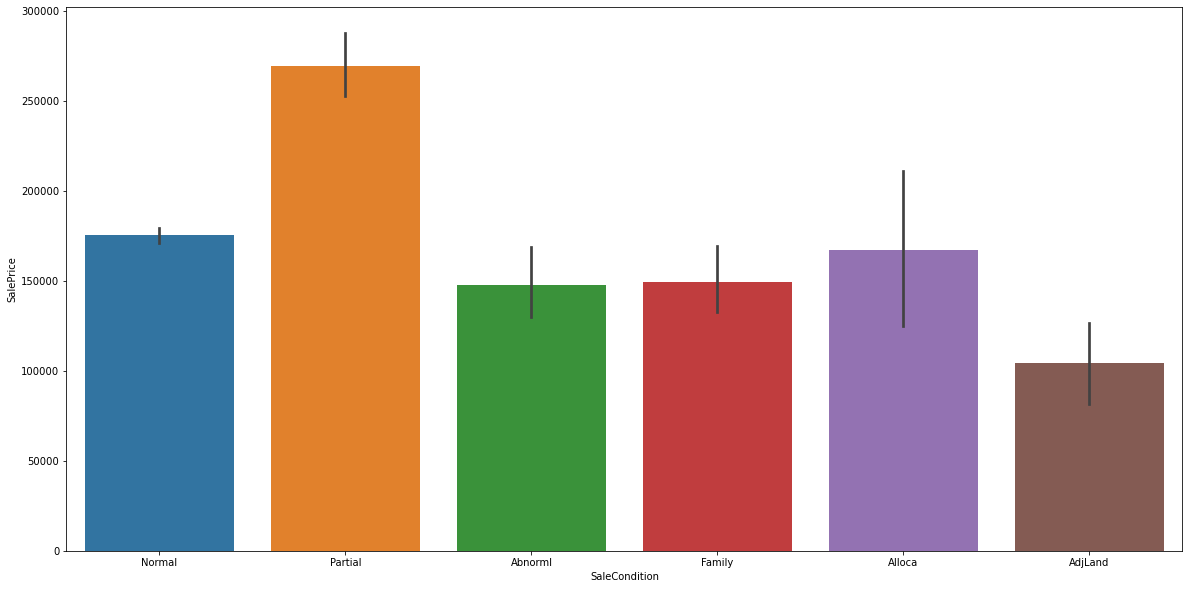

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(x='SaleCondition',y=df1.SalePrice,data=df2)

# SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
If condition of sale is Partial type then price increase.

# LABEL ENCODER METHOD

In [107]:
# change categorical to int type data
from sklearn.preprocessing import LabelEncoder

In [108]:
le=LabelEncoder()

In [109]:
for i in df2.columns:
    df2[i]=le.fit_transform(df2[i])

In [110]:
df2=df2.drop(['Utilities'],axis=1)
df2

MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0            3       1         0            3          4          0   
1            3       1         0            3          4          1   
2            3       1         0            3          1          0   
3            3       1         0            3          4          0   
4            3       1         0            3          2          0   
...        ...     ...       ...          ...        ...        ...   
1163         3       1         0            3          4          0   
1164         3       1         3            3          4          0   
1165         3       1         3            3          2          0   
1166         0       1         3            3          4          0   
1167         3       1         0            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0               13           2           2         4           2          1   
1               12           2           2         0           2          0   
2               15           2           2         0           5          1   
3               14           2           2         0           2          3   
4               14           2           2         0           2          1   
...            ...         ...         ...       ...         ...        ...   
1163            19           2           2         0           2          1   
1164             7           1           2         0           2          1   
1165            13           2           2         3           5          1   
1166             9           1           2         0           5          2   
1167             8           2           2         0           5          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0            1            8            9           2          3          4   
1            5           12           13           2          2          2   
2            1            7            7           2          2          4   
3            1            8            9           1          3          4   
4            1            4            4           3          2          4   
...        ...          ...          ...         ...        ...        ...   
1163         1            7            7           1          3          2   
1164         1           11           12           2          3          4   
1165         1            8            2           2          3          4   
1166         1            3            3           2          3          1   
1167         1           11           12           2          2          4   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0              1         2         3             3             0   
1              2         3         1             1             0   
2              2         2         3             0             2   
3              1         2         3             3             1   
4              1         2         3             3             0   
...          ...       ...       ...           ...           ...   
1163           1         3         3             3             1   
1164           1         3         3             3             5   
1165           1         2         3             3             0   
1166           0         3         3             3             5   
1167           2         2         3             3             2   

      BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0                5        1          4           1           4            3   
1                4        1          0           1           4            2   
2                5        1          0           1           4            3   
3                5        1          0           1           4            3   
4                5        1          2           1     

# Merge both dataset

In [111]:
df=pd.concat([df1,df2],axis=1)
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          120.0         70.0   4928.0          6.0          5.0     1976.0   
1           20.0         95.0  15865.0          8.0          6.0     1970.0   
2           60.0         92.0   9920.0          7.0          5.0     1996.0   
3           20.0        105.0  11751.0          6.0          6.0     1977.0   
4           20.0         70.0  16635.0          6.0          7.0     1977.0   
...          ...          ...      ...          ...          ...        ...   
1163        20.0         70.0   9819.0          5.0          5.0     1967.0   
1164        20.0         67.0   8777.0          4.0          5.0     1949.0   
1165       160.0         24.0   2280.0          6.0          6.0     1976.0   
1166        70.0         50.0   8500.0          4.0          4.0     1920.0   
1167        60.0         70.0   7861.0          6.0          5.0     2002.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           1976.0         0.0       120.0      958.0       1078.0     958.0   
1           1970.0         0.0       351.0     1043.0       2217.0    2217.0   
2           1997.0         0.0       862.0      255.0       1117.0    1127.0   
3           1977.0       480.0       705.0     1139.0       1844.0    1844.0   
4           2000.0       126.0      1246.0      356.0       1602.0    1602.0   
...            ...         ...         ...        ...          ...       ...   
1163        1967.0        31.0       450.0      432.0        882.0     900.0   
1164        2003.0         0.0         0.0        0.0          0.0    1126.0   
1165        1976.0         0.0       566.0      289.0        855.0     855.0   
1166        1950.0         0.0         0.0      649.0        649.0     649.0   
1167        2003.0         0.0       457.0      326.0        783.0     807.0   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          0.0      958.0           0.0       2.0       0.0           2.0   
1          0.0     2217.0           1.0       2.0       0.0           4.0   
2        886.0     2013.0           1.0       2.0       1.0           3.0   
3          0.0     1844.0           0.0       2.0       0.0           3.0   
4          0.0     1602.0           0.0       2.0       0.0           3.0   
...        ...        ...           ...       ...       ...           ...   
1163       0.0      900.0           0.0       1.0       0.0           3.0   
1164       0.0     1126.0           0.0       2.0       0.0           2.0   
1165     601.0     1456.0           0.0       2.0       1.0           3.0   
1166     668.0     1317.0           0.0       1.0       0.0           3.0   
1167     702.0     1509.0           1.0       2.0       1.0           3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         1.0       1977.0         2.0       440.0   
1              8.0         1.0       1970.0         2.0       621.0   
2              8.0         1.0       1997.0         2.0       455.0   
3              7.0         1.0       1977.0         2.0       546.0   
4              8.0         1.0       1977.0         2.0       529.0   
...            ...         ...          ...         ...         ...   
1163           5.0         0.0       1970.0         1.0       280.0   
1164           5.0         0.0       2002.0         2.0       520.0   
1165           7.0         1.0       1976.0         2.0       440.0   
1166           6.0         0.0       1920.0         1.0       250.0   
1167           7.0         1.0       2002.0         2.0       393.0   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  MSZoning  Street  \
0            0.0        205.0     2.0  2007.0   128000.0         3       1   
1           81.0        207.0    10.0  2007.0   268000.0         3       1   
2          180.0        130.0     6.0  2007.0   269790.0         3       1   
3     

# Describe Statistic of Dataset

In [112]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.807363   10484.749144     6.104452     5.595890   
std      41.940650    22.440317    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027   569.721747   
std      30.145255     20.785185   182.218483   462.664785   449.375525   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000   216.000000   
50%    1972.000000   1993.000000     0.000000   385.500000   474.000000   
75%    2000.000000   2004.000000   160.000000   714.500000   816.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean   1061.095034  1169.860445   348.826199  1525.066781      0.425514   
std     442.272249   391.161983   439.696370   528.042957      0.521615   
min       0.000000   334.000000     0.000000   334.000000      0.000000   
25%     799.000000   892.000000     0.000000  1143.250000      0.000000   
50%    1005.500000  1096.500000     0.000000  1468.500000      0.000000   
75%    1291.500000  1392.000000   729.000000  1795.000000      1.000000   
max    6110.000000  4692.000000  2065.000000  5642.000000      3.000000   

          FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean      1.562500     0.388699      2.884418      6.542808     0.617295   
std       0.551882     0.504929      0.817229      1.598484     0.650575   
min       0.000000     0.000000      0.000000      2.000000     0.000000   
25%       1.000000     0.000000      2.000000      5.000000     0.000000   
50%       2.000000     0.000000      3.000000      6.000000     1.000000   
75%       2.000000     1.000000      3.000000      7.000000     1.000000   
max       3.000000     2.000000      8.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.292808     1.776541   476.860445    96.206336    46.559932   
std      24.202053     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2001.000000     2.000000   576.000000   171.000000    70.000000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

            MoSold       YrSold      SalePrice     MSZoning       Street  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean      6.344178  2007.804795  181477.005993     3.013699     0.996575   
std       2.686352     1.329738   79105.586863     0.633120     0.058445   
min       1.000000  2006.000000   34900.000000     0.000000     0.000000   
25%       5.000000  2007.000000  130375.000000     3.000000     1.000000   
50%       6.000000  2008.000000  163995.000000     3.000000     1.000000   
75%       8.000000  2009.000000  215000.000000     3.000000     1.000000   
max      12

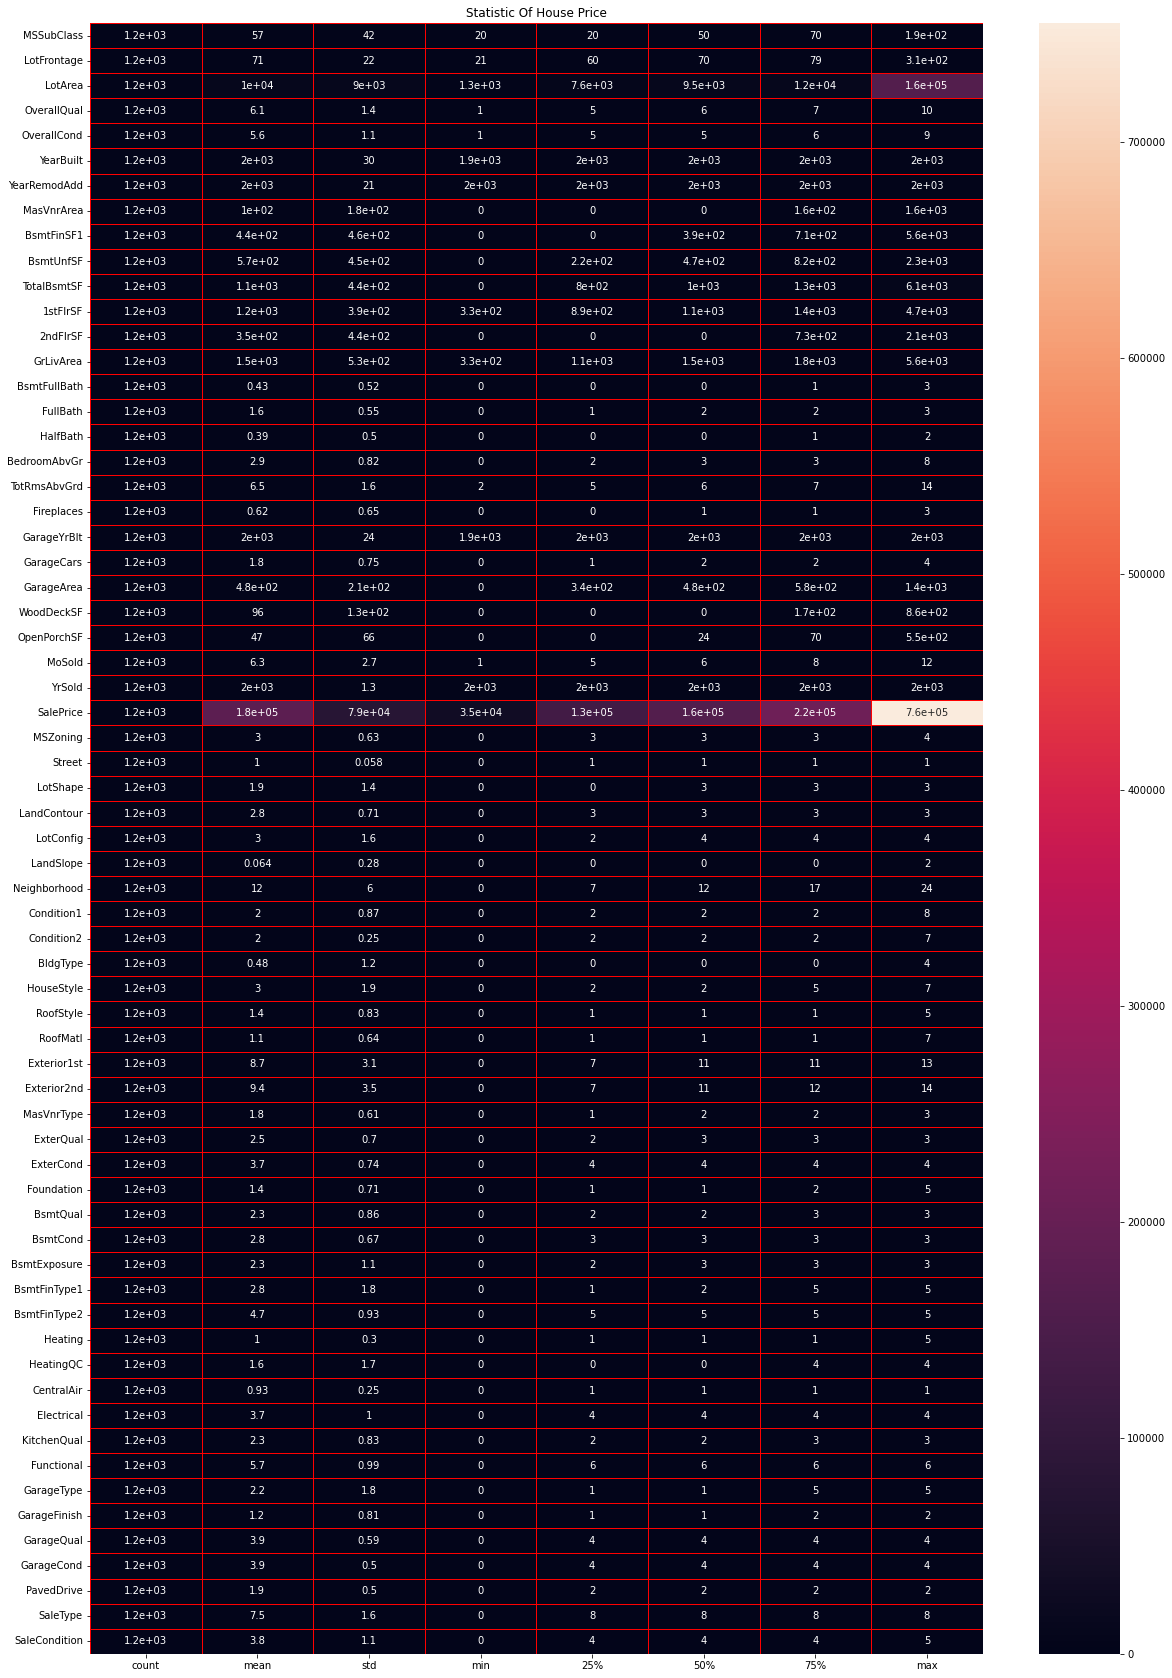

In [113]:
# For better understand plot heatmap of statistic
plt.figure(figsize=(20,30))
sns.heatmap(df.describe().T,linewidth=1,linecolor='red',annot=True)
plt.title('Statistic Of House Price')
plt.savefig('Statistic Of House Price')
plt.show()

# Check ouliers

In [114]:
col=df.columns
ncol=8
nrow=10

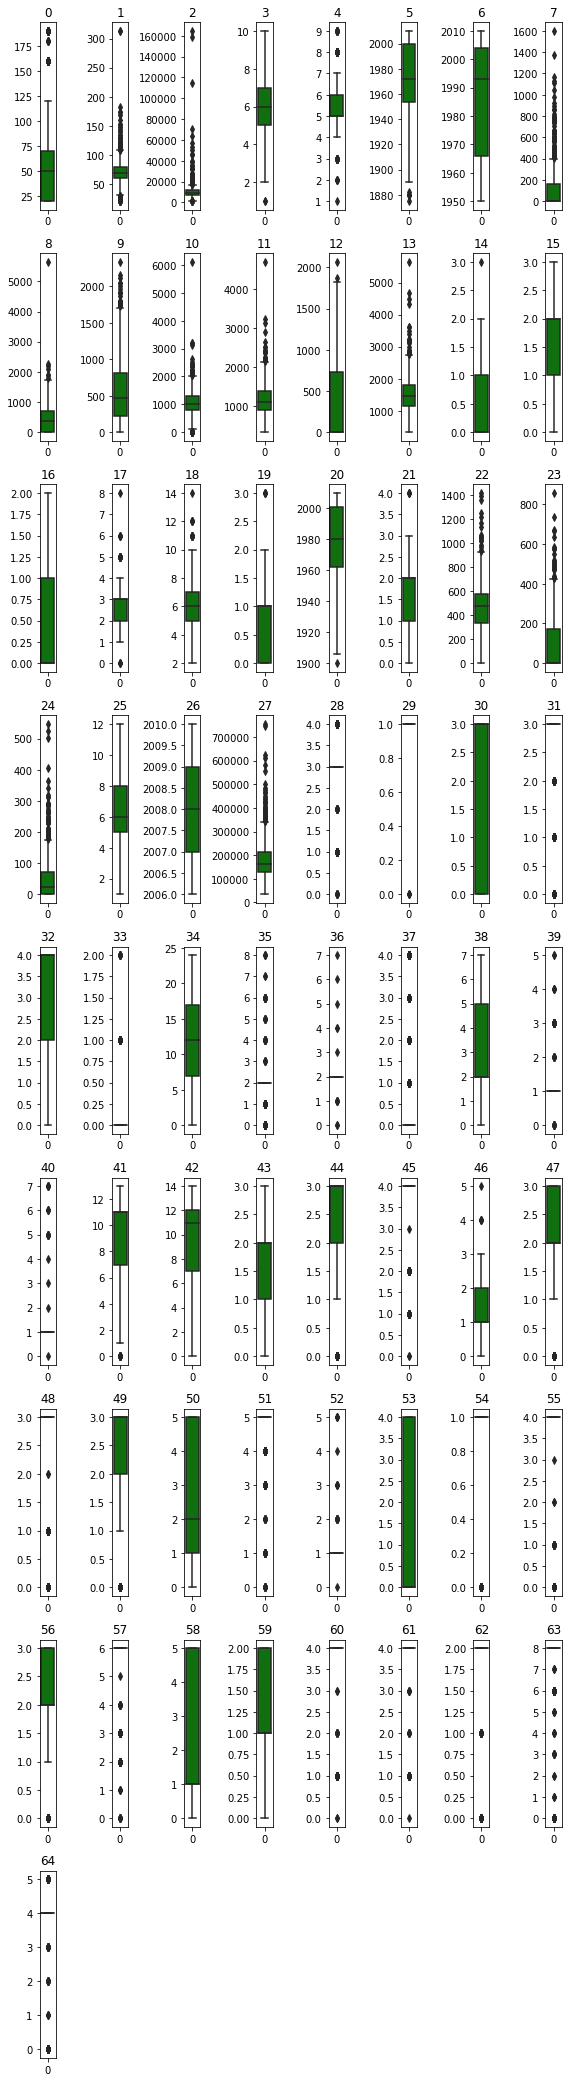

In [115]:
plt.figure(figsize=(ncol,4*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.savefig('Outliers Of House Price')
    plt.tight_layout()

# Check Correlation 

In [116]:
df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336234 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336234     1.000000  0.296790     0.229981    -0.047851   
LotArea         -0.124151     0.296790  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229981  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047851  0.017513    -0.083167     1.000000   
...                   ...          ...       ...          ...          ...   
GarageQual      -0.010568     0.040542  0.005999     0.087942    -0.097995   
GarageCond      -0.025595     0.043306  0.035657     0.136538    -0.018855   
PavedDrive      -0.068702     0.091761  0.021907     0.215985    -0.051785   
SaleType         0.035050    -0.036081  0.005421    -0.049794     0.102515   
SaleCondition   -0.028981     0.065439  0.034236     0.212932     0.023908   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
MSSubClass      0.023988      0.056618    0.028215   -0.052236  -0.134170   
LotFrontage     0.112000      0.089513    0.188273    0.227732   0.115628   
LotArea         0.005506      0.027228    0.120192    0.221851   0.006600   
OverallQual     0.575800      0.555945    0.403985    0.219643   0.308676   
OverallCond    -0.377731      0.080669   -0.135133   -0.028810  -0.146384   
...                  ...           ...         ...         ...        ...   
GarageQual      0.310174      0.126729    0.104012    0.125867  -0.068539   
GarageCond      0.250379      0.167539    0.070817    0.095628  -0.001828   
PavedDrive      0.426199      0.180113    0.148483    0.181905   0.000731   
SaleType       -0.062720      0.020832   -0.050518    0.003215  -0.082827   
SaleCondition   0.212597      0.227400    0.097392    0.037788   0.100695   

               TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
MSSubClass       -0.214042 -0.227927  0.300366   0.086448      0.004556   
LotFrontage       0.356180  0.402864  0.089816   0.374000      0.092807   
LotArea           0.259733  0.312843  0.059803   0.281360      0.142387   
OverallQual       0.528285  0.458758  0.316624   0.599700      0.101732   
OverallCond      -0.162481 -0.134420  0.036668  -0.065006     -0.039680   
...                    ...       ...       ...        ...           ...   
GarageQual        0.078206  0.073616 -0.080952  -0.017719      0.075945   
GarageCond        0.100621  0.105931 -0.037191   0.045271      0.048327   
PavedDrive        0.212942  0.167843 -0.056069   0.069744      0.103965   
SaleType         -0.095278 -0.118742  0.057849  -0.038372      0.035018   
SaleCondition     0.127698  0.083643  0.021737   0.071655      0.027899   

               FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
MSSubClass     0.140807  0.168423     -0.013283      0.051179   -0.035792   
LotFrontage    0.171842  0.047149      0.236946      0.318941    0.228494   
LotArea        0.123197  0.007271      0.117351      0.184546    0.285983   
OverallQual    0.548824  0.296134      0.099639      0.432579    0.390067   
OverallCond   -0.171931 -0.052125      0.028393     -0.039952   -0.013632   
...                 ...       ...           ...           ...         ...   
GarageQual     0.101672  0.014076     -0.007468     -0.033573    0.028837   
GarageCond     0.110670  0.063243     -0.011904     -0.004570    0.091336   
PavedDrive     0.133607  0.096258     -0.037113     -0.011941    0.135304   
SaleType      -0.034516  0.027820      0.037473     -0.039817    0.014796   
SaleCondition  0.136637  0.070111     -0.040734      0.052806    0.139351   

               GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
MSSubClass        0.074640   -0.027639   -0.092408   -0.022609     0.017468   
LotFrontage       0.054459    0.260224    0.322750    0.087267     0.151044   
LotArea          -0.036133    0.158313    0.195162    0.216720     0.093080   
OverallQual

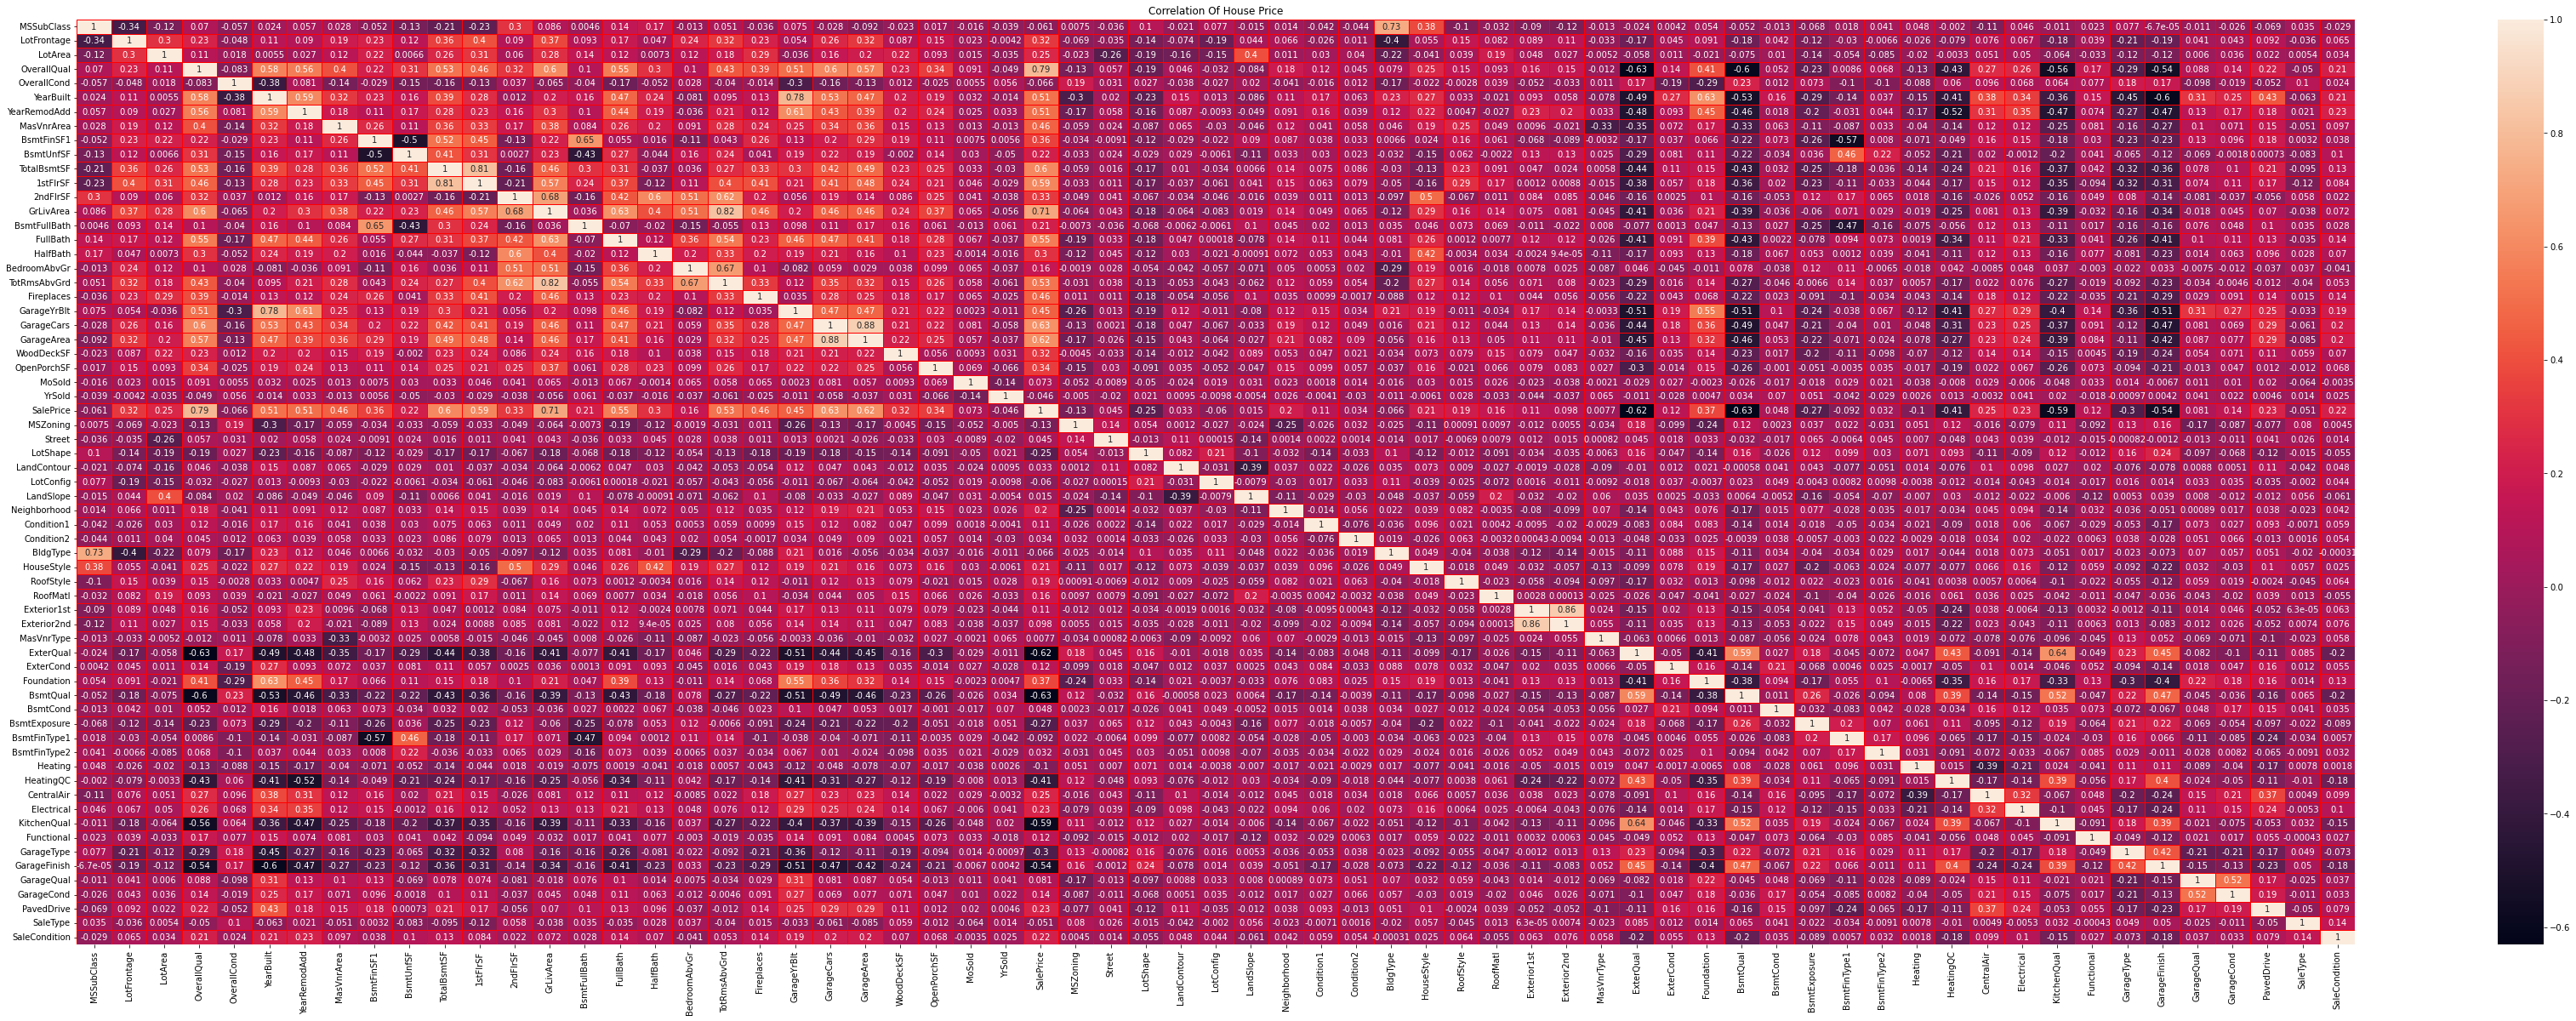

In [117]:
# For better understand plot heatmap of statistic
plt.figure(figsize=(60,20))
sns.heatmap(df.corr(),linewidth=1,linecolor='red',annot=True)
plt.title('Correlation Of House Price')
plt.savefig('Correlation Of House Price')
plt.show()

In [118]:
df.corr()['SalePrice'][0:35].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
YearRemodAdd    0.507831
MasVnrArea      0.460535
Fireplaces      0.459611
GarageYrBlt     0.453840
BsmtFinSF1      0.362874
OpenPorchSF     0.339500
2ndFlrSF        0.330386
LotFrontage     0.323851
WoodDeckSF      0.315444
HalfBath        0.295592
LotArea         0.249499
BsmtUnfSF       0.215724
BsmtFullBath    0.212924
Neighborhood    0.198942
BedroomAbvGr    0.158281
MoSold          0.072764
Street          0.044753
LandContour     0.032836
LandSlope       0.015485
YrSold         -0.045508
LotConfig      -0.060452
MSSubClass     -0.060775
OverallCond    -0.065642
MSZoning       -0.133221
LotShape       -0.248171
Name: SalePrice, dtype: float64

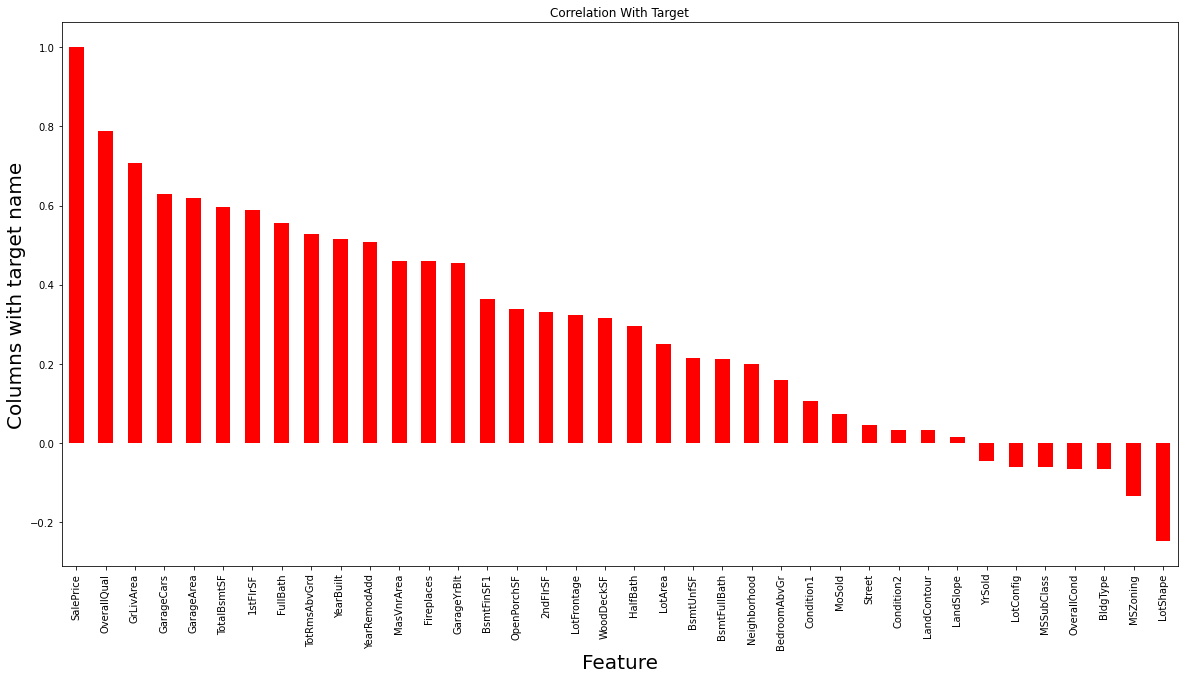

In [119]:
plt.figure(figsize=(20,10))
df.corr()['SalePrice'][0:38].sort_values(ascending=False).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Columns with target name',fontsize=20)
plt.title('Correlation With Target')
plt.show()

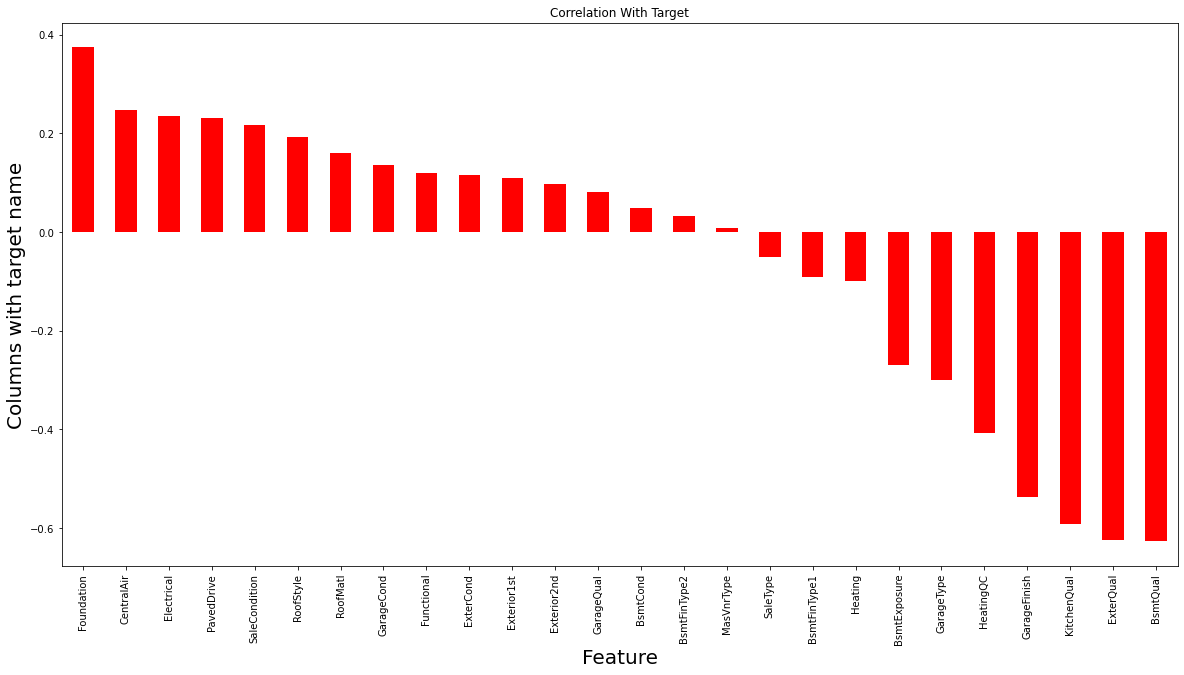

In [120]:
plt.figure(figsize=(20,10))
df.corr()['SalePrice'][39:76].sort_values(ascending=False).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Columns with target name',fontsize=20)
plt.title('Correlation With Target')
plt.show()

Sale price highly correlated with OVELALLQUAL in positive direction and in negative direction with EXTERQUAL and BSMTQUAL

Utility is not correlated with target saleprice in any manner so we drop it

# CHECK OUTLIERS IN DATASET

In [121]:
# import outliers laibary
from scipy.stats import zscore

In [122]:
(np.abs(zscore(df))<3).all().all()

False

Outliers are present in Our dataset

In [123]:
# check outliers in each columns
(np.abs(zscore(df))<3).all()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
                 ...  
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
Length: 65, dtype: bool

We not apply any transform method on target and categorical dataset so we analyse on numerical dataset

In [124]:
df2['SalePrice']=df1['SalePrice']   #put target variable into categorical values

In [125]:
df1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          120.0         70.0   4928.0          6.0          5.0     1976.0   
1           20.0         95.0  15865.0          8.0          6.0     1970.0   
2           60.0         92.0   9920.0          7.0          5.0     1996.0   
3           20.0        105.0  11751.0          6.0          6.0     1977.0   
4           20.0         70.0  16635.0          6.0          7.0     1977.0   
...          ...          ...      ...          ...          ...        ...   
1163        20.0         70.0   9819.0          5.0          5.0     1967.0   
1164        20.0         67.0   8777.0          4.0          5.0     1949.0   
1165       160.0         24.0   2280.0          6.0          6.0     1976.0   
1166        70.0         50.0   8500.0          4.0          4.0     1920.0   
1167        60.0         70.0   7861.0          6.0          5.0     2002.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           1976.0         0.0       120.0      958.0       1078.0     958.0   
1           1970.0         0.0       351.0     1043.0       2217.0    2217.0   
2           1997.0         0.0       862.0      255.0       1117.0    1127.0   
3           1977.0       480.0       705.0     1139.0       1844.0    1844.0   
4           2000.0       126.0      1246.0      356.0       1602.0    1602.0   
...            ...         ...         ...        ...          ...       ...   
1163        1967.0        31.0       450.0      432.0        882.0     900.0   
1164        2003.0         0.0         0.0        0.0          0.0    1126.0   
1165        1976.0         0.0       566.0      289.0        855.0     855.0   
1166        1950.0         0.0         0.0      649.0        649.0     649.0   
1167        2003.0         0.0       457.0      326.0        783.0     807.0   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          0.0      958.0           0.0       2.0       0.0           2.0   
1          0.0     2217.0           1.0       2.0       0.0           4.0   
2        886.0     2013.0           1.0       2.0       1.0           3.0   
3          0.0     1844.0           0.0       2.0       0.0           3.0   
4          0.0     1602.0           0.0       2.0       0.0           3.0   
...        ...        ...           ...       ...       ...           ...   
1163       0.0      900.0           0.0       1.0       0.0           3.0   
1164       0.0     1126.0           0.0       2.0       0.0           2.0   
1165     601.0     1456.0           0.0       2.0       1.0           3.0   
1166     668.0     1317.0           0.0       1.0       0.0           3.0   
1167     702.0     1509.0           1.0       2.0       1.0           3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         1.0       1977.0         2.0       440.0   
1              8.0         1.0       1970.0         2.0       621.0   
2              8.0         1.0       1997.0         2.0       455.0   
3              7.0         1.0       1977.0         2.0       546.0   
4              8.0         1.0       1977.0         2.0       529.0   
...            ...         ...          ...         ...         ...   
1163           5.0         0.0       1970.0         1.0       280.0   
1164           5.0         0.0       2002.0         2.0       520.0   
1165           7.0         1.0       1976.0         2.0       440.0   
1166           6.0         0.0       1920.0         1.0       250.0   
1167           7.0         1.0       2002.0         2.0       393.0   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  
0            0.0        205.0     2.0  2007.0   128000.0  
1           81.0        207.0    10.0  2007.0   268000.0  
2          180.0        130.0     6.0  2007.0   269790.0  
3            0.0        122.0     1.0  2010.0   190000.0  
4          240.0       

In [126]:
df1=df1.drop(['SalePrice'],axis=1)

In [127]:
df1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          120.0         70.0   4928.0          6.0          5.0     1976.0   
1           20.0         95.0  15865.0          8.0          6.0     1970.0   
2           60.0         92.0   9920.0          7.0          5.0     1996.0   
3           20.0        105.0  11751.0          6.0          6.0     1977.0   
4           20.0         70.0  16635.0          6.0          7.0     1977.0   
...          ...          ...      ...          ...          ...        ...   
1163        20.0         70.0   9819.0          5.0          5.0     1967.0   
1164        20.0         67.0   8777.0          4.0          5.0     1949.0   
1165       160.0         24.0   2280.0          6.0          6.0     1976.0   
1166        70.0         50.0   8500.0          4.0          4.0     1920.0   
1167        60.0         70.0   7861.0          6.0          5.0     2002.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           1976.0         0.0       120.0      958.0       1078.0     958.0   
1           1970.0         0.0       351.0     1043.0       2217.0    2217.0   
2           1997.0         0.0       862.0      255.0       1117.0    1127.0   
3           1977.0       480.0       705.0     1139.0       1844.0    1844.0   
4           2000.0       126.0      1246.0      356.0       1602.0    1602.0   
...            ...         ...         ...        ...          ...       ...   
1163        1967.0        31.0       450.0      432.0        882.0     900.0   
1164        2003.0         0.0         0.0        0.0          0.0    1126.0   
1165        1976.0         0.0       566.0      289.0        855.0     855.0   
1166        1950.0         0.0         0.0      649.0        649.0     649.0   
1167        2003.0         0.0       457.0      326.0        783.0     807.0   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          0.0      958.0           0.0       2.0       0.0           2.0   
1          0.0     2217.0           1.0       2.0       0.0           4.0   
2        886.0     2013.0           1.0       2.0       1.0           3.0   
3          0.0     1844.0           0.0       2.0       0.0           3.0   
4          0.0     1602.0           0.0       2.0       0.0           3.0   
...        ...        ...           ...       ...       ...           ...   
1163       0.0      900.0           0.0       1.0       0.0           3.0   
1164       0.0     1126.0           0.0       2.0       0.0           2.0   
1165     601.0     1456.0           0.0       2.0       1.0           3.0   
1166     668.0     1317.0           0.0       1.0       0.0           3.0   
1167     702.0     1509.0           1.0       2.0       1.0           3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         1.0       1977.0         2.0       440.0   
1              8.0         1.0       1970.0         2.0       621.0   
2              8.0         1.0       1997.0         2.0       455.0   
3              7.0         1.0       1977.0         2.0       546.0   
4              8.0         1.0       1977.0         2.0       529.0   
...            ...         ...          ...         ...         ...   
1163           5.0         0.0       1970.0         1.0       280.0   
1164           5.0         0.0       2002.0         2.0       520.0   
1165           7.0         1.0       1976.0         2.0       440.0   
1166           6.0         0.0       1920.0         1.0       250.0   
1167           7.0         1.0       2002.0         2.0       393.0   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  
0            0.0        205.0     2.0  2007.0  
1           81.0        207.0    10.0  2007.0  
2          180.0        130.0     6.0  2007.0  
3            0.0        122.0     1.0  2010.0  
4          240.0          0.0     6.0  2009.0  
...          ...          ... 

In [128]:
# Check outliers in numerical daatset
(np.abs(zscore(df1))<3).all()

MSSubClass      False
LotFrontage     False
LotArea         False
OverallQual     False
OverallCond     False
YearBuilt       False
YearRemodAdd     True
MasVnrArea      False
BsmtFinSF1      False
BsmtUnfSF       False
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
GrLivArea       False
BsmtFullBath    False
FullBath         True
HalfBath        False
BedroomAbvGr    False
TotRmsAbvGrd    False
Fireplaces      False
GarageYrBlt     False
GarageCars       True
GarageArea      False
WoodDeckSF      False
OpenPorchSF     False
MoSold           True
YrSold           True
dtype: bool

Outliers are present in many variable,so we use iqr method for removing outliers from dataset

# IQR METHOD

In [129]:
q1=df1.quantile(0.25)
q1

MSSubClass        20.00
LotFrontage       60.00
LotArea         7621.50
OverallQual        5.00
OverallCond        5.00
YearBuilt       1954.00
YearRemodAdd    1966.00
MasVnrArea         0.00
BsmtFinSF1         0.00
BsmtUnfSF        216.00
TotalBsmtSF      799.00
1stFlrSF         892.00
2ndFlrSF           0.00
GrLivArea       1143.25
BsmtFullBath       0.00
FullBath           1.00
HalfBath           0.00
BedroomAbvGr       2.00
TotRmsAbvGrd       5.00
Fireplaces         0.00
GarageYrBlt     1962.00
GarageCars         1.00
GarageArea       338.00
WoodDeckSF         0.00
OpenPorchSF        0.00
MoSold             5.00
YrSold          2007.00
Name: 0.25, dtype: float64

In [130]:
q2=df1.quantile(0.75)
q2

MSSubClass         70.00
LotFrontage        79.25
LotArea         11515.50
OverallQual         7.00
OverallCond         6.00
YearBuilt        2000.00
YearRemodAdd     2004.00
MasVnrArea        160.00
BsmtFinSF1        714.50
BsmtUnfSF         816.00
TotalBsmtSF      1291.50
1stFlrSF         1392.00
2ndFlrSF          729.00
GrLivArea        1795.00
BsmtFullBath        1.00
FullBath            2.00
HalfBath            1.00
BedroomAbvGr        3.00
TotRmsAbvGrd        7.00
Fireplaces          1.00
GarageYrBlt      2001.00
GarageCars          2.00
GarageArea        576.00
WoodDeckSF        171.00
OpenPorchSF        70.00
MoSold              8.00
YrSold           2009.00
Name: 0.75, dtype: float64

In [131]:
iqr=q2-q1
iqr

MSSubClass        50.00
LotFrontage       19.25
LotArea         3894.00
OverallQual        2.00
OverallCond        1.00
YearBuilt         46.00
YearRemodAdd      38.00
MasVnrArea       160.00
BsmtFinSF1       714.50
BsmtUnfSF        600.00
TotalBsmtSF      492.50
1stFlrSF         500.00
2ndFlrSF         729.00
GrLivArea        651.75
BsmtFullBath       1.00
FullBath           1.00
HalfBath           1.00
BedroomAbvGr       1.00
TotRmsAbvGrd       2.00
Fireplaces         1.00
GarageYrBlt       39.00
GarageCars         1.00
GarageArea       238.00
WoodDeckSF       171.00
OpenPorchSF       70.00
MoSold             3.00
YrSold             2.00
dtype: float64

In [132]:
upper=q2+(iqr*1.5)
lower=q1-(iqr*1.5)

In [133]:
df1=df1[(df1>lower) & (df1<upper)]
df1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          120.0         70.0   4928.0          6.0          5.0     1976.0   
1           20.0         95.0  15865.0          8.0          6.0     1970.0   
2           60.0         92.0   9920.0          7.0          5.0     1996.0   
3           20.0        105.0  11751.0          6.0          6.0     1977.0   
4           20.0         70.0  16635.0          6.0          7.0     1977.0   
...          ...          ...      ...          ...          ...        ...   
1163        20.0         70.0   9819.0          5.0          5.0     1967.0   
1164        20.0         67.0   8777.0          4.0          5.0     1949.0   
1165         NaN          NaN   2280.0          6.0          6.0     1976.0   
1166        70.0         50.0   8500.0          4.0          4.0     1920.0   
1167        60.0         70.0   7861.0          6.0          5.0     2002.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           1976.0         0.0       120.0      958.0       1078.0     958.0   
1           1970.0         0.0       351.0     1043.0          NaN       NaN   
2           1997.0         0.0       862.0      255.0       1117.0    1127.0   
3           1977.0         NaN       705.0     1139.0       1844.0    1844.0   
4           2000.0       126.0      1246.0      356.0       1602.0    1602.0   
...            ...         ...         ...        ...          ...       ...   
1163        1967.0        31.0       450.0      432.0        882.0     900.0   
1164        2003.0         0.0         0.0        0.0          NaN    1126.0   
1165        1976.0         0.0       566.0      289.0        855.0     855.0   
1166        1950.0         0.0         0.0      649.0        649.0     649.0   
1167        2003.0         0.0       457.0      326.0        783.0     807.0   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          0.0      958.0           0.0       2.0       0.0           2.0   
1          0.0     2217.0           1.0       2.0       0.0           4.0   
2        886.0     2013.0           1.0       2.0       1.0           3.0   
3          0.0     1844.0           0.0       2.0       0.0           3.0   
4          0.0     1602.0           0.0       2.0       0.0           3.0   
...        ...        ...           ...       ...       ...           ...   
1163       0.0      900.0           0.0       1.0       0.0           3.0   
1164       0.0     1126.0           0.0       2.0       0.0           2.0   
1165     601.0     1456.0           0.0       2.0       1.0           3.0   
1166     668.0     1317.0           0.0       1.0       0.0           3.0   
1167     702.0     1509.0           1.0       2.0       1.0           3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         1.0       1977.0         2.0       440.0   
1              8.0         1.0       1970.0         2.0       621.0   
2              8.0         1.0       1997.0         2.0       455.0   
3              7.0         1.0       1977.0         2.0       546.0   
4              8.0         1.0       1977.0         2.0       529.0   
...            ...         ...          ...         ...         ...   
1163           5.0         0.0       1970.0         1.0       280.0   
1164           5.0         0.0       2002.0         2.0       520.0   
1165           7.0         1.0       1976.0         2.0       440.0   
1166           6.0         0.0       1920.0         1.0       250.0   
1167           7.0         1.0       2002.0         2.0       393.0   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  
0            0.0          NaN     2.0  2007.0  
1           81.0          NaN    10.0  2007.0  
2          180.0        130.0     6.0  2007.0  
3            0.0        122.0     1.0  2010.0  
4          240.0          0.0     6.0  2009.0  
...          ...          ... 

In [134]:
# Check null navlues after apply iqr method
df1.isnull().sum()

MSSubClass       79
LotFrontage      82
LotArea          71
OverallQual      20
OverallCond     104
YearBuilt         6
YearRemodAdd      0
MasVnrArea       77
BsmtFinSF1        7
BsmtUnfSF        20
TotalBsmtSF      54
1stFlrSF         19
2ndFlrSF          2
GrLivArea        23
BsmtFullBath      1
FullBath          0
HalfBath          0
BedroomAbvGr     28
TotRmsAbvGrd     62
Fireplaces        5
GarageYrBlt       1
GarageCars        4
GarageArea       17
WoodDeckSF       23
OpenPorchSF      56
MoSold            0
YrSold            0
dtype: int64

In [135]:
# Remove null values after apply iqr method
from sklearn.impute import SimpleImputer

In [136]:
imp=SimpleImputer(strategy='median')

In [137]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [138]:
df1.isnull().sum().sum()

0

# Remove skewness

In [139]:
df1.skew()

MSSubClass      0.815833
LotFrontage     0.020975
LotArea        -0.074638
OverallQual     0.130758
OverallCond     0.899758
YearBuilt      -0.516820
YearRemodAdd   -0.495864
MasVnrArea      1.562870
BsmtFinSF1      0.676109
BsmtUnfSF       0.738744
TotalBsmtSF     0.540765
1stFlrSF        0.563538
2ndFlrSF        0.784540
GrLivArea       0.466975
BsmtFullBath    0.554763
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr   -0.329251
TotRmsAbvGrd    0.107489
Fireplaces      0.544548
GarageYrBlt    -0.663187
GarageCars     -0.442705
GarageArea     -0.199532
WoodDeckSF      1.003334
OpenPorchSF     1.238320
MoSold          0.220979
YrSold          0.115765
dtype: float64

Take threshold value for skewness is +/-0.5 for find skewness in dataset.
1. MSSubClass-->     0.815833
2. OverallCond-->     0.899758
3. YearBuilt-->      -0.516820
4. MasVnrArea-->      1.562870
5. BsmtFinSF1-->      0.676109
6. BsmtUnfSF-->       0.738744
7. TotalBsmtSF-->     0.540765
8. 1stFlrSF-->        0.563538
9. 2ndFlrSF-->        0.784540
10. BsmtFullBath-->    0.554763
11. HalfBath-->        0.656492
12. Fireplaces-->      0.544548
13. GarageYrBlt-->    -0.663187
14. WoodDeckSF-->      1.003334
15. OpenPorchSF-->     1.238320

# Power Transform Method

In [140]:
from sklearn.preprocessing import power_transform

In [141]:
x=power_transform(df1)

In [142]:
type(x)

numpy.ndarray

In [143]:
# first of all chage type method
x=pd.DataFrame(x,columns=df1.columns)

In [144]:
x.skew()

MSSubClass      0.001636
LotFrontage     0.038444
LotArea         0.001876
OverallQual    -0.016662
OverallCond    -0.013407
YearBuilt      -0.121097
YearRemodAdd   -0.225131
MasVnrArea      0.713850
BsmtFinSF1     -0.418221
BsmtUnfSF      -0.316478
TotalBsmtSF     0.016839
1stFlrSF       -0.005086
2ndFlrSF        0.286966
GrLivArea      -0.010896
BsmtFullBath    0.367583
FullBath       -0.045944
HalfBath        0.498003
BedroomAbvGr   -0.021127
TotRmsAbvGrd   -0.009832
Fireplaces      0.073698
GarageYrBlt    -0.135326
GarageCars     -0.053326
GarageArea     -0.465547
WoodDeckSF      0.178178
OpenPorchSF    -0.012236
MoSold         -0.035838
YrSold          0.112893
dtype: float64

Here in MasVnrArea skewness not remove proferly so we apply power method once again.

In [145]:
x=power_transform(x)

In [146]:
df1=pd.DataFrame(x,columns=df1.columns)

In [147]:
df1.skew()

MSSubClass      0.051034
LotFrontage     0.006581
LotArea         0.005976
OverallQual    -0.021474
OverallCond    -0.284002
YearBuilt      -0.055191
YearRemodAdd   -0.083739
MasVnrArea      0.701152
BsmtFinSF1     -0.159962
BsmtUnfSF      -0.010512
TotalBsmtSF    -0.073514
1stFlrSF       -0.035617
2ndFlrSF        0.283018
GrLivArea      -0.006078
BsmtFullBath    0.360814
FullBath        0.041149
HalfBath        0.494973
BedroomAbvGr    0.053259
TotRmsAbvGrd   -0.036046
Fireplaces      0.059094
GarageYrBlt    -0.054218
GarageCars      0.089971
GarageArea      0.009241
WoodDeckSF      0.165111
OpenPorchSF     0.002359
MoSold         -0.022300
YrSold          0.033866
dtype: float64

From MsnVnrArea skewness is not remove so we continue with this.

# Check Multicolonility

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
def calc_vif(df1):
    vif=pd.DataFrame()
    vif['variable']=df1.columns
    vif['factor']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    return(vif)

In [150]:
calc_vif(df1)

variable    factor
0     MSSubClass  1.652826
1    LotFrontage  1.433849
2        LotArea  1.569619
3    OverallQual  2.636719
4    OverallCond  1.188708
5      YearBuilt  5.553889
6   YearRemodAdd  2.264583
7     MasVnrArea  1.200256
8     BsmtFinSF1  2.544067
9      BsmtUnfSF  2.123271
10   TotalBsmtSF  3.775450
11      1stFlrSF  5.607789
12      2ndFlrSF  5.527488
13     GrLivArea  6.537014
14  BsmtFullBath  1.888507
15      FullBath  2.513849
16      HalfBath  2.112385
17  BedroomAbvGr  1.977352
18  TotRmsAbvGrd  2.562293
19    Fireplaces  1.499560
20   GarageYrBlt  4.370628
21    GarageCars  4.724709
22    GarageArea  4.162640
23    WoodDeckSF  1.181339
24   OpenPorchSF  1.519636
25        MoSold  1.046648
26        YrSold  1.046612

No more MultiColonility present in dataset

# Merge Both Dataset

In [151]:
df=pd.concat([df1,df2],axis=1)
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       1.857741     0.038298 -1.489796    -0.023433    -0.452291  -0.008418   
1      -1.171618     1.846259  2.270348     1.464856     0.872696  -0.222531   
2       0.623437     1.629793  0.190037     0.737233    -0.452291   0.831640   
3      -1.171618     2.567362  0.823367    -0.023433     0.872696   0.028871   
4      -1.171618     0.038298  2.544297    -0.023433     1.648262   0.028871   
...          ...          ...       ...          ...          ...        ...   
1163   -1.171618     0.038298  0.155328    -0.824054    -0.452291  -0.323807   
1164   -1.171618    -0.179791 -0.201224    -1.673274    -0.452291  -0.862324   
1165    0.309364     0.038298 -2.338512    -0.023433     0.872696  -0.008418   
1166    0.892980    -1.419399 -0.295519    -1.673274    -3.009074  -1.532331   
1167    0.623437     0.038298 -0.512218    -0.023433    -0.452291   1.125034   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0        -0.687042   -0.710160   -0.359887   0.999290     0.170015 -0.470587   
1        -0.892464   -0.710160    0.220991   1.154203    -0.042026 -0.033371   
2         0.419207   -0.710160    1.004793  -0.560003     0.284011  0.072964   
3        -0.649405   -0.710160    0.799847   1.323849     2.048134  1.788282   
4         0.651037    1.409065    1.432585  -0.285960     1.520789  1.286461   
...            ...         ...         ...        ...          ...       ...   
1163     -0.983594    1.335809    0.405684  -0.097905    -0.450931 -0.676665   
1164      0.906191   -0.710160   -1.274278  -1.873969    -0.042026  0.069967   
1165     -0.687042   -0.710160    0.596692  -0.463783    -0.543565 -0.844648   
1166     -1.389723   -0.710160   -1.274278   0.389857    -1.321122 -1.727010   
1167      0.906191   -0.710160    0.417899  -0.363906    -0.800261 -1.032463   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0    -0.869335  -1.254038     -0.836492  0.792793 -0.783050     -1.183569   
1    -0.869335   1.517094      1.188330  0.792793 -0.783050      1.759685   
2     1.169500   1.156119      1.188330  0.792793  1.273843      0.156158   
3    -0.869335   0.838381     -0.836492  0.792793 -0.783050      0.156158   
4    -0.869335   0.348182     -0.836492  0.792793 -0.783050      0.156158   
...        ...        ...           ...       ...       ...           ...   
1163 -0.869335  -1.430115     -0.836492 -1.017513 -0.783050      0.156158   
1164 -0.869335  -0.780674     -0.836492  0.792793 -0.783050     -1.183569   
1165  1.123390   0.028518     -0.836492  0.792793  1.273843      0.156158   
1166  1.136283  -0.295930     -0.836492 -1.017513 -0.783050      0.156158   
1167  1.142251   0.146887      1.188330  0.792793  1.273843      0.156158   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0        -1.020298    0.792609    -0.263180    0.240691   -0.177694   
1         1.291384    0.792609    -0.541856    0.240691    0.754832   
2         1.291384    0.792609     0.753991    0.240691   -0.104494   
3         0.552397    0.792609    -0.263180    0.240691    0.356865   
4         1.291384    0.792609    -0.263180    0.240691    0.268666   
...            ...         ...          ...         ...         ...   
1163     -1.020298   -1.031997    -0.541856   -1.071091   -0.923663   
1164     -1.020298   -1.031997     1.068949    0.240691    0.222312   
1165      0.552397    0.792609    -0.305069    0.240691   -0.177694   
1166     -0.216150   -1.031997    -1.836915   -1.071091   -1.059569   
1167      0.552397    0.792609     1.068949    0.240691   -0.402403   

      WoodDeckSF  OpenPorchSF    MoSold    YrSold  MSZoning  Street  LotShape  \
0      -0.927077     0.397577 -1.714110 -0.585607         3       1         0   
1       0.910878     0.397577  1.323014 -0.585607         3       1         0   
2       1.098015     1.348533 -0.079669 -0.585607         3    

# Split data into Dependent and Independent

In [152]:
x=df.drop(['SalePrice'],axis=1)

In [153]:
y=df.SalePrice

In [154]:
x.shape

(1168, 64)

In [155]:
y.shape

(1168,)

In [156]:
type(y)

pandas.core.series.Series

# Standard Scaler Method

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
st=StandardScaler()

In [159]:
x=st.fit_transform(x)

In [160]:
x

array([[ 1.85774059,  0.03829801, -1.48979553, ...,  0.291828  ,
         0.33003329,  0.20793187],
       [-1.17161752,  1.84625861,  2.2703484 , ...,  0.291828  ,
         0.33003329,  0.20793187],
       [ 0.62343668,  1.62979328,  0.19003707, ...,  0.291828  ,
         0.33003329,  0.20793187],
       ...,
       [ 0.30936441,  0.03829801, -2.33851235, ...,  0.291828  ,
         0.33003329,  0.20793187],
       [ 0.89297993, -1.419399  , -0.29551853, ..., -3.69478135,
         0.33003329,  0.20793187],
       [ 0.62343668,  0.03829801, -0.51221804, ...,  0.291828  ,
         0.33003329,  0.20793187]])

# Find Best Model

In [161]:
LI=LinearRegression()
DT=DecisionTreeRegressor()
SV=SVR()
KN=KNeighborsRegressor()
AD=AdaBoostRegressor()
GR=GradientBoostingRegressor()
RF=RandomForestRegressor()

# MODEL-->LINEAR REGRESSOR

In [162]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LI.fit(x_train,y_train)
    test=LI.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is 76.21424138905303%
Max accuracy is 76.21424138905303% at max random state 0


AT random state 1 accuracy of model is 75.8895513039099%
AT random state 2 accuracy of model is 69.37135161136221%
AT random state 3 accuracy of model is 81.59352340557504%
Max accuracy is 81.59352340557504% at max random state 3


AT random state 4 accuracy of model is 76.62416972470486%
AT random state 5 accuracy of model is 74.75197739468155%
AT random state 6 accuracy of model is 79.24064344577589%
AT random state 7 accuracy of model is 69.7636405393945%
AT random state 8 accuracy of model is 82.35231989388659%
Max accuracy is 82.35231989388659% at max random state 8


AT random state 9 accuracy of model is 79.01236278017188%
AT random state 10 accuracy of model is 74.463342437936%
AT random state 11 accuracy of model is 75.20623639648196%
AT random state 12 accuracy of model is 75.00964737729457%
AT random state 13 accuracy of model is 80.74529475542138%
AT random s

At random state 24 model give accuracy score is 85.37%

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=24)
LI.fit(x_train,y_train)
Test=LI.predict(x_test)
Train=LI.predict(x_train)

MAE_LI=mean_absolute_error(y_test,Test)
print(f"Mean_Absolute_Error: {MAE_LI}")

MSE_LI=mean_squared_error(y_test,Test)
print(f"Mean_Squared_Error: {MSE_LI}")

RMSE_LI=np.sqrt(mean_squared_error(y_test,Test))
print(f"Root_Mean_Absolute_Error: {RMSE_LI}")

TEST_SCORE_LI=r2_score(y_test,Test)*100
print(f"Accuracy_Score of test: {TEST_SCORE_LI}")

TRAIN_SCORE_LI=r2_score(y_train,Train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_LI}")

Mean_Absolute_Error: 21485.892974122657
Mean_Squared_Error: 837413939.6891272
Root_Mean_Absolute_Error: 28938.105323070602
Accuracy_Score of test: 85.37771560341109
Accuracy_Score of train: 80.18932946868739


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 85.37%, which is good, But we try another model to find the best model
3. Here in this model, we get that our model does looks like overfitting present in our dataset bcoz test and train accuracy is not equal

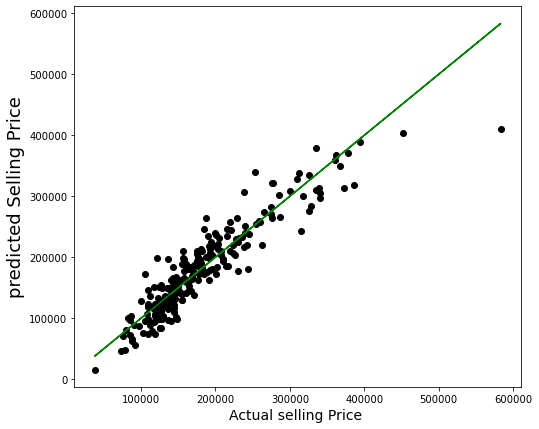

In [164]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= Test, color='black')
plt.plot(y_test,y_test, color='green')
plt.xlabel('Actual selling Price ', fontsize= 14 )
plt.ylabel('predicted Selling Price', fontsize= 18)
plt.show()

# MODEL-->DECISION TREE REGRESSOR

In [165]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    test=DT.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is 46.092835535739155%
Max accuracy is 46.092835535739155% at max random state 0


AT random state 1 accuracy of model is 50.43938112942028%
Max accuracy is 50.43938112942028% at max random state 1


AT random state 2 accuracy of model is 51.230153706192446%
Max accuracy is 51.230153706192446% at max random state 2


AT random state 3 accuracy of model is 53.75574085741219%
Max accuracy is 53.75574085741219% at max random state 3


AT random state 4 accuracy of model is 60.67978822966642%
Max accuracy is 60.67978822966642% at max random state 4


AT random state 5 accuracy of model is 68.89545173648382%
Max accuracy is 68.89545173648382% at max random state 5


AT random state 6 accuracy of model is 50.48537429863084%
AT random state 7 accuracy of model is 70.94171025959432%
Max accuracy is 70.94171025959432% at max random state 7


AT random state 8 accuracy of model is 64.22803839941132%
AT random state 9 accuracy of model is 32.148658906677966%
AT

At random state 12 model give accuracy score is 76.53%

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)
DT.fit(x_train,y_train)
Test=DT.predict(x_test)
Train=DT.predict(x_train)

MAE_DT=mean_absolute_error(y_test,Test)
print(f"Mean_Absolute_Error: {MAE_DT}")

MSE_DT=mean_squared_error(y_test,Test)
print(f"Mean_Squared_Error: {MSE_DT}")

RMSE_DT=np.sqrt(mean_squared_error(y_test,Test))
print(f"Root_Mean_Absolute_Error: {RMSE_DT}")

TEST_SCORE_DT=r2_score(y_test,Test)*100
print(f"Accuracy_Score of test: {TEST_SCORE_DT}")

TRAIN_SCORE_DT=r2_score(y_train,Train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_DT}")

Mean_Absolute_Error: 28362.82051282051
Mean_Squared_Error: 1929266892.7692308
Root_Mean_Absolute_Error: 43923.42077718026
Accuracy_Score of test: 77.06852367386333
Accuracy_Score of train: 100.0


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 77.06%, which is good, But we try another model to find the best model
3. Here in this model, we get that our model does looks like overfitting present in our dataset bcoz test and train accuracy is not equal

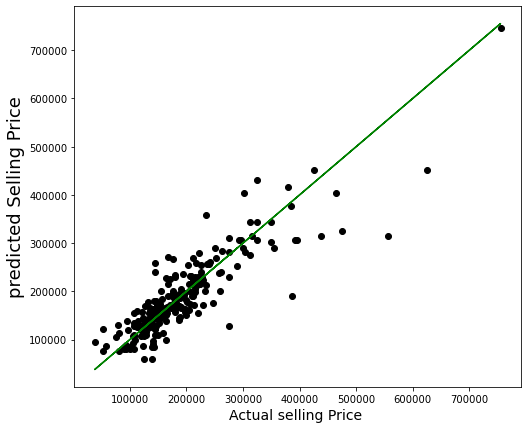

In [167]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= Test, color='black')
plt.plot(y_test,y_test, color='green')
plt.xlabel('Actual selling Price ', fontsize= 14 )
plt.ylabel('predicted Selling Price', fontsize= 18)
plt.show()

# MODEL-->SUPPORT VECTOR REGRESSOR

In [168]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    test=SV.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is -6.641912660997784%
AT random state 1 accuracy of model is -2.4071884725493042%
AT random state 2 accuracy of model is -2.372886232830429%
AT random state 3 accuracy of model is -5.4154966460898235%
AT random state 4 accuracy of model is -5.540356132601731%
AT random state 5 accuracy of model is -5.7249815835003215%
AT random state 6 accuracy of model is -6.031662005792771%
AT random state 7 accuracy of model is -7.891138817411214%
AT random state 8 accuracy of model is -8.851725464315985%
AT random state 9 accuracy of model is -8.839021443037097%
AT random state 10 accuracy of model is -2.048538977028902%
AT random state 11 accuracy of model is -0.6099304026528918%
AT random state 12 accuracy of model is -9.645170431474526%
AT random state 13 accuracy of model is -2.172365544435273%
AT random state 14 accuracy of model is -7.803642059367655%
AT random state 15 accuracy of model is -10.131644815820163%
AT random state 16 accuracy of model is -10.7

is not working with model.

# MODEL-->KNEIGHBORS REGRESSOR

In [169]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    test=KN.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is 73.69957527105544%
Max accuracy is 73.69957527105544% at max random state 0


AT random state 1 accuracy of model is 75.68683940773136%
Max accuracy is 75.68683940773136% at max random state 1


AT random state 2 accuracy of model is 66.3450333934952%
AT random state 3 accuracy of model is 74.35009972838238%
AT random state 4 accuracy of model is 71.99174108480786%
AT random state 5 accuracy of model is 62.94106132974089%
AT random state 6 accuracy of model is 80.33598429474782%
Max accuracy is 80.33598429474782% at max random state 6


AT random state 7 accuracy of model is 61.74704087712082%
AT random state 8 accuracy of model is 79.48478397850616%
AT random state 9 accuracy of model is 68.77033847730046%
AT random state 10 accuracy of model is 64.45397047198142%
AT random state 11 accuracy of model is 75.01587253734799%
AT random state 12 accuracy of model is 65.67635313374723%
AT random state 13 accuracy of model is 73.81887177998871%
AT rando

At random state 6 model give accuracy score is 80.33%

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=6)
KN.fit(x_train,y_train)
Test=KN.predict(x_test)
Train=KN.predict(x_train)

MAE_KN=mean_absolute_error(y_test,Test)
print(f"Mean_Absolute_Error: {MAE_KN}")

MSE_KN=mean_squared_error(y_test,Test)
print(f"Mean_Squared_Error: {MSE_KN}")

RMSE_KN=np.sqrt(mean_squared_error(y_test,Test))
print(f"Root_Mean_Absolute_Error: {RMSE_KN}")

TEST_SCORE_KN=r2_score(y_test,Test)*100
print(f"Accuracy_Score of test: {TEST_SCORE_KN}")

TRAIN_SCORE_KN=r2_score(y_train,Train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_KN}")

Mean_Absolute_Error: 21247.990598290602
Mean_Squared_Error: 1050403973.9167522
Root_Mean_Absolute_Error: 32409.93634545974
Accuracy_Score of test: 80.33598429474782
Accuracy_Score of train: 82.34656439806552


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 80.33%, which is good, But we try another model to find the best model
3. Here in this model, we get that our model does looks like overfitting present in our dataset bcoz test and train accuracy is not equal

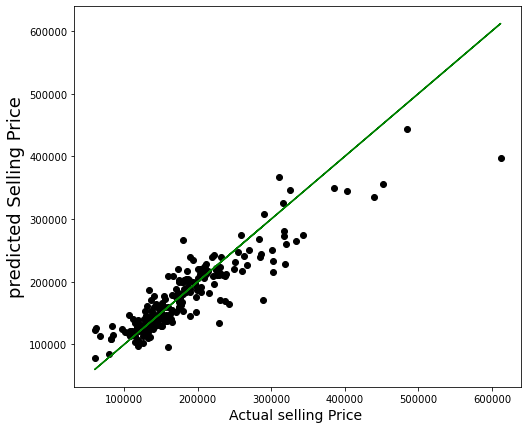

In [171]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= Test, color='black')
plt.plot(y_test,y_test, color='green')
plt.xlabel('Actual selling Price ', fontsize= 14 )
plt.ylabel('predicted Selling Price', fontsize= 18)
plt.show()

# MODEL-->ADA BOOST REGRESSOR

In [172]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    test=AD.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is 73.6890878363313%
Max accuracy is 73.6890878363313% at max random state 0


AT random state 1 accuracy of model is 70.19367556913384%
AT random state 2 accuracy of model is 63.380212556987445%
AT random state 3 accuracy of model is 75.40924026703262%
Max accuracy is 75.40924026703262% at max random state 3


AT random state 4 accuracy of model is 73.66272758458028%
AT random state 5 accuracy of model is 69.25439040444576%
AT random state 6 accuracy of model is 79.02463186996995%
Max accuracy is 79.02463186996995% at max random state 6


AT random state 7 accuracy of model is 69.94122519270253%
AT random state 8 accuracy of model is 78.45341292489103%
AT random state 9 accuracy of model is 71.63137866349493%
AT random state 10 accuracy of model is 69.20376552451255%
AT random state 11 accuracy of model is 74.75178557897931%
AT random state 12 accuracy of model is 68.58526329687025%
AT random state 13 accuracy of model is 75.26731912390817%
AT rando

At random state 24 model give accuracy score is 79.36%

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=24)
AD.fit(x_train,y_train)
Test=AD.predict(x_test)
Train=AD.predict(x_train)

MAE_AD=mean_absolute_error(y_test,Test)
print(f"Mean_Absolute_Error: {MAE_AD}")

MSE_AD=mean_squared_error(y_test,Test)
print(f"Mean_Squared_Error: {MSE_AD}")

RMSE_AD=np.sqrt(mean_squared_error(y_test,Test))
print(f"Root_Mean_Absolute_Error: {RMSE_AD}")

TEST_SCORE_AD=r2_score(y_test,Test)*100
print(f"Accuracy_Score of test: {TEST_SCORE_AD}")

TRAIN_SCORE_AD=r2_score(y_train,Train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_AD}")

Mean_Absolute_Error: 25466.241012876824
Mean_Squared_Error: 1151273093.9571185
Root_Mean_Absolute_Error: 33930.41546985711
Accuracy_Score of test: 79.89734610313367
Accuracy_Score of train: 84.40918939072206


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 79.89%, which is good, But we try another model to find the best model
3. Here in this model, we get that our model does looks like overfitting present in our dataset bcoz test and train accuracy is not equal

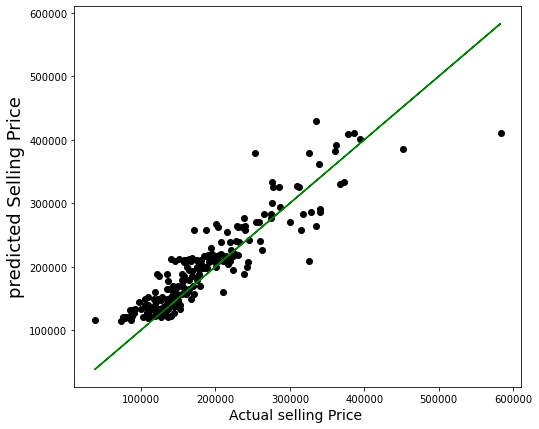

In [174]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= Test, color='black')
plt.plot(y_test,y_test, color='green')
plt.xlabel('Actual selling Price ', fontsize= 14 )
plt.ylabel('predicted Selling Price', fontsize= 18)
plt.show()

# MODEL-->GRADIENT BOOSTING REGRESSOR

In [175]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    test=GR.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is 82.8185108996972%
Max accuracy is 82.8185108996972% at max random state 0


AT random state 1 accuracy of model is 79.16932904218463%
AT random state 2 accuracy of model is 80.72095815885356%
AT random state 3 accuracy of model is 86.25789325177473%
Max accuracy is 86.25789325177473% at max random state 3


AT random state 4 accuracy of model is 78.23589640523637%
AT random state 5 accuracy of model is 78.19866264939701%
AT random state 6 accuracy of model is 85.45154242748093%
AT random state 7 accuracy of model is 76.83516497600185%
AT random state 8 accuracy of model is 88.10555109434793%
Max accuracy is 88.10555109434793% at max random state 8


AT random state 9 accuracy of model is 80.24842628679157%
AT random state 10 accuracy of model is 78.5301824672672%
AT random state 11 accuracy of model is 77.84882000484215%
AT random state 12 accuracy of model is 84.22820007293205%
AT random state 13 accuracy of model is 84.25039610074992%
AT random 

At random state 24 model give accuracy score is 88.24%

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=24)
GR.fit(x_train,y_train)
Test=GR.predict(x_test)
Train=GR.predict(x_train)

MAE_GR=mean_absolute_error(y_test,Test)
print(f"Mean_Absolute_Error: {MAE_GR}")

MSE_GR=mean_squared_error(y_test,Test)
print(f"Mean_Squared_Error: {MSE_GR}")

RMSE_GR=np.sqrt(mean_squared_error(y_test,Test))
print(f"Root_Mean_Absolute_Error: {RMSE_GR}")

TEST_SCORE_GR=r2_score(y_test,Test)*100
print(f"Accuracy_Score of test: {TEST_SCORE_GR}")

TRAIN_SCORE_GR=r2_score(y_train,Train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_GR}")

Mean_Absolute_Error: 15772.925433659879
Mean_Squared_Error: 688031001.4153641
Root_Mean_Absolute_Error: 26230.345049491138
Accuracy_Score of test: 87.98612669368734
Accuracy_Score of train: 96.36124075975738


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 87.98%, which is good, But we try another model to find the best model
3. Here in this model, we get that our model does looks like overfitting present in our dataset bcoz test and train accuracy is not equal

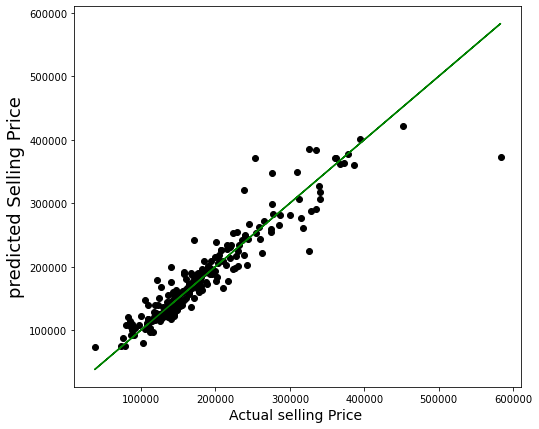

In [177]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= Test, color='black')
plt.plot(y_test,y_test, color='green')
plt.xlabel('Actual selling Price ', fontsize= 14 )
plt.ylabel('predicted Selling Price', fontsize= 18)
plt.show()

# MODEL-->RANDOM FOREST REGRESSOR

In [178]:
max_acc=0
max_rand=0

for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    test=RF.predict(x_test)
    acc=r2_score(y_test,test)*100
    print(f"AT random state {i} accuracy of model is {acc}%")
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"Max accuracy is {max_acc}% at max random state {i}")
        print('\n')

AT random state 0 accuracy of model is 78.80408164164277%
Max accuracy is 78.80408164164277% at max random state 0


AT random state 1 accuracy of model is 80.88499436472934%
Max accuracy is 80.88499436472934% at max random state 1


AT random state 2 accuracy of model is 76.08810897967217%
AT random state 3 accuracy of model is 84.80763621917635%
Max accuracy is 84.80763621917635% at max random state 3


AT random state 4 accuracy of model is 81.98085413824792%
AT random state 5 accuracy of model is 78.78030189544526%
AT random state 6 accuracy of model is 88.30788396125821%
Max accuracy is 88.30788396125821% at max random state 6


AT random state 7 accuracy of model is 74.7263227724601%
AT random state 8 accuracy of model is 86.26339960739871%
AT random state 9 accuracy of model is 80.68759976229066%
AT random state 10 accuracy of model is 79.44002082506579%
AT random state 11 accuracy of model is 80.78599464493827%
AT random state 12 accuracy of model is 79.25213971250132%
AT rando

At random state 24 model give accuracy score is 88.39%

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=24)
RF.fit(x_train,y_train)
Test=RF.predict(x_test)
Train=RF.predict(x_train)

MAE_RF=mean_absolute_error(y_test,Test)
print(f"Mean_Absolute_Error: {MAE_RF}")

MSE_RF=mean_squared_error(y_test,Test)
print(f"Mean_Squared_Error: {MSE_RF}")

RMSE_RF=np.sqrt(mean_squared_error(y_test,Test))
print(f"Root_Mean_Absolute_Error: {RMSE_RF}")

TEST_SCORE_RF=r2_score(y_test,Test)*100
print(f"Accuracy_Score of test: {TEST_SCORE_RF}")

TRAIN_SCORE_RF=r2_score(y_train,Train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_RF}")

Mean_Absolute_Error: 15747.427777777779
Mean_Squared_Error: 657198063.1313009
Root_Mean_Absolute_Error: 25635.8745341621
Accuracy_Score of test: 88.52450797802494
Accuracy_Score of train: 97.21632594612485


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 88.52%, which is good, But we try another model to find the best model
3. Here in this model, we get that our model does looks like overfitting present in our dataset bcoz test and train accuracy is not equal

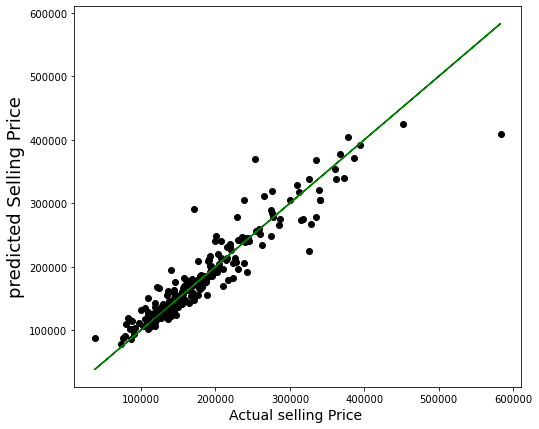

In [180]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= Test, color='black')
plt.plot(y_test,y_test, color='green')
plt.xlabel('Actual selling Price ', fontsize= 14 )
plt.ylabel('predicted Selling Price', fontsize= 18)
plt.show()

In [181]:
m=[LI,DT,KN,AD,GR,RF]
MODEL=[]
for i in m:
    MODEL.append(i)

MAE=[]
for i in [MAE_LI,MAE_DT,MAE_KN,MAE_AD,MAE_GR,MAE_RF]:
    MAE.append(i)
    
MSE=[]
for i in [MSE_LI,MSE_DT,MSE_KN,MSE_AD,MSE_GR,MSE_RF]:
    MSE.append(i)
    
RMSE=[]
for i in [RMSE_LI,RMSE_DT,RMSE_KN,RMSE_AD,RMSE_GR,RMSE_RF]:
    RMSE.append(i)
    
TEST_ACCURACY=[]
for i in [TEST_SCORE_LI,TEST_SCORE_DT,TEST_SCORE_KN,TEST_SCORE_AD,TEST_SCORE_GR,TEST_SCORE_RF]:
    TEST_ACCURACY.append(i)
    
TRAIN_ACCURACY=[]
for i in [TRAIN_SCORE_LI,TRAIN_SCORE_DT,TRAIN_SCORE_KN,TRAIN_SCORE_AD,TRAIN_SCORE_GR,TRAIN_SCORE_RF]:
    TRAIN_ACCURACY.append(i)

# TRAIN_TEST_SPLIT MODEL DATAFRAME

In [182]:
TTS=pd.DataFrame({'MODEL':MODEL,'TEST_SCORE':TEST_ACCURACY,'TRAIN_SCORE':TRAIN_ACCURACY,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
TTS

MODEL  TEST_SCORE  TRAIN_SCORE  \
0                                 LinearRegression()   85.377716    80.189329   
1                            DecisionTreeRegressor()   77.068524   100.000000   
2                              KNeighborsRegressor()   80.335984    82.346564   
3  (DecisionTreeRegressor(max_depth=3, random_sta...   79.897346    84.409189   
4  ([DecisionTreeRegressor(criterion='friedman_ms...   87.986127    96.361241   
5  (DecisionTreeRegressor(max_features='auto', ra...   88.524508    97.216326   

            MAE           MSE          RMSE  
0  21485.892974  8.374139e+08  28938.105323  
1  28362.820513  1.929267e+09  43923.420777  
2  21247.990598  1.050404e+09  32409.936345  
3  25466.241013  1.151273e+09  33930.415470  
4  15772.925434  6.880310e+08  26230.345049  
5  15747.427778  6.571981e+08  25635.874534

# It is best model have reason-->RANDOM FOREST REGRESSOR
1. Less overfitting than previous models
2. Less error than previous models-->25635.95
3. Good accuracy score compare to previous mpdel-->88.52

# Apply diffrent method for finding best models.

# CROSS_VAL_SCORE

# CV-->LINEAR REGRESSION

In [183]:
test_li=LI.predict(x_test)
accuracy_li=r2_score(y_test,test_li)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(LI,x,y,cv=cv1)
    mean_li=cv_score.mean()
    print(f"At cv {i},mean score is {mean_li} and accuracy score is {accuracy_li}")
    print('\n')

At cv 2,mean score is 0.7632250313765555 and accuracy score is 0.8537771560341109


At cv 3,mean score is 0.7719714962547369 and accuracy score is 0.8537771560341109


At cv 4,mean score is 0.7766217924817946 and accuracy score is 0.8537771560341109


At cv 5,mean score is 0.7717702398149898 and accuracy score is 0.8537771560341109


At cv 6,mean score is 0.7809064354424132 and accuracy score is 0.8537771560341109


At cv 7,mean score is 0.7709200296266037 and accuracy score is 0.8537771560341109


At cv 8,mean score is 0.7782722939528199 and accuracy score is 0.8537771560341109


At cv 9,mean score is 0.7746834502339318 and accuracy score is 0.8537771560341109




At cv=6 model give mean value is 78.09 and accuracy score is 85.37.

# CV-->DECISION TREE REGRESSOR

In [184]:
test_dt=DT.predict(x_test)
accuracy_dt=r2_score(y_test,test_dt)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(DT,x,y,cv=cv1)
    mean_dt=cv_score.mean()
    print(f"At cv {i},mean score is {mean_dt} and accuracy score is {accuracy_dt}")
    print('\n')

At cv 2,mean score is 0.6067450147136347 and accuracy score is 0.9353320090858658


At cv 3,mean score is 0.5415705921330888 and accuracy score is 0.9353320090858658


At cv 4,mean score is 0.5122823840909457 and accuracy score is 0.9353320090858658


At cv 5,mean score is 0.5069898609487722 and accuracy score is 0.9353320090858658


At cv 6,mean score is 0.6279500805770937 and accuracy score is 0.9353320090858658


At cv 7,mean score is 0.5611193786768459 and accuracy score is 0.9353320090858658


At cv 8,mean score is 0.46454267494168433 and accuracy score is 0.9353320090858658


At cv 9,mean score is 0.6074310746576849 and accuracy score is 0.9353320090858658




At cv 6 model give mean value is 62.79 and accuracy score is 93.53.

# CV-->KNEIGHBORS REGRESSOR

In [185]:
test=KN.predict(x_test)
accuracy_kn=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(KN,x,y,cv=cv1)
    mean_kn=cv_score.mean()
    print(f"At cv {i},mean score is {mean_kn} and accuracy score is {accuracy_kn}")
    print('\n')

At cv 2,mean score is 0.7309332006700209 and accuracy score is 0.857657396448994


At cv 3,mean score is 0.7415314748200682 and accuracy score is 0.857657396448994


At cv 4,mean score is 0.73492677966262 and accuracy score is 0.857657396448994


At cv 5,mean score is 0.7236800735761036 and accuracy score is 0.857657396448994


At cv 6,mean score is 0.7324990783181007 and accuracy score is 0.857657396448994


At cv 7,mean score is 0.7283565431940656 and accuracy score is 0.857657396448994


At cv 8,mean score is 0.7380588950884163 and accuracy score is 0.857657396448994


At cv 9,mean score is 0.7271615466511654 and accuracy score is 0.857657396448994




At cv 3 model give mean value 74.15 and accuracy score is 85.76.

# cv-->ADA BOOST REGRESSOR

In [186]:
test=AD.predict(x_test)
accuracy_ad=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(AD,x,y,cv=cv1)
    mean_ad=cv_score.mean()
    print(f"At cv {i},mean score is {mean_ad} and accuracy score is {accuracy_ad}")
    print('\n')

At cv 2,mean score is 0.7264789862714405 and accuracy score is 0.7989734610313367


At cv 3,mean score is 0.7650855023113641 and accuracy score is 0.7989734610313367


At cv 4,mean score is 0.7246758444893546 and accuracy score is 0.7989734610313367


At cv 5,mean score is 0.7272129249338528 and accuracy score is 0.7989734610313367


At cv 6,mean score is 0.7239228069066509 and accuracy score is 0.7989734610313367


At cv 7,mean score is 0.7179784197631326 and accuracy score is 0.7989734610313367


At cv 8,mean score is 0.7373149560930188 and accuracy score is 0.7989734610313367


At cv 9,mean score is 0.7338775529554802 and accuracy score is 0.7989734610313367




At cv 3 model give mean value is 76.50 and accuracy score is 80.00

# CV-->GRADIENT BOOSTING REGRESSOR

In [187]:
test=GR.predict(x_test)
accuracy_gr=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(GR,x,y,cv=i,scoring='r2')
    mean_gr=cv_score.mean()
    print(f"At cv {i},mean score is {mean_gr} and accuracy score is {accuracy_gr}")
    print('\n')

At cv 2,mean score is 0.8138884413246162 and accuracy score is 0.8798612669368734


At cv 3,mean score is 0.8326007729874142 and accuracy score is 0.8798612669368734


At cv 4,mean score is 0.8204618481262128 and accuracy score is 0.8798612669368734


At cv 5,mean score is 0.831189222546336 and accuracy score is 0.8798612669368734


At cv 6,mean score is 0.8300447259394678 and accuracy score is 0.8798612669368734


At cv 7,mean score is 0.8353938152027061 and accuracy score is 0.8798612669368734


At cv 8,mean score is 0.8246684086764191 and accuracy score is 0.8798612669368734


At cv 9,mean score is 0.8421216615186725 and accuracy score is 0.8798612669368734




At cv 9 model give mean value is 84.21 and accuracy score is 87.98

# CV-->RANDOM FOREST REGRESSOR

In [188]:
test=RF.predict(x_test)
accuracy_rf=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(RF,x,y,cv=cv1)
    mean_rf=cv_score.mean()
    print(f"At cv {i},mean score is {mean_rf} and accuracy score is {accuracy_rf}")
    print('\n')

At cv 2,mean score is 0.7871142179177631 and accuracy score is 0.8852450797802495


At cv 3,mean score is 0.7970640725793373 and accuracy score is 0.8852450797802495


At cv 4,mean score is 0.8020154327950896 and accuracy score is 0.8852450797802495


At cv 5,mean score is 0.8062584428329427 and accuracy score is 0.8852450797802495


At cv 6,mean score is 0.8100385068787341 and accuracy score is 0.8852450797802495


At cv 7,mean score is 0.8091936156717682 and accuracy score is 0.8852450797802495


At cv 8,mean score is 0.8143668757641237 and accuracy score is 0.8852450797802495


At cv 9,mean score is 0.8283885220254265 and accuracy score is 0.8852450797802495




At cv 9 model give mean value is 82.83 and accuracy score is 88.52

In [189]:
MEAN=[]
for i in [mean_li,mean_dt,mean_kn,mean_ad,mean_gr,mean_rf]:
    MEAN.append(i)
    
ACCURACY=[]
for i in [accuracy_li,accuracy_dt,accuracy_kn,accuracy_ad,accuracy_gr,accuracy_rf]:
    ACCURACY.append(i)
    
m=[LI,DT,KN,AD,GR,RF]
MODEL=[]
for i in m:
    MODEL.append(i)

In [190]:
CV=pd.DataFrame({'MODEL':MODEL,'MEAN_SCORE':MEAN,"ACCURACY_SCORE":ACCURACY})
CV

MODEL  MEAN_SCORE  \
0                                 LinearRegression()    0.774683   
1                            DecisionTreeRegressor()    0.607431   
2                              KNeighborsRegressor()    0.727162   
3  (DecisionTreeRegressor(max_depth=3, random_sta...    0.733878   
4  ([DecisionTreeRegressor(criterion='friedman_ms...    0.842122   
5  (DecisionTreeRegressor(max_features='auto', ra...    0.828389   

   ACCURACY_SCORE  
0        0.853777  
1        0.935332  
2        0.857657  
3        0.798973  
4        0.879861  
5        0.885245

# This is less diifrence between it except all the model.so our best model in category of cross val score is RANDOM FOREST REGRESSOR

# GRID SEARCH CV-->RANDOM FOREST REGRESSOR

In [191]:
dict1={'criterion':['squared_error','absolute_error','poisson'],'n_estimators':[100,200,300,400,500],'max_depth':[3,4,5,6,7],
      'max_features':['sqrt','log2','None']}

In [192]:
GS=GridSearchCV(RF,dict1,cv=9)
GS.fit(x,y)

GridSearchCV(cv=9, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [193]:
GS.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [194]:
GS.best_estimator_

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=400)

In [195]:
GS.best_score_

0.8169591660302933

In [199]:
Rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt',n_estimators=400,max_depth=7)
Rf.fit(x_train,y_train)
print('Mean_absolute_error of model', mean_absolute_error(y_test,RF.predict(x_test)))
print('Mean_square_error of model' , mean_squared_error(y_test,RF.predict(x_test)))
print('Root_mean_square_error of model' ,np.sqrt( mean_squared_error(y_test,RF.predict(x_test))))
print('R2 Score of model', r2_score(y_test,RF.predict(x_test) )*100)

Mean_absolute_error of model 15747.427777777779
Mean_square_error of model 657198063.1313009
Root_mean_square_error of model 25635.8745341621
R2 Score of model 88.52450797802494


This is my model r2_score after tuning.I got 88.53% as r2_score which is best i got!.Before model accuracy was 88.53% now after tunning it is 88.53%

# Saving the model:

In [200]:
# Saving the model using .pkl
import joblib
joblib.dump(Rf,"House_PricePrediction.pkl")

['House_PricePrediction.pkl']

I have saved my model as House_PricePrediction.Using.pkl

# Predicting House Price for test dataset using Saved model of train dataset:

we apply all transform method and eda process separeate so we put directly it

In [219]:
X=pd.read_csv('house.csv')
X

Unnamed: 0  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0             0   -1.103998     1.336640  1.406013     2.096267    -0.365238   
1             1    1.680809    -0.046980 -0.968205     1.452249    -0.365238   
2             2   -1.103998    -0.046980  0.757100     1.452249    -0.365238   
3             3    0.947877     0.624989  0.802653     0.764818     1.837733   
4             4    0.722277     1.336640  1.528697     0.025001    -0.365238   
..          ...         ...          ...       ...          ...          ...   
287         287   -1.103998     0.821731  0.296117     1.452249    -0.365238   
288         288   -1.103998    -0.604937  0.022729    -0.779660    -0.365238   
289         289   -1.103998    -0.046980  0.588918     0.025001     1.837733   
290         290    0.445916    -1.110761 -1.207679     0.025001     1.837733   
291         291    0.445916    -0.046980 -2.128825     0.025001    -0.365238   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0     1.221131      1.153837    1.321839    1.212442   0.568146     2.042729   
1     0.232930     -0.278412   -0.778885    1.071919  -0.844466     0.474722   
2     1.012284      0.768563   -0.778885   -1.373570   0.045485     1.675975   
3    -1.128476     -1.524080   -0.778885    0.241569  -0.039084    -0.781145   
4     1.329540      1.235800    1.140142   -1.373570   1.035594    -0.304546   
..         ...           ...         ...         ...        ...          ...   
287   1.329540      1.235800   -0.778885   -0.626656   2.145807     1.256212   
288   0.671079      0.356052   -0.778885    0.784093  -0.412327    -0.070608   
289  -0.294454     -0.900731    1.305023    0.672853  -0.047413    -0.036829   
290  -0.980426     -1.524080   -0.778885    0.447741   0.410708    -0.036829   
291  -0.189194     -0.782350    1.422635    0.304104  -0.885605    -1.365236   

     1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0    1.854812 -0.870294   1.124465      1.170981  0.777618 -0.738058   
1    0.739731 -0.870294  -0.059586      1.170981 -1.051784 -0.738058   
2    1.620123 -0.870294   0.864203     -0.846389  0.777618 -0.738058   
3   -0.706369  1.137231   0.400426     -0.846389 -1.051784  1.349285   
4   -0.585400  1.211129   1.145320     -0.846389  0.777618  1.349285   
..        ...       ...        ...           ...       ...       ...   
287  1.185772 -0.870294   0.398265     -0.846389  0.777618 -0.738058   
288 -0.265968 -0.870294  -1.019165     -0.846389 -1.051784 -0.738058   
289 -0.221854 -0.870294  -0.979105      1.170981 -1.051784 -0.738058   
290 -0.221854  1.124621   0.612275     -0.846389  0.777618 -0.738058   
291 -2.476620  1.070797  -1.027796     -0.846389 -1.051784  1.349285   

     BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0        0.291464      1.352161    0.808861     1.230540    1.852208   
1       -2.275198     -1.584658    0.808861     0.031133    0.338022   
2        0.291464      0.620466    0.808861     0.972769    0.338022   
3        0.291464      0.620466    0.808861    -1.518560   -0.999251   
4        1.900594      2.082516    0.808861     1.365179    1.852208   
..            ...           ...         ...          ...         ...   
287      0.291464     -0.112743    0.808861     1.365179    1.852208   
288      0.291464     -0.847685   -1.023536     0.671048    0.338022   
289     -1.110293     -0.847685    0.808861    -0.585487    0.338022   
290      0.291464      0.620466    1.690566    -1.271006    0.338022   
291     -1.110293     -0.847685   -1.023536    -0.463895   -0.999251   

     GarageArea  WoodDeckSF  OpenPorchSF    MoSold    YrSold  MSZoning  \
0      1.063555    1.177828     0.882456  0.318910 -0.650290         2   
1      0.571147    0.893737    -1.060994  0.661063  0.863849         2   
2      0.375969    1.209451     1.450669 -0.033863  0.863849         2   
3     -1.024069   -0.884299    -1.060994  0.318910  0.863

In [223]:
X=X.drop(['Unnamed: 0'],axis=1)

In [224]:
# Loading the saved model
model=joblib.load("House_PricePrediction.pkl")

In [225]:
# Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X)
Predicted_Sale_Price

array([278314.63793843, 175631.19030647, 230078.03713896, 159697.47101086,
       229147.60238361, 102778.74177598, 147890.35159269, 258693.09531749,
       209348.69835656, 166721.21371993, 101352.72076526, 152030.1361152 ,
       124857.36517226, 172434.99783957, 280938.2747903 , 130943.57365627,
       124213.23002338, 129851.1864348 , 172645.77374224, 181539.76700406,
       153843.85113925, 146569.25844976, 147909.28412306, 112264.71173116,
       109491.47538825, 130857.64811044, 173354.00048872, 148754.42077277,
       167660.50956699, 127366.16543131, 147689.83839162, 174533.05002087,
       216270.4681045 , 164412.37868465, 118429.48930996, 179608.77454965,
       180901.62014852, 125712.21423159, 157084.2627961 , 151759.24202632,
       114600.05925749, 278203.52302944, 196549.39911113, 173772.98069285,
       142522.68042963, 136648.1458329 , 130022.32272597, 122503.16894744,
       185312.14893601, 282074.98772565, 142880.53358157, 198918.88605317,
       115598.17779279, 1

In [226]:
# Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  278314.637938
1  175631.190306
2  230078.037139
3  159697.471011
4  229147.602384
5  102778.741776
6  147890.351593
7  258693.095317
8  209348.698357
9  166721.213720

In [227]:
# lets save the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

I have saved the predicted values as csv file.

# THANKS :)